In [1]:
source("~/public/SiyuanLuo/projects/benchmark/scripts/evaluation/lib_metrics.R")
source("~/public/SiyuanLuo/projects/benchmark/scripts/clustering/lib_clustering.R")
source("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/visual_utils.R")


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis



Attaching package: ‘igraph’


The following object is masked from ‘package:class’:

    knn


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




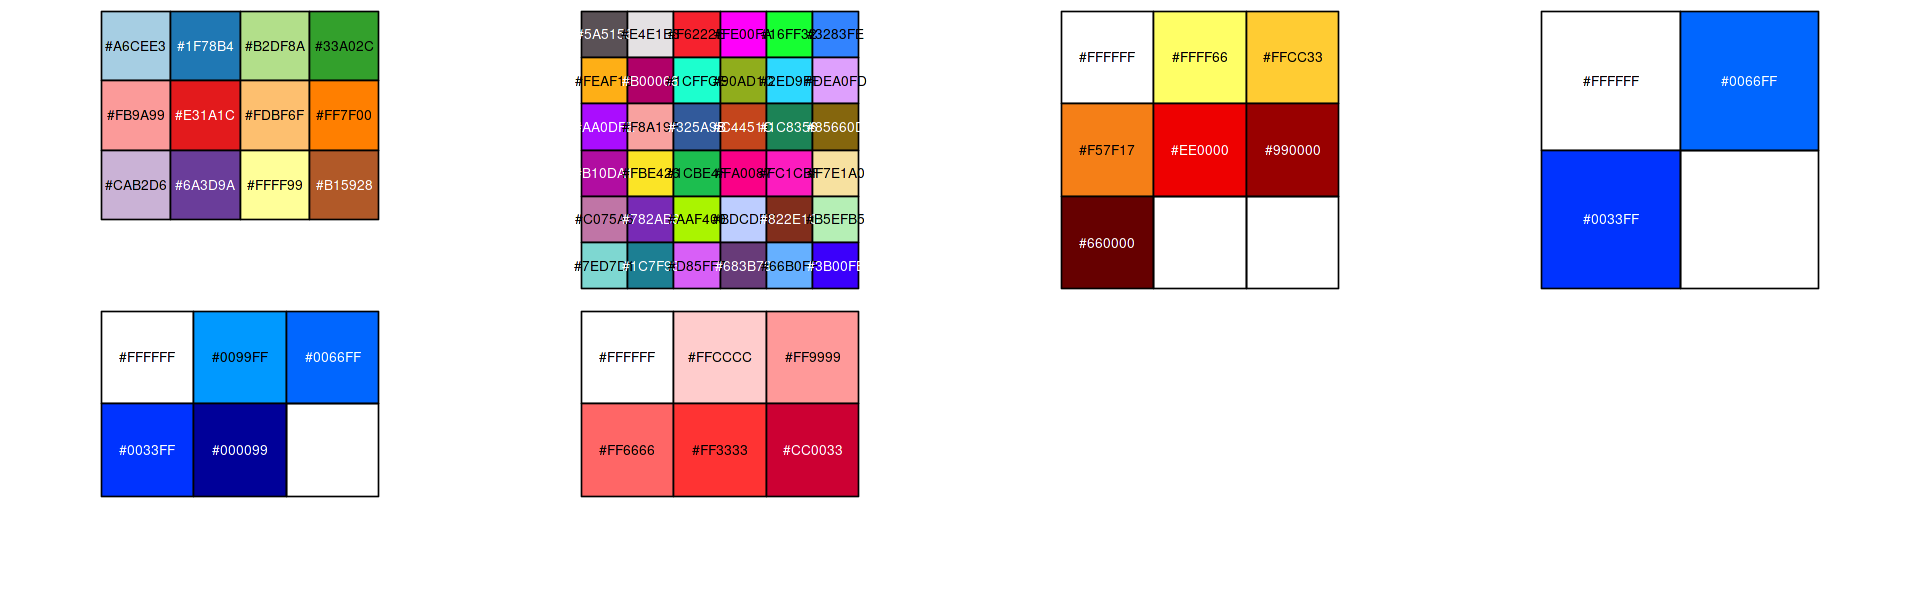

In [2]:
options(repr.plot.width=16, repr.plot.height=5)
par(mfrow=c(2,4))

show_col(my_col_m)
show_col(my_col_c)
show_col(my_color)
show_col(my_color_2)
show_col(my_color_3)
show_col(my_color_4)

In [3]:
# dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics", "candidate2", "Ma_2019") 
# k_ls <- c(9, 13, 10, 13, 15, 10, 22)
dataset_ls <- c("Cell_line_mixing", "candidate1",  "candidate2", "Buenrostro_2018",  "Chen_2019",  "PBMC_multiomics") 
dataset_name <- c("Cell line mixing experiment", "human adult atlas subset1", "human adult atlas subset2",  "Buenrostro2018", "Chen2019", "10X PBMC multiomics")
k_ls <- c(10, 13, 10, 9, 13, 15)

In [4]:
# Put meta files of all datasets together
for(j in 1:length(dataset_ls)){
    dataset <- dataset_ls[j]
    k_optimal <- k_ls[j]
    if(j == 1){
        df <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df_metrics <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df$dataset <- dataset_name[j]
        df$dataset2 <- dataset_ls[j]
        df_metrics$dataset <- dataset_name[j]
        df$k_optimal <- k_optimal
        df_metrics$k_optimal <- k_optimal
        df_metrics$dataset2 <- dataset_ls[j]
    }else{
        df1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/meta_info_for_evaluation.tsv"), sep="\t", header=TRUE)
        df1$dataset <- dataset_name[j]
        df1$k_optimal <- k_optimal
        df1$dataset2 <- dataset_ls[j]
        
        df <- rbind(df, df1)
        df_metrics1 <- read.table(file=paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset, "/metrics_value.tsv"), sep="\t", header=TRUE)
        df_metrics1$dataset <- dataset_name[j]
        df_metrics1$k_optimal <- k_optimal
        df_metrics1$dataset2 <- dataset_ls[j]
        df_metrics <- rbind(df_metrics, df_metrics1)
    }
}


In [11]:
head(df)

file                                                                              
1 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_metrics.tsv
2 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.1_metrics.tsv 
3 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.15_metrics.tsv
4 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_metrics.tsv 
5 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_metrics.tsv
6 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_metrics.tsv 
  scenario         workflow   method feature_type     tile_size distance ndim
1 Cell_line_mixing evaluation Signac by_cluster_peaks 0         default  15  
2 Cell_line_mixing evaluation Signac by_cluster_peaks 0         default  15  
3 Cell_line_mixing evaluation Signac by_cluster_peaks 0         default  15  
4 Cell_line_mixing evaluation Signac by_cluster_peaks 0         default  15  
5 Cell_line_mixing evaluation Signac by_cluster_peaks 0         default  15  
6 Cell_line_mixing evaluation Signac by_cluster_peaks 0         default  15  
  filename          resolution
1 r0.05_metrics.tsv 0.05      
2 r0.1_metrics.tsv  0.10      
3 r0.15_metrics.tsv 0.15      
4 r0.2_metrics.tsv  0.20      
5 r0.25_metrics.tsv 0.25      
6 r0.3_metrics.tsv  0.30      
  rds_file                                                                             
1 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
2 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.1_evaluation.RDS 
3 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.15_evaluation.RDS
4 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_evaluation.RDS 
5 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_evaluation.RDS
6 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_evaluation.RDS 
  clustering_file                                                           
1 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
2 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.1.tsv 
3 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.15.tsv
4 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.2.tsv 
5 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.25.tsv
6 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.3.tsv 
  long_method            
1 Signac_by_cluster_peaks
2 Signac_by_cluster_peaks
3 Signac_by_cluster_peaks
4 Signac_by_cluster_peaks
5 Signac_by_cluster_peaks
6 Signac_by_cluster_peaks
  snn_file                                                                     
1 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
2 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
3 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
4 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
5 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
6 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
  n_clusters dataset                     dataset2         k_optimal
1 10         Cell line mixing experiment Cell_line_mixing 10       
2 11         Cell line mixing experiment Cell_line_mixing 10       
3 11         Cell line mixing experiment Cell_line_mixing 10       
4 12         Cell line mixing experiment Cell_line_mixing 10       
5 12         Cell line mixing experiment Cell_line_mixing 10       
6 12         Cell line mixing experiment Cell_line_mixing 10

In [12]:
head(df_metrics)

n_clusters metric           value     method long_method            
1 10         ARI              0.9661907 Signac Signac_by_cluster_peaks
2 10         AMI              0.9576516 Signac Signac_by_cluster_peaks
3 10         MI               2.0681147 Signac Signac_by_cluster_peaks
4 10         VI               0.1749132 Signac Signac_by_cluster_peaks
5 10         Silhouette       0.3064498 Signac Signac_by_cluster_peaks
6 10         Silhouette_label 0.3155830 Signac Signac_by_cluster_peaks
  feature_type     tile_size distance ndim resolution
1 by_cluster_peaks 0         default  15   0.05      
2 by_cluster_peaks 0         default  15   0.05      
3 by_cluster_peaks 0         default  15   0.05      
4 by_cluster_peaks 0         default  15   0.05      
5 by_cluster_peaks 0         default  15   0.05      
6 by_cluster_peaks 0         default  15   0.05      
  rds_file                                                                             
1 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
2 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
3 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
4 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
5 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
6 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
  clustering_file                                                           
1 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
2 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
3 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
4 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
5 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
6 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
  snn_file                                                                     
1 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
2 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
3 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
4 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
5 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
6 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
  dataset                     k_optimal dataset2        
1 Cell line mixing experiment 10        Cell_line_mixing
2 Cell line mixing experiment 10        Cell_line_mixing
3 Cell line mixing experiment 10        Cell_line_mixing
4 Cell line mixing experiment 10        Cell_line_mixing
5 Cell line mixing experiment 10        Cell_line_mixing
6 Cell line mixing experiment 10        Cell_line_mixing

# Fig 2

## Fig 2A: ARI

In [5]:
df_metrics_ari <- df_metrics %>% filter(metric == "ARI") %>% filter(ndim == 15)
df_metrics_ari$dataset <- factor(df_metrics_ari$dataset, levels = dataset_name)

In [6]:
vline_data <- data.frame(dataset = dataset_name, vline_x = k_ls)
vline_data$dataset <- factor(vline_data$dataset, levels = dataset_name)

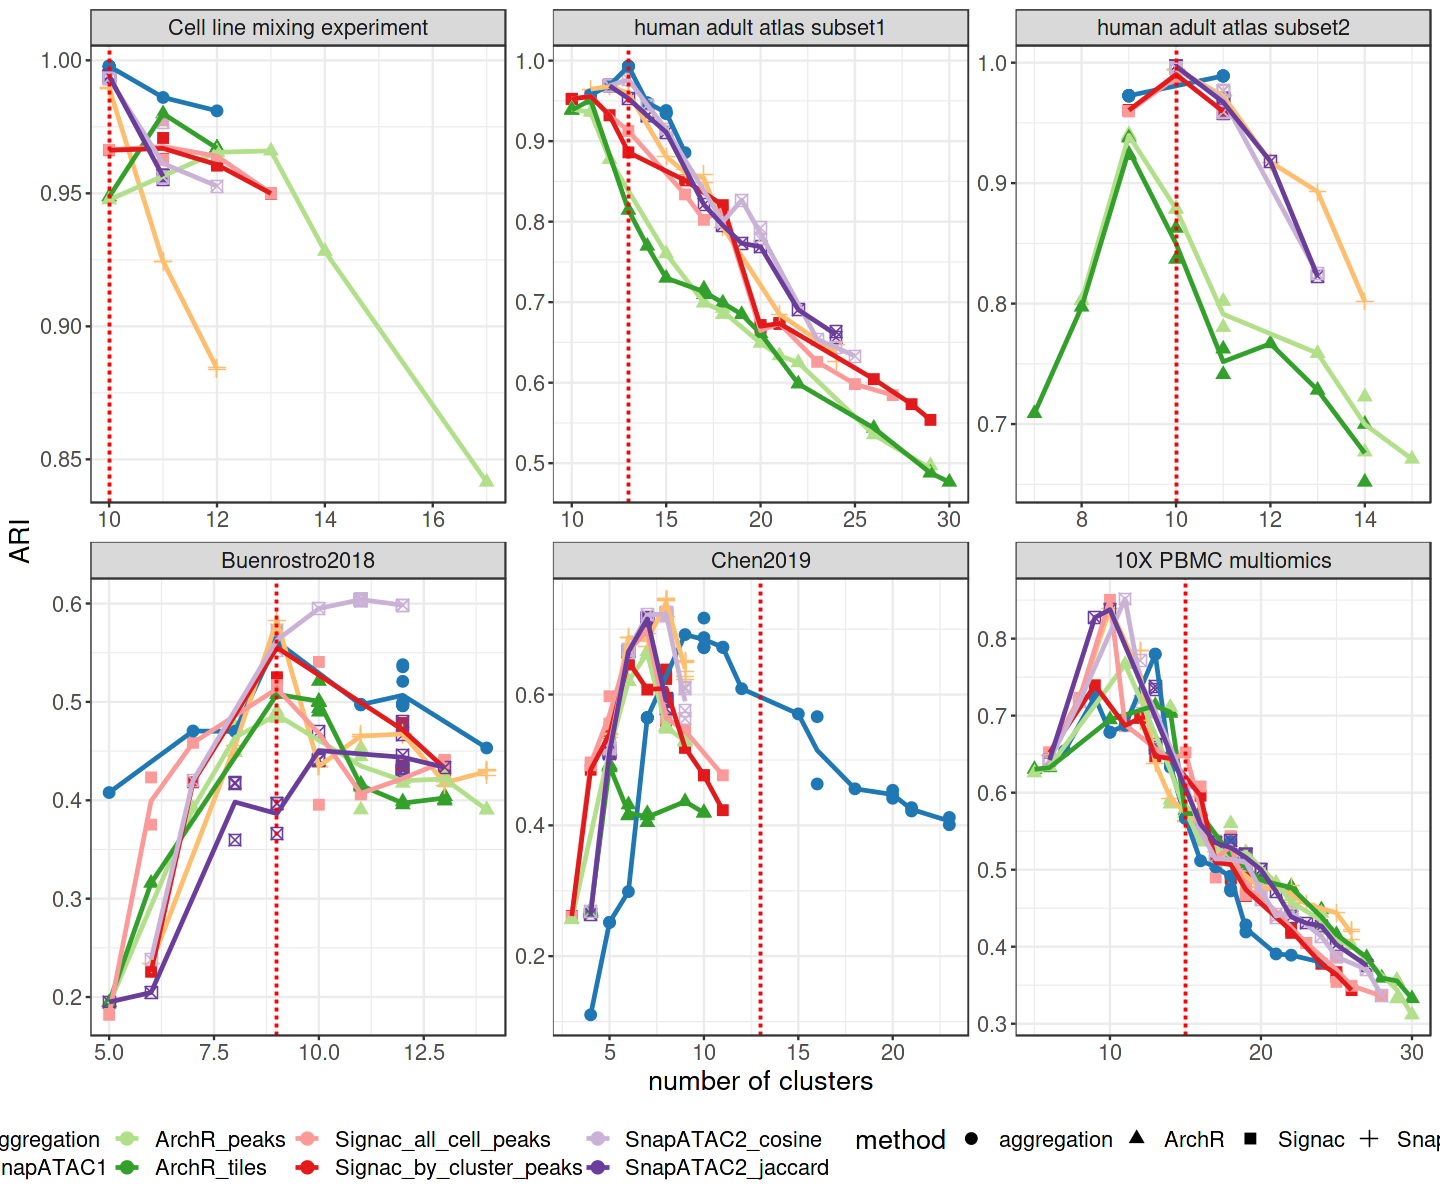

In [454]:
# ARI
options(repr.plot.width=12, repr.plot.height=10)
df_metrics_ari$long_method <- factor(df_metrics_ari$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p1 <-
df_metrics_ari %>% #filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(dataset, long_method, n_clusters) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method, shape=method)) + 
  geom_point(size=3) +
  geom_line(size=1, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~dataset, scales = "free", nrow = 2, ncol = 3) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("ARI") +
  labs(color="Method") +
  # geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = my_col_m3) #+ ylim(0, 0.8)
p1

In [448]:
my_col_m3 <- brewer.pal(10, "Paired")[c(2,7,3:6,9:10)]

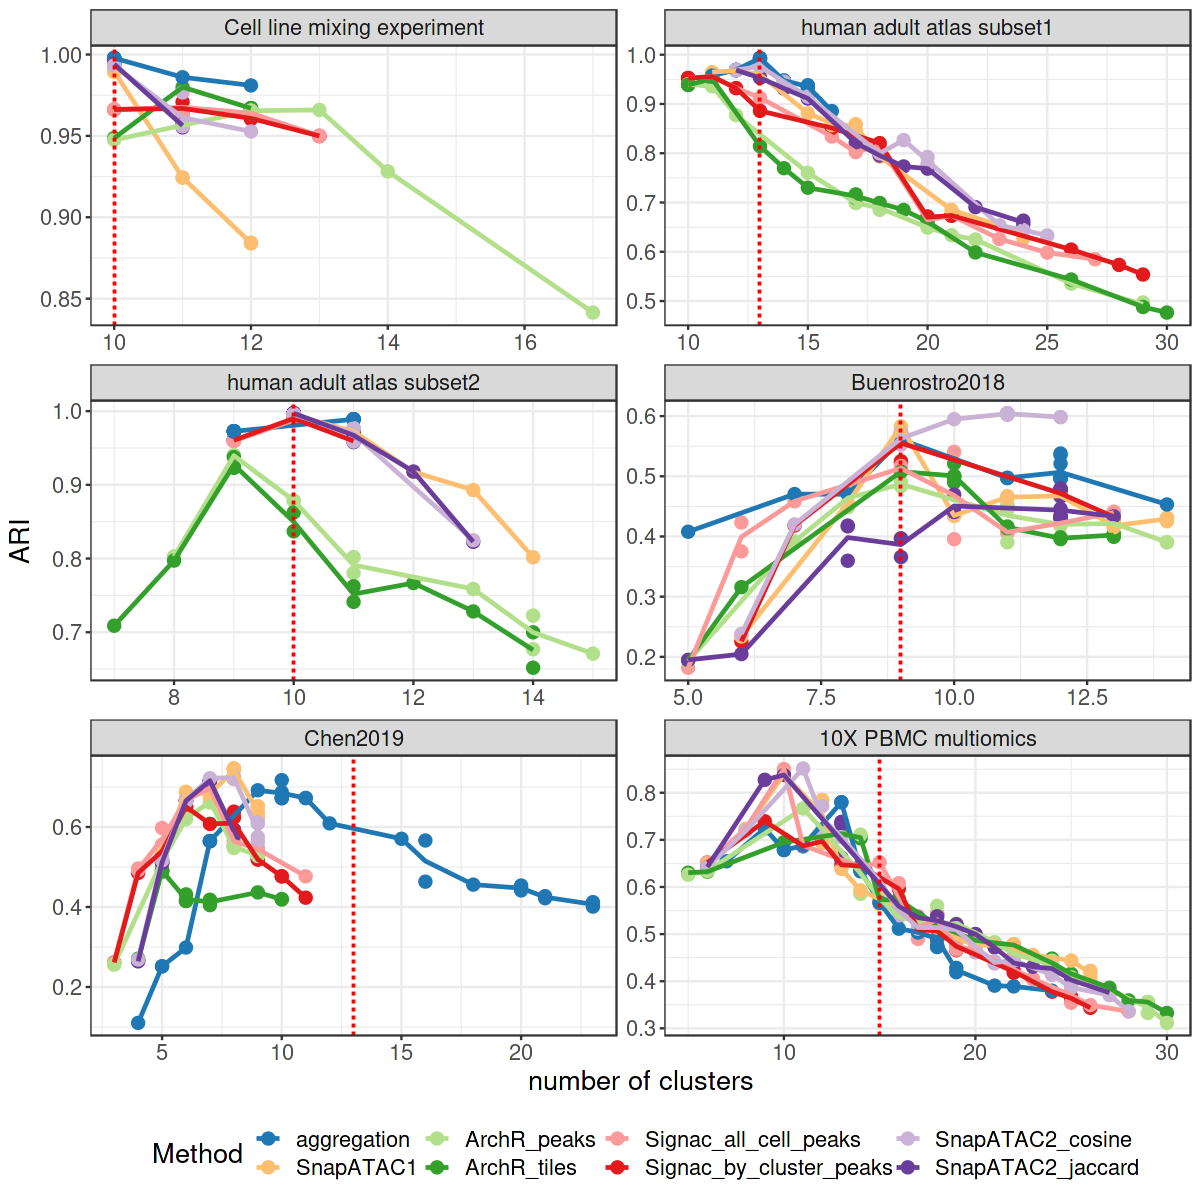

In [462]:
# ARI
options(repr.plot.width=10, repr.plot.height=10)
df_metrics_ari$long_method <- factor(df_metrics_ari$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p1 <-
df_metrics_ari %>% #filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(dataset, long_method, n_clusters) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
  geom_point(size=3) +
  geom_line(size=1, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~dataset, scales = "free", nrow = 3, ncol = 2) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("ARI") +
  labs(color="Method") +
  # geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = my_col_m3) #+ ylim(0, 0.8)
p1

In [463]:
# SVG graphics device
svg("Fig2A_ARI_ndim15_small.3.svg", width=9, height=10)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

In [230]:
# SVG graphics device
svg("Fig2A_ARI_ndim15_small.svg", width=13, height=6.5)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

In [227]:
# SVG graphics device
svg("Fig2A_ARI_ndim15.svg", width=16, height=8)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

## Fig 2A: ARI2

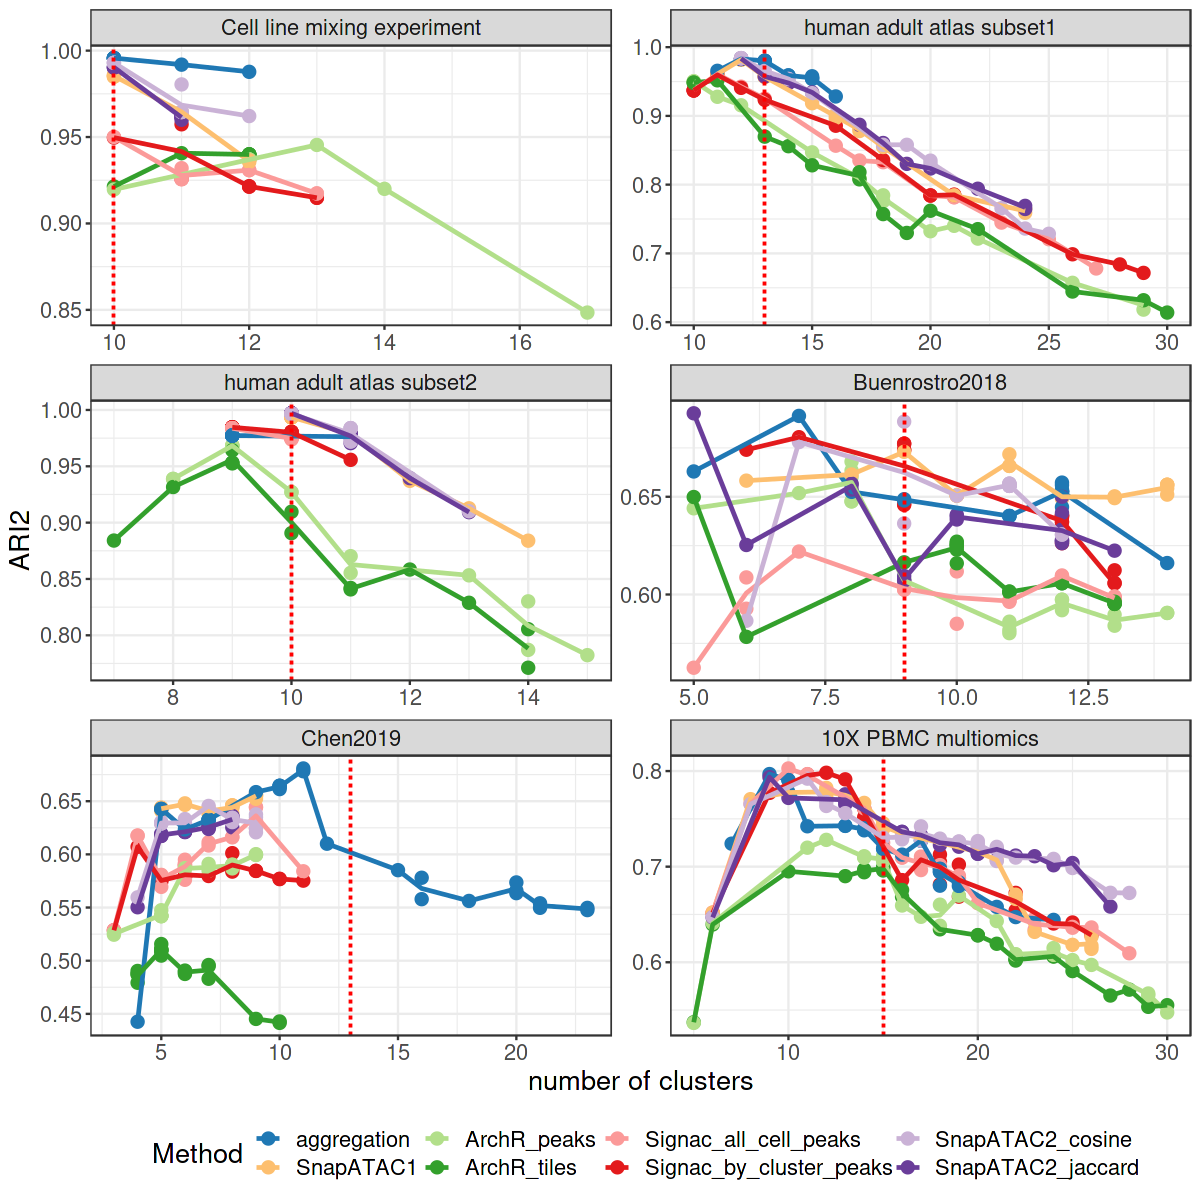

In [368]:
df_metrics_ari <- df_metrics %>% filter(metric == "ARI2") %>% filter(ndim == 15)
df_metrics_ari$dataset <- factor(df_metrics_ari$dataset, levels = dataset_name)
vline_data <- data.frame(dataset = dataset_name, vline_x = k_ls)
vline_data$dataset <- factor(vline_data$dataset, levels = dataset_name)

# ARI2
my_col_m3 <- brewer.pal(10, "Paired")[c(2,7,3:6,9:10)]

options(repr.plot.width=10, repr.plot.height=10)
df_metrics_ari$long_method <- factor(df_metrics_ari$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p1 <-
df_metrics_ari %>% #filter(n_clusters <= 30) %>% #filter(long_method=="SnapATAC2_cosine") %>% #filter(grepl(n,ndim)) %>%
  group_by(dataset, long_method, n_clusters) %>%
  mutate(mean_value = mean(value)) %>%
  ggplot(aes(x=n_clusters, y=value, color=long_method)) + 
  geom_point(size=3) +
  geom_line(size=1, aes(x=n_clusters, y=mean_value, color=long_method)) + 
  facet_wrap(~dataset, scales = "free", nrow = 3, ncol = 2) + 
  geom_vline(data = vline_data, aes(xintercept = vline_x), linetype = "dashed", color = "red", size=0.8) + 
  xlab("number of clusters") +
  ylab("ARI2") +
  labs(color="Method") +
  # geom_vline(xintercept=k_optimal, color = "red", linetype = "dashed") +
  theme_bw() +
  theme(text = element_text(size = 16),legend.position = "bottom") +
  # geom_errorbar(aes(ymin = min_value, ymax = max_value), width = 0.2, linetype = "dashed") +
  scale_colour_manual(values = my_col_m3) #+ ylim(0, 0.8)
p1

In [369]:
# SVG graphics device
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig2A_ARI2_ndim15.svg", width=9, height=10)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

## Fig 2B: Heatmaps

### 1. graph connection

In [ ]:
df_metrics_selected <- df_metrics[as.logical(df_metrics$metric %in% c("ARI")),]
df_metrics_selected <- df_metrics_selected %>% filter(ndim == 15) %>% filter(resolution == 0.1)

In [49]:
graph_name <- paste0("snn_ndim", 15)
df_g <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c(), dataset=c())

for(i in 1:dim(df_metrics_selected[1])){
    sobj_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_selected$dataset2[i], "/", df_metrics_selected$snn_file[i])
    lm <- df_metrics_selected$long_method[i]
    dataset <- df_metrics_selected$dataset[i]
    sobj <- readRDS(sobj_file)
    print(dataset)
    g <- sobj@graphs[[graph_name]]
    attributes(g)$class <- "dgCMatrix"
    graph <- graph_from_adjacency_matrix(adjmatrix = g, mode = "undirected", weighted = TRUE, add.colnames = TRUE)
    label <- sobj$ground_truth
    label_ls <- unique(label)
    for(c in 1:length(label_ls)){
        print(c)
        res <- community_strength(graph, label, label_idx=c)
        df_g <- rbind(df_g, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac, dataset=dataset))
    }
}

Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”


[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] "Chen2019"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13


In [31]:
dim(df_g)

[1] 469   5

In [52]:
write.table(df_g, file="graph_metric_all_ndim15.tsv", sep='\t', row.names=FALSE)

In [57]:
df_gs <- df_g %>% group_by(dataset, method) %>% mutate(average = mean(weak_frac)) %>% subset(select=c(method, dataset, average))
df_gs <- df_gs[!duplicated(df_gs), ]
df_gs$dataset <- factor(df_gs$dataset, levels = dataset_name)
df_gs

method                  dataset                     average    
1  Signac_by_cluster_peaks Cell line mixing experiment 0.004244095
2  Signac_all_cell_peaks   Cell line mixing experiment 0.004163120
3  ArchR_tiles             Cell line mixing experiment 0.001719935
4  ArchR_peaks             Cell line mixing experiment 0.003004065
5  SnapATAC1               Cell line mixing experiment 0.003063441
6  aggregation             Cell line mixing experiment 0.001146118
7  SnapATAC2_jaccard       Cell line mixing experiment 0.002047837
8  SnapATAC2_cosine        Cell line mixing experiment 0.001908687
9  Signac_all_cell_peaks   human adult atlas subset1   0.009721488
10 Signac_by_cluster_peaks human adult atlas subset1   0.008076166
11 ArchR_peaks             human adult atlas subset1   0.021682931
12 ArchR_tiles             human adult atlas subset1   0.026815953
13 SnapATAC1               human adult atlas subset1   0.005975897
14 aggregation             human adult atlas subset1   0.003466677
15 SnapATAC2_jaccard       human adult atlas subset1   0.004171916
16 SnapATAC2_cosine        human adult atlas subset1   0.004386578
17 Signac_by_cluster_peaks human adult atlas subset2   0.005214353
18 Signac_all_cell_peaks   human adult atlas subset2   0.007184613
19 ArchR_peaks             human adult atlas subset2   0.013321095
20 ArchR_tiles             human adult atlas subset2   0.015934566
21 SnapATAC1               human adult atlas subset2   0.002324928
22 aggregation             human adult atlas subset2   0.004202707
23 SnapATAC2_jaccard       human adult atlas subset2   0.001503658
24 SnapATAC2_cosine        human adult atlas subset2   0.001455833
25 Signac_by_cluster_peaks Buenrostro2018              0.111229813
26 Signac_all_cell_peaks   Buenrostro2018              0.113310479
27 ArchR_peaks             Buenrostro2018              0.118755417
28 ArchR_tiles             Buenrostro2018              0.114699344
29 SnapATAC1               Buenrostro2018              0.084869435
30 aggregation             Buenrostro2018              0.093040535
31 SnapATAC2_jaccard       Buenrostro2018              0.091399054
32 SnapATAC2_cosine        Buenrostro2018              0.094137413
33 aggregation             Chen2019                    0.295805828
34 Signac_by_cluster_peaks 10X PBMC multiomics         0.135531600
35 Signac_all_cell_peaks   10X PBMC multiomics         0.125341170
36 ArchR_tiles             10X PBMC multiomics         0.157715988
37 ArchR_peaks             10X PBMC multiomics         0.154344338
38 SnapATAC1               10X PBMC multiomics         0.119381006
39 aggregation             10X PBMC multiomics         0.150174902
40 SnapATAC2_jaccard       10X PBMC multiomics         0.121269827
41 SnapATAC2_cosine        10X PBMC multiomics         0.142990130
42 Signac_by_cluster_peaks Chen2019                    0.382906276
43 Signac_all_cell_peaks   Chen2019                    0.353483277
44 ArchR_tiles             Chen2019                    0.463527589
45 ArchR_peaks             Chen2019                    0.425496085
46 SnapATAC1               Chen2019                    0.217294109
47 SnapATAC2_jaccard       Chen2019                    0.305009974
48 SnapATAC2_cosine        Chen2019                    0.278921635

In [194]:
mapping <- list("Cell line mixing experiment" = "Cell line", 
                     "human adult atlas subset1" = "Atlas1", 
                     "human adult atlas subset2" = "Atlas2",
                     "Buenrostro2018" = "Buenrostro2018",
                     "Chen2019" = "Chen2019",
                     "10X PBMC multiomics" = "10XPBMC")
mapping2 <- list("Cell line mixing experiment" = "1", 
                     "human adult atlas subset1" = "1", 
                     "human adult atlas subset2" = "1",
                     "Buenrostro2018" = "2",
                     "Chen2019" = "2",
                     "10X PBMC multiomics" = "2")

In [78]:
df_gs <- df_gs %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                             TRUE ~ "Other"))
df_gs <- df_gs %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[[as.character(dataset)]],
                             TRUE ~ "Other"))

df_gs$dataset_short <- factor(df_gs$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

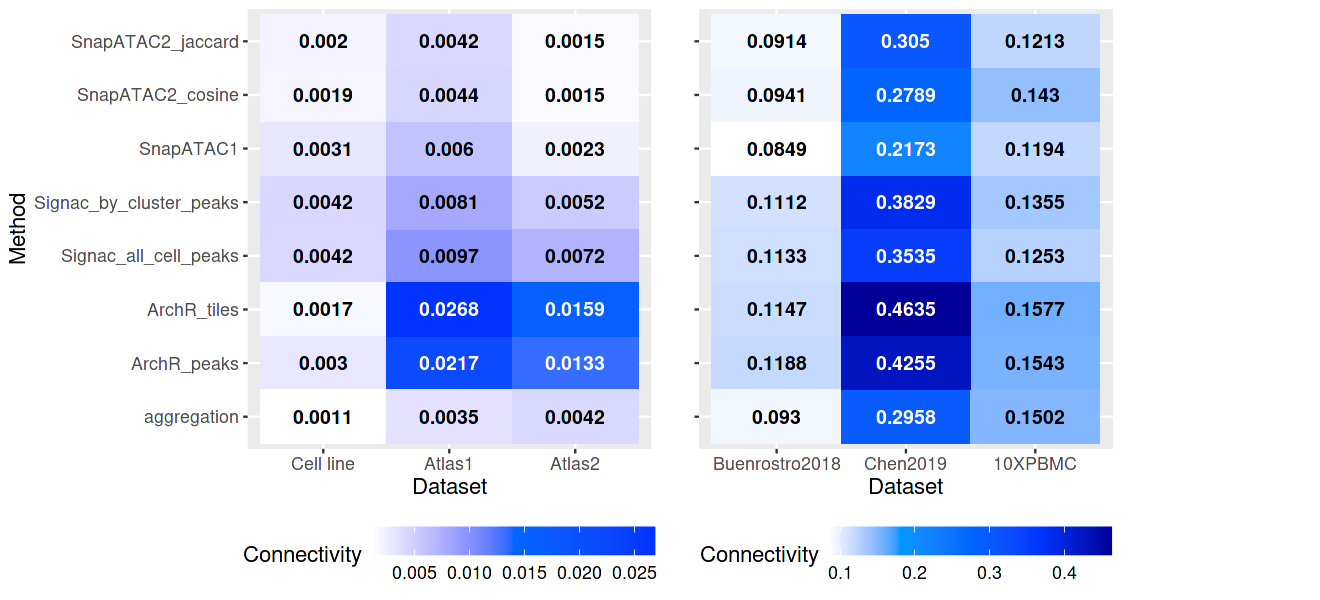

In [192]:
options(repr.plot.width=11, repr.plot.height=5)

metric_name <- "Connectivity"
p2.1 <- df_gs %>% 
        filter(dataset_type =="1") %>% 
        ggplot(aes(dataset_short, method,  fill = average, label = round(average, 4))) + 
        geom_tile() +
        geom_text(aes(color = ifelse(average > 0.01, "white", "black")), size = 4, fontface = "bold")  +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
        labs(y = "Method", x = "Dataset", fill=metric_name) +
        # geom_text(color = "black", size = 4, fontface = "bold")  +
        theme(legend.position = "bottom",text = element_text(size = 13)) +
      # theme_bw() + 
      # theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
        scale_fill_gradientn(colours = my_color_2, guide = guide_colourbar(barwidth = unit(6, "cm")))  +
        scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

  # guides(fill = guide_colorbar(barheight = unit(4, "cm")))

p2.2 <- df_gs %>% 
        filter(dataset_type =="2") %>% 
        ggplot(aes(dataset_short, method,  fill = average, label = round(average, 4))) + 
        geom_tile() +
        geom_text(aes(color = ifelse(average > 0.2, "white", "black")), size = 4, fontface = "bold")  +
        labs(y = "", x = "Dataset", fill=metric_name) +
        theme(axis.text.y = element_blank(),legend.position = "bottom", text = element_text(size = 13)) + 
        scale_fill_gradientn(colours = my_color_3, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
        scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

# Create plot layout with two parts
p2 <- ggdraw() +
  draw_plot(p2.1, 0, 0, 0.5, 1) +
  draw_plot(p2.2, 0.5, 0, 0.35, 1)

# Print the result
print(p2)

In [231]:
# SVG graphics device
svg("Fig2B_heatmap_connectivity_ndim15.svg", width=11, height=5)

# Code of the plot
plot(p2)

# Close the graphics device
dev.off() 

png 
  2

### 2. Silhouette score

In [123]:
unique(df_metrics$metric)

[1] "ARI"              "AMI"              "MI"               "VI"              
 [5] "Silhouette"       "Silhouette_label" "cLISI"            "cLISI_label"     
 [9] "AW"               "AV"               "AW2"              "AV2"             
[13] "ARI2"

In [124]:
# Others
df_metrics_silhouette <- df_metrics %>% filter(metric == "Silhouette_label") %>% filter(ndim == 15)
df_metrics_silhouette$dataset <- factor(df_metrics_silhouette$dataset, levels = dataset_name)

df_metrics_lisi <- df_metrics %>% filter(metric == "cLISI_label") %>% filter(ndim == 15)
df_metrics_lisi$dataset <- factor(df_metrics_lisi$dataset, levels = dataset_name)

In [216]:
df_metrics_silhouette_tmp <- subset(df_metrics_silhouette, select = c(value, method, long_method, feature_type, tile_size, distance, ndim, rds_file, snn_file, dataset, k_optimal, dataset2))
df_metrics_silhouette_tmp <- df_metrics_silhouette_tmp[!duplicated(subset(df_metrics_silhouette_tmp, select = -rds_file)), ]
dim(df_metrics_silhouette_tmp)

[1] 48 12

In [221]:
df_hm <- data.frame(cell_type=c(), negative_fraction=c(), long_method=c(), dataset=c(), dataset2=c())
for(i in 1:dim(df_metrics_silhouette_tmp)[1]){
    rds_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_silhouette_tmp$dataset2[i], "/", df_metrics_silhouette_tmp$rds_file[i])
    res <- readRDS(rds_file)
    df_sil <- data.frame(res$sil2$sil)[,c("cluster", "sil_width")]
    
    snn_file <- paste0("~/public/SiyuanLuo/projects/benchmark/outputs/", df_metrics_silhouette_tmp$dataset2[i], "/", df_metrics_silhouette_tmp$snn_file[i])
    sobj <- readRDS(snn_file)
    true_labels <- sobj$ground_truth
    
    df_sil$cell_type <- unlist(lapply(df_sil$cluster, function(x){levels(true_labels)[x]}))
    label_colname <- "cell_type"

    df_sil <- df_sil[order(df_sil[,"cluster"], -df_sil$sil_width), ]
    df_sil$negative_sil <- df_sil$sil_width < 0

    df_sil_neg <- df_sil %>%
    group_by(cell_type) %>%
    summarise(negative_count = sum(negative_sil), count = n()) 

    df_sil_neg$negative_fraction <- df_sil_neg$negative_count/df_sil_neg$count
    df_sil_neg$long_method <- df_metrics_silhouette_tmp$long_method[i]
    df_sil_neg$dataset <- df_metrics_silhouette_tmp$dataset[i]
    df_sil_neg$dataset2 <- df_metrics_silhouette_tmp$dataset2[i]

    df_hm <- rbind(df_hm, df_sil_neg[,c("cell_type", "negative_fraction", "long_method", "dataset", "dataset2")])
}

In [222]:
dim(df_hm)
head(df_hm)

[1] 560   5

cell_type negative_fraction long_method            
1 293T      0.000000000       Signac_by_cluster_peaks
2 GM12878   0.163420830       Signac_by_cluster_peaks
3 HT1080    0.004530011       Signac_by_cluster_peaks
4 HeLa      0.001323335       Signac_by_cluster_peaks
5 Jurkat    0.001762891       Signac_by_cluster_peaks
6 K562      0.048857368       Signac_by_cluster_peaks
  dataset                     dataset2        
1 Cell line mixing experiment Cell_line_mixing
2 Cell line mixing experiment Cell_line_mixing
3 Cell line mixing experiment Cell_line_mixing
4 Cell line mixing experiment Cell_line_mixing
5 Cell line mixing experiment Cell_line_mixing
6 Cell line mixing experiment Cell_line_mixing

In [223]:
write.table(df_hm, file="Negative_silhouette_frac_all_ndim15.tsv", sep='\t', row.names=FALSE)

In [129]:
df_metrics_silhouette_s <- df_metrics_silhouette %>% 
                            group_by(dataset, long_method) %>% 
                            mutate(average = mean(value)) %>% 
                            subset(select=c(long_method, dataset, average))
df_metrics_silhouette_s <- df_metrics_silhouette_s[!duplicated(df_metrics_silhouette_s), ]
df_metrics_silhouette_s$dataset <- factor(df_metrics_silhouette_s$dataset, levels = dataset_name)
df_metrics_silhouette_s

long_method             dataset                     average    
1  Signac_by_cluster_peaks Cell line mixing experiment  0.31558295
2  Signac_all_cell_peaks   Cell line mixing experiment  0.31006313
3  ArchR_tiles             Cell line mixing experiment  0.38007057
4  ArchR_peaks             Cell line mixing experiment  0.37944704
5  SnapATAC1               Cell line mixing experiment  0.34499508
6  aggregation             Cell line mixing experiment  0.64872353
7  SnapATAC2_jaccard       Cell line mixing experiment  0.33191264
8  SnapATAC2_cosine        Cell line mixing experiment  0.32320344
9  Signac_all_cell_peaks   human adult atlas subset1    0.38989476
10 Signac_by_cluster_peaks human adult atlas subset1    0.39502316
11 ArchR_peaks             human adult atlas subset1    0.25711969
12 ArchR_tiles             human adult atlas subset1    0.23138337
13 SnapATAC1               human adult atlas subset1    0.45242948
14 aggregation             human adult atlas subset1    0.59825803
15 SnapATAC2_jaccard       human adult atlas subset1    0.34501399
16 SnapATAC2_cosine        human adult atlas subset1    0.45970664
17 Signac_by_cluster_peaks human adult atlas subset2    0.25061754
18 Signac_all_cell_peaks   human adult atlas subset2    0.23796441
19 ArchR_peaks             human adult atlas subset2    0.11995777
20 ArchR_tiles             human adult atlas subset2    0.10258967
21 SnapATAC1               human adult atlas subset2    0.28449953
22 aggregation             human adult atlas subset2    0.51400595
23 SnapATAC2_jaccard       human adult atlas subset2    0.30232424
24 SnapATAC2_cosine        human adult atlas subset2    0.28983280
25 Signac_by_cluster_peaks Buenrostro2018               0.02139323
26 Signac_all_cell_peaks   Buenrostro2018               0.02339005
27 ArchR_peaks             Buenrostro2018               0.10977062
28 ArchR_tiles             Buenrostro2018               0.11040722
29 SnapATAC1               Buenrostro2018               0.10193095
30 aggregation             Buenrostro2018               0.11812090
31 SnapATAC2_jaccard       Buenrostro2018               0.11665599
32 SnapATAC2_cosine        Buenrostro2018               0.11168492
33 Signac_by_cluster_peaks Chen2019                    -0.06268152
34 Signac_all_cell_peaks   Chen2019                    -0.06253947
35 ArchR_tiles             Chen2019                    -0.05558921
36 ArchR_peaks             Chen2019                    -0.05452802
37 SnapATAC1               Chen2019                     0.06031055
38 aggregation             Chen2019                     0.14734104
39 SnapATAC2_jaccard       Chen2019                     0.05867023
40 SnapATAC2_cosine        Chen2019                     0.06994095
41 Signac_by_cluster_peaks 10X PBMC multiomics          0.12540030
42 Signac_all_cell_peaks   10X PBMC multiomics          0.14229824
43 ArchR_tiles             10X PBMC multiomics          0.19945025
44 ArchR_peaks             10X PBMC multiomics          0.20953059
45 SnapATAC1               10X PBMC multiomics          0.19795129
46 aggregation             10X PBMC multiomics          0.26520716
47 SnapATAC2_jaccard       10X PBMC multiomics          0.18599122
48 SnapATAC2_cosine        10X PBMC multiomics          0.18109271

In [130]:
df_metrics_silhouette_s <- df_metrics_silhouette_s %>% 
  mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                             TRUE ~ "Other"))
df_metrics_silhouette_s <- df_metrics_silhouette_s %>% 
  mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[[as.character(dataset)]],
                             TRUE ~ "Other"))

df_metrics_silhouette_s$dataset_short <- factor(df_metrics_silhouette_s$dataset_short, levels = c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC"))

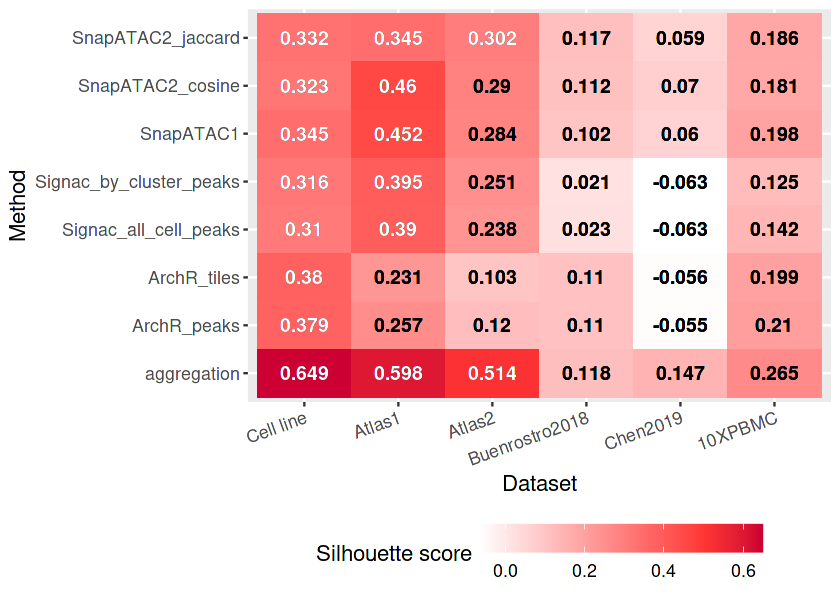

In [199]:
options(repr.plot.width=7, repr.plot.height=5)

p3 <- ggplot(df_metrics_silhouette_s, aes(dataset_short, long_method,  fill = average, label = round(average, 3))) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Dataset", fill="Silhouette score") +
      geom_text(color = "black", size = 4, fontface = "bold")  +
      theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom")+
      geom_text(aes(color = ifelse(average > 0.3, "white", "black")), size = 4, fontface = "bold")  +
      scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p3)

In [232]:
# SVG graphics device
svg("Fig2B_heatmap_Silhouette_ndim15.svg", width=7, height=5)

# Code of the plot
plot(p3)

# Close the graphics device
dev.off() 

png 
  2

In [193]:
ordered_dataset_shortname <- c("Cell line","Atlas1", "Atlas2","Buenrostro2018","Chen2019","10XPBMC")

In [238]:
# Must contain column name "value"
average_over_classes <- function(df_metric, ordered_dataset_name, ordered_dataset_shortname, mapping_short_dataset, mapping_dataset_type){
    df_avg <- df_metric %>% 
    group_by(dataset, long_method) %>% 
    mutate(average = mean(value)) %>% 
    subset(select=c(long_method, dataset, average))
    
    df_avg <- df_avg[!duplicated(df_avg), ]
    df_avg$dataset <- factor(df_avg$dataset, levels = ordered_dataset_name)

    df_avg <- df_avg %>% 
      mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[[as.character(dataset)]],
                                 TRUE ~ "Other"))
    df_avg <- df_avg %>% 
      mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[[as.character(dataset)]],
                                 TRUE ~ "Other"))

    df_avg$dataset_short <- factor(df_avg$dataset_short, levels = ordered_dataset_shortname)
    return(df_avg)
}

In [243]:
colnames(df_hm)[colnames(df_hm) == "negative_fraction"] <- "value"
df_sil_frac <- average_over_classes(df_hm, dataset_name, ordered_dataset_shortname, mapping, mapping2)

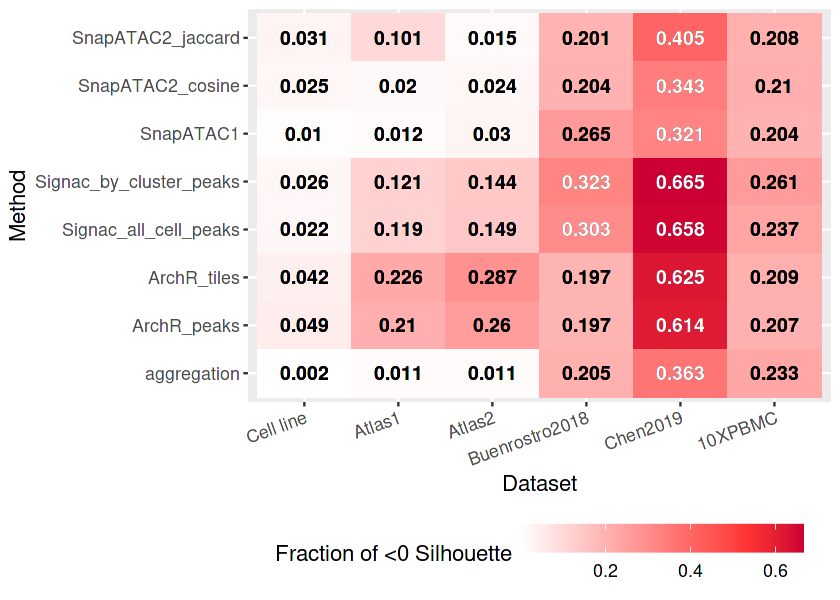

In [246]:
options(repr.plot.width=7, repr.plot.height=5)

p4 <- ggplot(df_sil_frac, aes(dataset_short, long_method,  fill = average, label = round(average, 3))) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Dataset", fill="Fraction of <0 Silhouette") +
      geom_text(color = "black", size = 4, fontface = "bold")  +
      theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom")+
      geom_text(aes(color = ifelse(average > 0.3, "white", "black")), size = 4, fontface = "bold")  +
      scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p4)

In [248]:
# SVG graphics device
svg("Fig2B_heatmap_Sil_frac_ndim15.svg", width=7, height=5)

# Code of the plot
plot(p4)

# Close the graphics device
dev.off() 

png 
  2

In [252]:
df_lisi_avg <- average_over_classes(df_metrics_lisi, dataset_name, ordered_dataset_shortname, mapping, mapping2)

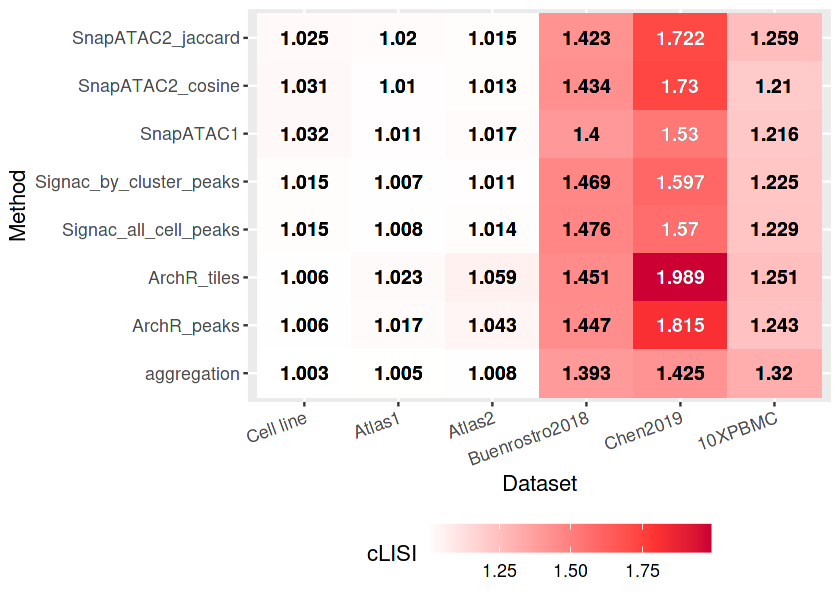

In [255]:
options(repr.plot.width=7, repr.plot.height=5)

p5 <- ggplot(df_lisi_avg, aes(dataset_short, long_method,  fill = average, label = round(average, 3))) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Dataset", fill="cLISI") +
      geom_text(color = "black", size = 4, fontface = "bold")  +
      theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom")+
      geom_text(aes(color = ifelse(average > 1.5, "white", "black")), size = 4, fontface = "bold")  +
      scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p5)

In [257]:
# SVG graphics device
svg("Fig2B_heatmap_cLISI_ndim15.svg", width=7, height=5)

# Code of the plot
plot(p5)

# Close the graphics device
dev.off() 

png 
  2

## Fig 2B: grouped sorted barplot

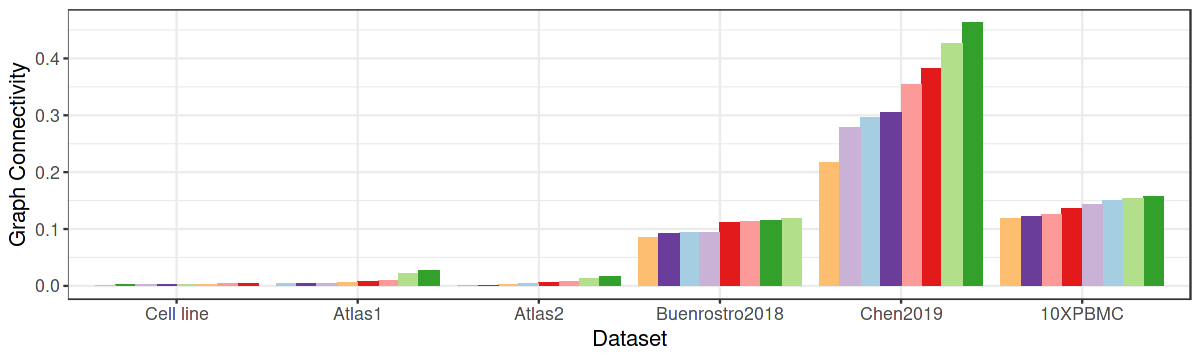

In [365]:
options(repr.plot.width=10, repr.plot.height=3)
df_gs$method <- factor(df_gs$method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p2.3 <- df_gs %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="Dataset", y="Graph Connectivity", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none") #+ coord_cartesian(ylim = c(1, 2))

p2.3

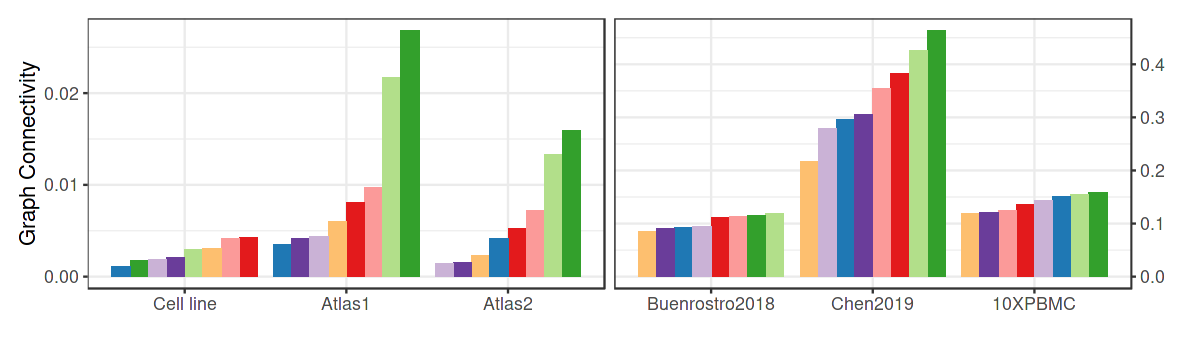

In [456]:
options(repr.plot.width=10, repr.plot.height=3)
df_gs$method <- factor(df_gs$method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p2.3.1 <- df_gs %>% 
        filter(dataset_type =="1") %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="Graph Connectivity", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none") #+ coord_cartesian(ylim = c(1, 2))

p2.3.2 <- df_gs %>% 
        filter(dataset_type =="2") %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,0,0,0), "cm"))+
        scale_y_continuous(position = "right") #+ coord_cartesian(ylim = c(1, 2))

p2.3.3 <- p2.3.1 + p2.3.2 + theme(plot.margin = unit(c(0, 0, -1, 0), "cm"))
p2.3.3

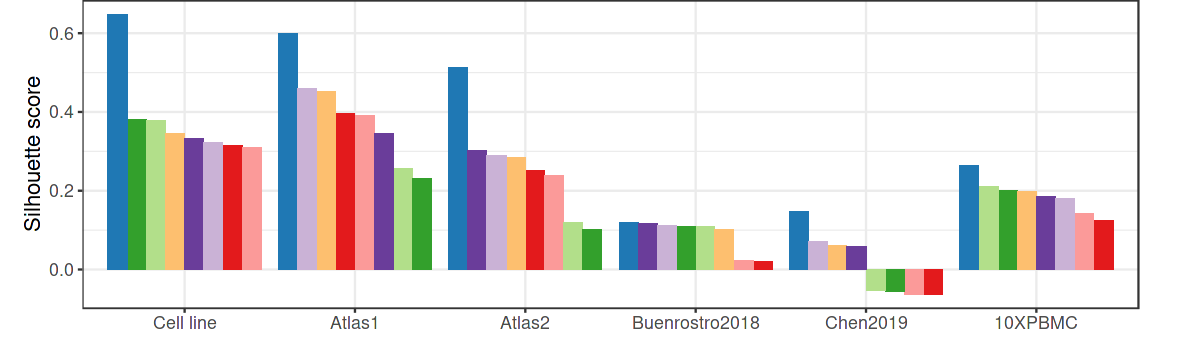

In [457]:
options(repr.plot.width=10, repr.plot.height=3)
df_metrics_silhouette_s$long_method <- factor(df_metrics_silhouette_s$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p3.2 <- df_metrics_silhouette_s %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(-average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="Silhouette score", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,1.3,0,0.5), "cm")) #+ coord_cartesian(ylim = c(1, 2))

p3.2

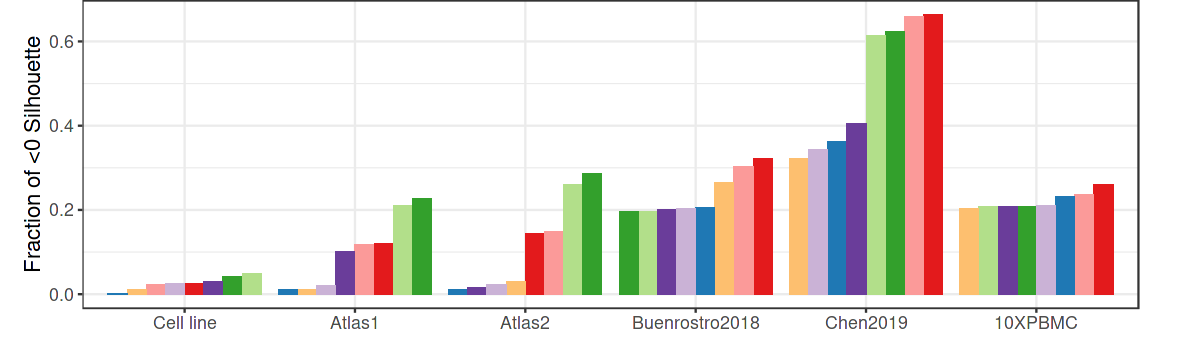

In [458]:
options(repr.plot.width=10, repr.plot.height=3)
df_sil_frac$long_method <- factor(df_sil_frac$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))

p4.2 <- df_sil_frac %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="", y="Fraction of <0 Silhouette", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "none", plot.margin = unit(c(0,1.3,0,0.5), "cm")) #+ coord_cartesian(ylim = c(1, 2))

p4.2

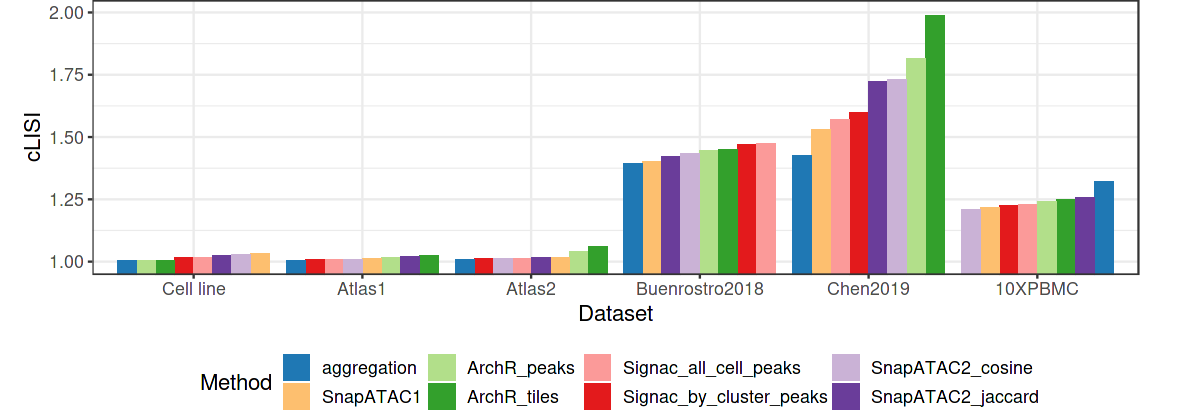

In [459]:
options(repr.plot.width=10, repr.plot.height=3.5)
df_lisi_avg$long_method <- factor(df_lisi_avg$long_method, levels=c("aggregation", "SnapATAC1", "ArchR_peaks", "ArchR_tiles","Signac_all_cell_peaks","Signac_by_cluster_peaks","SnapATAC2_cosine","SnapATAC2_jaccard"))
p5.2 <- df_lisi_avg %>% 
        group_by(dataset_short) %>% 
        mutate(position = rank(average)) %>%
        ggplot(aes(x = dataset_short, y = average, fill = long_method, group = position)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x="Dataset", y="cLISI", fill="Method") +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),legend.position = "bottom", plot.margin = unit(c(0,1.3,0,0.5), "cm")) + 
        coord_cartesian(ylim = c(1, 2))

p5.2

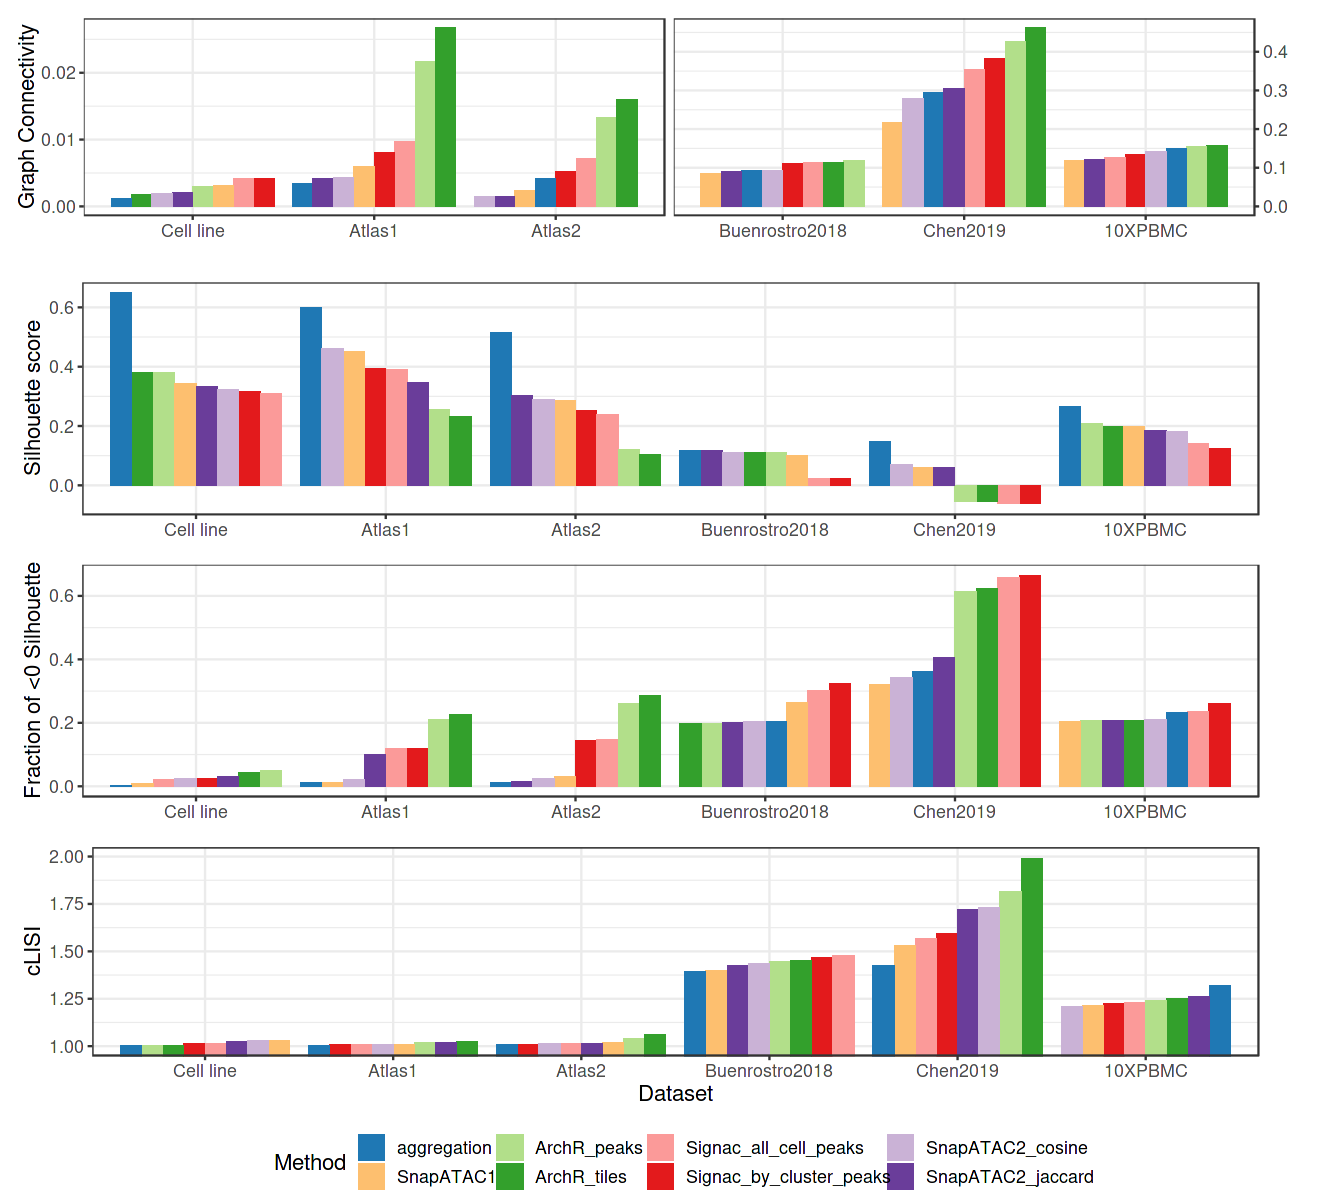

In [460]:
options(repr.plot.width=11, repr.plot.height=10)
p6 <- ggarrange(p2.3.3, p3.2, p4.2, p5.2, nrow = 4, ncol = 1, heights = c(4,4,4,5)) 
p6

In [461]:
# SVG graphics device
svg("Fig2B_ranked_barplot_ndim15.svg", width=10, height=9)

# Code of the plot
plot(p6)

# Close the graphics device
dev.off() 

png 
  2

## Fig 2C: AUC

In [165]:
library(pracma)


Attaching package: ‘pracma’


The following object is masked from ‘package:MESS’:

    repmat




In [269]:
df_metrics_selected <- df_metrics %>% filter(ndim==n) %>% filter(metric %in% c("ARI", "ARI2","AMI", "AV", "AW", "MI", "VI"))
dim(df_metrics_selected)

[1] 5873   16

In [270]:
df_metrics_filtered <- df_metrics_selected %>% group_by(dataset, long_method, metric) %>%
  filter(value != min(value)) %>%
  group_by(dataset, long_method, n_clusters, metric) %>%
  mutate(mean_value = mean(value)) %>%
  ungroup() 

df_metrics_filtered <- df_metrics_filtered[!duplicated(subset(df_metrics_filtered, select = c(n_clusters,metric,long_method, dataset))), ]

dim(df_metrics_filtered)

[1] 2437   17

In [271]:
df_metrics_filtered <- df_metrics_filtered %>% 
    group_by(dataset, metric) %>%
  mutate(upper_bound = max(mean_value)) %>%
  ungroup() 
df_metrics_filtered$upper_bound[!df_metrics_filtered$metric %in% c("MI", "VI")] <- 1


In [326]:
df_auc <- df_metrics_filtered %>% 
    group_by(dataset, long_method, metric) %>% 
    mutate(auc=trapz(n_clusters, mean_value), total_area=trapz(n_clusters, upper_bound)) %>% 
    mutate(auc_frac=auc/total_area)
df_auc <- df_auc[!duplicated(subset(df_auc, select = c(metric, long_method, dataset))), ]

df_auc$auc_frac[df_auc$metric=="VI"] <- 1-df_auc$auc_frac[df_auc$metric=="VI"]
dim(df_auc)
df_auc

[1] 335  21

n_clusters metric value     method      long_method            
1   10         ARI    0.9661907 Signac      Signac_by_cluster_peaks
2   10         AMI    0.9576516 Signac      Signac_by_cluster_peaks
3   10         VI     0.1749132 Signac      Signac_by_cluster_peaks
4   10         AW     0.9591388 Signac      Signac_by_cluster_peaks
5   10         ARI2   0.9496788 Signac      Signac_by_cluster_peaks
6   11         MI     2.0909370 Signac      Signac_by_cluster_peaks
7   11         AV     0.9827183 Signac      Signac_by_cluster_peaks
8   10         ARI    0.9663607 Signac      Signac_all_cell_peaks  
9   10         AMI    0.9580376 Signac      Signac_all_cell_peaks  
10  10         VI     0.1733986 Signac      Signac_all_cell_peaks  
11  10         AW     0.9594125 Signac      Signac_all_cell_peaks  
12  10         ARI2   0.9500553 Signac      Signac_all_cell_peaks  
13  11         MI     2.1125203 Signac      Signac_all_cell_peaks  
14  11         AV     0.9961382 Signac      Signac_all_cell_peaks  
15  10         AMI    0.9537023 ArchR       ArchR_tiles            
16  10         VI     0.1753674 ArchR       ArchR_tiles            
17  10         AW     0.9639416 ArchR       ArchR_tiles            
18  11         ARI    0.9799582 ArchR       ArchR_tiles            
19  11         MI     2.1224386 ArchR       ArchR_tiles            
20  11         AV     0.9966555 ArchR       ArchR_tiles            
21  11         ARI2   0.9406567 ArchR       ArchR_tiles            
22  10         ARI    0.9475770 ArchR       ArchR_peaks            
23  10         AMI    0.9521592 ArchR       ArchR_peaks            
24  10         VI     0.1823104 ArchR       ArchR_peaks            
25  10         AW     0.9625897 ArchR       ArchR_peaks            
26  10         ARI2   0.9196615 ArchR       ArchR_peaks            
27  12         MI     2.1181074 ArchR       ArchR_peaks            
28  12         AV     0.9957924 ArchR       ArchR_peaks            
29  10         ARI    0.9893801 SnapATAC1   SnapATAC1              
30  10         AMI    0.9832659 SnapATAC1   SnapATAC1              
⋮   ⋮          ⋮      ⋮         ⋮           ⋮                      
306 6          AV     0.4714796 ArchR       ArchR_peaks            
307 6          ARI2   0.6410377 ArchR       ArchR_peaks            
308 6          ARI    0.6486729 SnapATAC1   SnapATAC1              
309 6          AMI    0.6349682 SnapATAC1   SnapATAC1              
310 6          VI     0.8834907 SnapATAC1   SnapATAC1              
311 6          AW     0.9780710 SnapATAC1   SnapATAC1              
312 6          ARI2   0.6518716 SnapATAC1   SnapATAC1              
313 8          MI     1.6027454 SnapATAC1   SnapATAC1              
314 8          AV     0.5756583 SnapATAC1   SnapATAC1              
315 7          ARI    0.6544769 aggregation aggregation            
316 7          AMI    0.6499240 aggregation aggregation            
317 7          VI     0.8658274 aggregation aggregation            
318 7          AW     0.9644857 aggregation aggregation            
319 7          ARI2   0.7240267 aggregation aggregation            
320 9          MI     1.6303874 aggregation aggregation            
321 9          AV     0.5838842 aggregation aggregation            
322 6          ARI    0.6424502 SnapATAC2   SnapATAC2_jaccard      
323 6          AMI    0.6291821 SnapATAC2   SnapATAC2_jaccard      
324 6          VI     0.9070628 SnapATAC2   SnapATAC2_jaccard      
325 6          AW     0.9720007 SnapATAC2   SnapATAC2_jaccard      
326 9          MI     1.7489110 SnapATAC2   SnapATAC2_jaccard      
327 9          AV     0.7332082 SnapATAC2   SnapATAC2_jaccard      
328 9          ARI2   0.7936033 SnapATAC2   SnapATAC2_jaccard      
329 6          ARI    0.6424648 SnapATAC2   SnapATAC2_cosine       
330 6          AMI    0.6290035 SnapATAC2   SnapATAC2_cosine       
331 6          VI     0.9072695 SnapATAC2   SnapATAC2_cosine       
332 6          AW     0.9729688 SnapATAC2   SnapATAC2_cosine

### Heatmap

In [327]:
df_auc$dataset <- factor(df_auc$dataset, levels = dataset_name)

In [328]:
df_auc <- df_auc %>% 
    mutate(dataset_short = case_when(as.character(dataset) %in% names(mapping) ~ mapping[as.character(dataset)]))
df_auc <- df_auc %>% 
    mutate(dataset_type = case_when(as.character(dataset) %in% names(mapping2) ~ mapping2[as.character(dataset)]))

df_auc$dataset <- factor(df_auc$dataset, levels = ordered_dataset_shortname)

#### For one dataset

##### PBMC

In [275]:
df_auc_sub <- df_auc %>% filter(dataset_short=="10XPBMC")

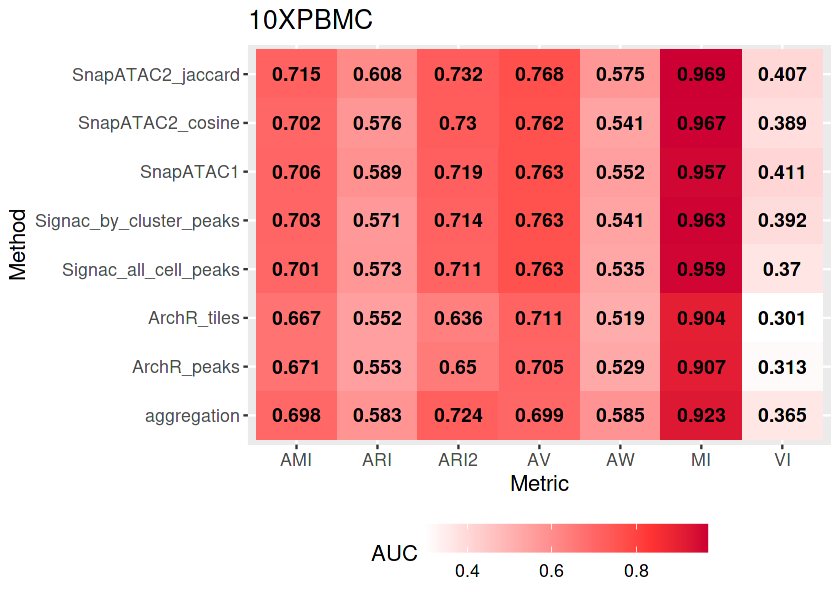

In [281]:
options(repr.plot.width=7, repr.plot.height=5)

p1 <- ggplot(df_auc_sub, aes(metric, long_method,  fill = auc_frac, label = round(auc_frac, 3))) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Metric", fill="AUC", title="10XPBMC") +
      geom_text(color = "black", size = 4, fontface = "bold")  +
      # theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom") +
      # geom_text(aes(color = ifelse(auc > 0.3, "white", "black")), size = 4, fontface = "bold")  +
      scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p1)

In [291]:
# Turn value into rank
df_auc_sub$rank_auc <- ave(df_auc_sub$auc_frac, df_auc_sub$metric, FUN = function(x) max(rank(x)) - rank(x) + 1)


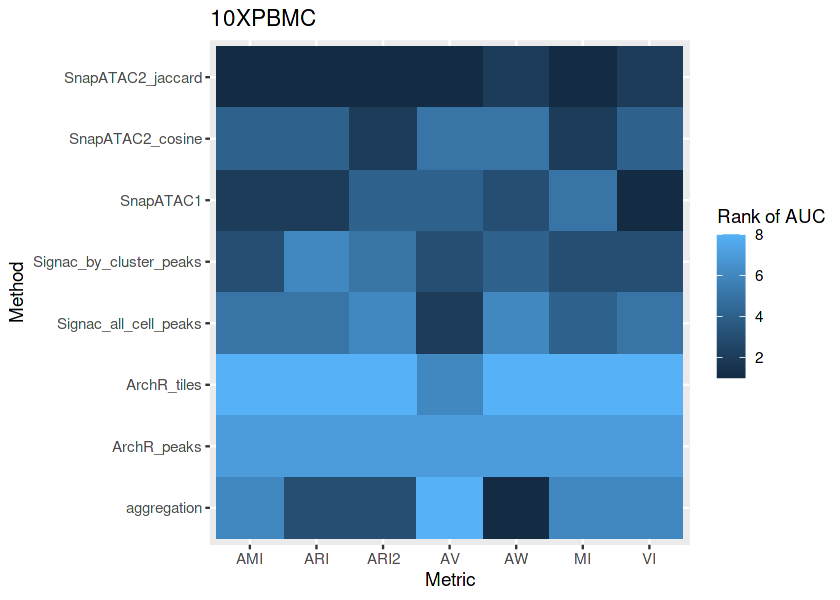

In [297]:
options(repr.plot.width=7, repr.plot.height=5)

p2 <- ggplot(df_auc_sub, aes(metric, long_method,  fill = rank_auc)) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Metric", fill="Rank of AUC", title="10XPBMC") +
    #   geom_text(color = "black", size = 4, fontface = "bold")  +
      # theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      theme(text = element_text(size = 13),legend.position = "bottom") +
      # geom_text(aes(color = ifelse(auc > 0.3, "white", "black")), size = 4, fontface = "bold")  +
    #   scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p2)

In [386]:
df_auc_sub <- df_auc %>% filter(dataset_short=="Chen2019")
# Turn value into rank
df_auc_sub$rank_auc <- ave(df_auc_sub$auc_frac, df_auc_sub$metric, FUN = function(x) max(rank(x)) - rank(x) + 1)

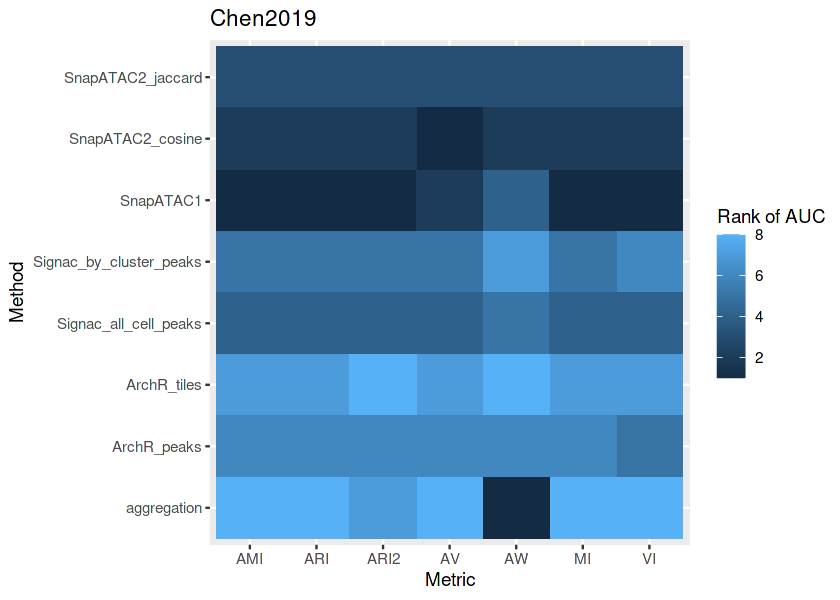

In [387]:
options(repr.plot.width=7, repr.plot.height=5)

p2 <- ggplot(df_auc_sub, aes(metric, long_method,  fill = rank_auc)) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Metric", fill="Rank of AUC", title="Chen2019") #+
    #   geom_text(color = "black", size = 4, fontface = "bold")  +
      # theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      # scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      # theme(text = element_text(size = 13),legend.position = "bottom") #+
      # geom_text(aes(color = ifelse(auc > 0.3, "white", "black")), size = 4, fontface = "bold")  +
    #   scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p2)

In [388]:
df_auc_sub <- df_auc %>% filter(dataset_short=="Buenrostro2018")
# Turn value into rank
df_auc_sub$rank_auc <- ave(df_auc_sub$auc_frac, df_auc_sub$metric, FUN = function(x) max(rank(x)) - rank(x) + 1)

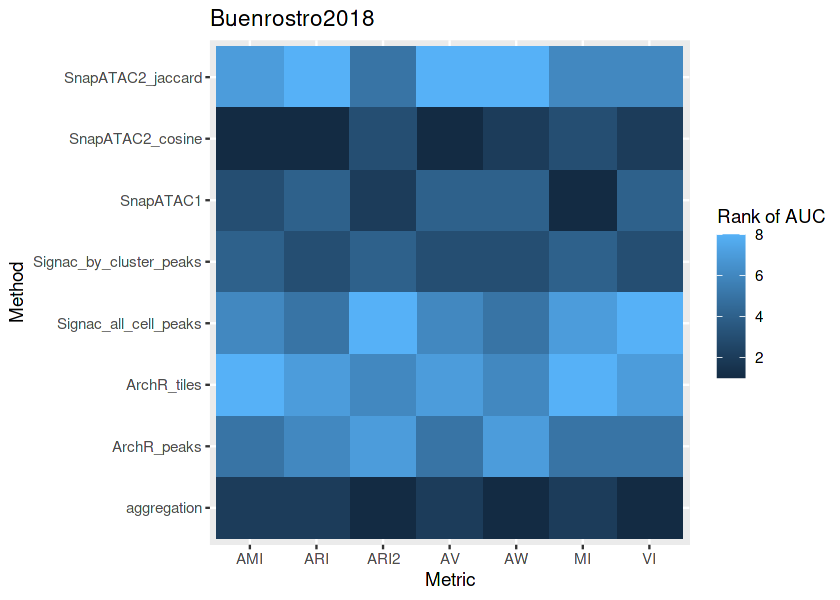

In [390]:
options(repr.plot.width=7, repr.plot.height=5)

p2 <- ggplot(df_auc_sub, aes(metric, long_method,  fill = rank_auc)) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Metric", fill="Rank of AUC", title="Buenrostro2018") #+
    #   geom_text(color = "black", size = 4, fontface = "bold")  +
      # theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      # scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      # theme(text = element_text(size = 13),legend.position = "bottom") #+
      # geom_text(aes(color = ifelse(auc > 0.3, "white", "black")), size = 4, fontface = "bold")  +
    #   scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p2)

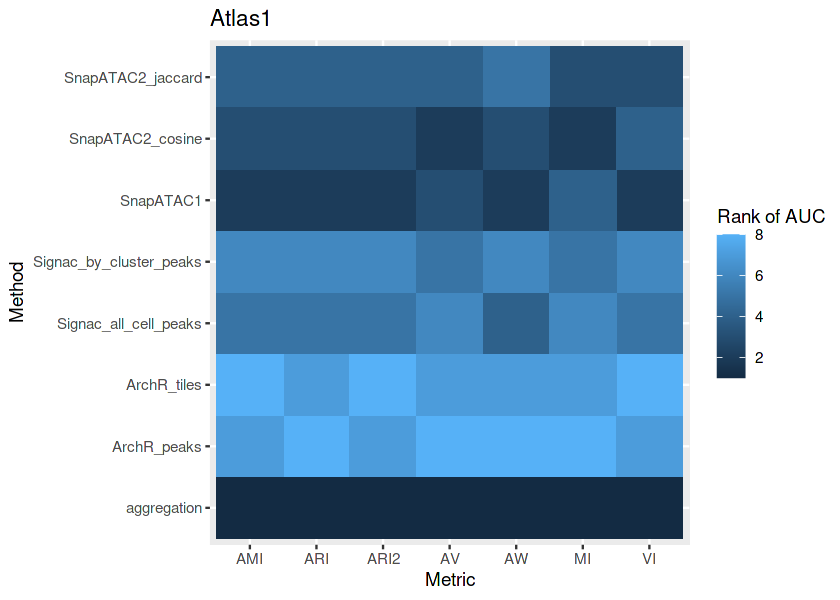

In [393]:
df_auc_sub <- df_auc %>% filter(dataset_short=="Atlas1")
# Turn value into rank
df_auc_sub$rank_auc <- ave(df_auc_sub$auc_frac, df_auc_sub$metric, FUN = function(x) max(rank(x)) - rank(x) + 1)
options(repr.plot.width=7, repr.plot.height=5)

p2 <- ggplot(df_auc_sub, aes(metric, long_method,  fill = rank_auc)) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Metric", fill="Rank of AUC", title="Atlas1") #+
    #   geom_text(color = "black", size = 4, fontface = "bold")  +
      # theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      # scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      # theme(text = element_text(size = 13),legend.position = "bottom") #+
      # geom_text(aes(color = ifelse(auc > 0.3, "white", "black")), size = 4, fontface = "bold")  +
    #   scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p2)

#### Aggregate across datasets

In [348]:
df_auc <- df_auc %>% group_by(metric, dataset2) %>%
  mutate(group_index = cur_group_id()) 

In [349]:
# Turn value into rank
df_auc$rank_auc <- ave(df_auc$auc_frac, df_auc$group_index, FUN = function(x) max(rank(x)) - rank(x) + 1)

In [350]:
# heatmap of mean
df_auc_mean <- df_auc %>% 
    group_by(long_method, metric) %>% 
    mutate(mean_rank = mean(rank_auc)) %>% ungroup

df_auc_mean <- df_auc_mean[!duplicated(subset(df_auc_mean, select = c(long_method, mean_rank, metric))), ]


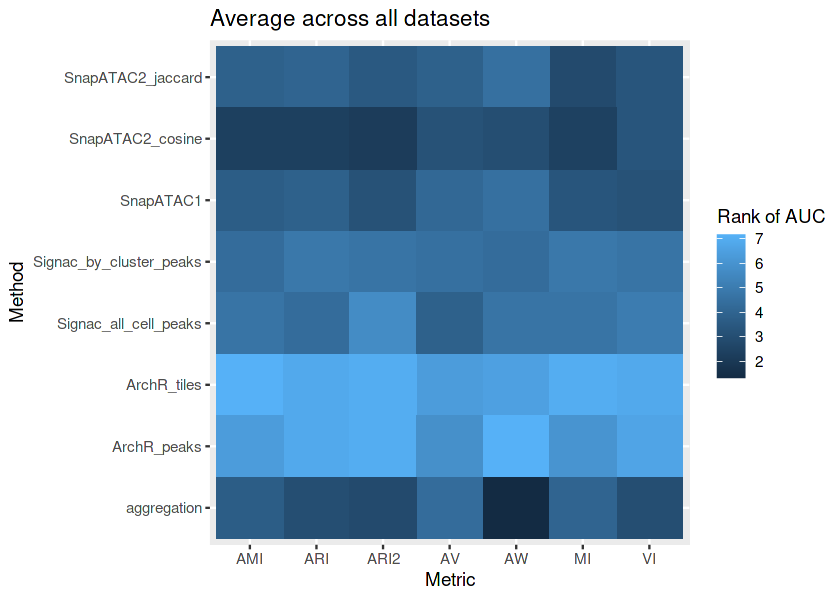

In [351]:
options(repr.plot.width=7, repr.plot.height=5)

p3 <- ggplot(df_auc_mean, aes(metric, long_method,  fill = mean_rank)) + 
      geom_tile() +
      # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
      labs(y = "Method", x = "Metric", fill="Rank of AUC", title="Average across all datasets") 
    #   geom_text(color = "black", size = 4, fontface = "bold")  +
      # theme(axis.text.x = element_text(angle = 20, hjust = 1)) + 
      # scale_fill_gradientn(colours = my_color_4, guide = guide_colourbar(barwidth = unit(6, "cm"))) +
      # theme(text = element_text(size = 13),legend.position = "bottom") 
      # geom_text(aes(color = ifelse(auc > 0.3, "white", "black")), size = 4, fontface = "bold")  +
    #   scale_colour_manual(values=c("white"="white", "black"="black"), guide = "none")

print(p3)

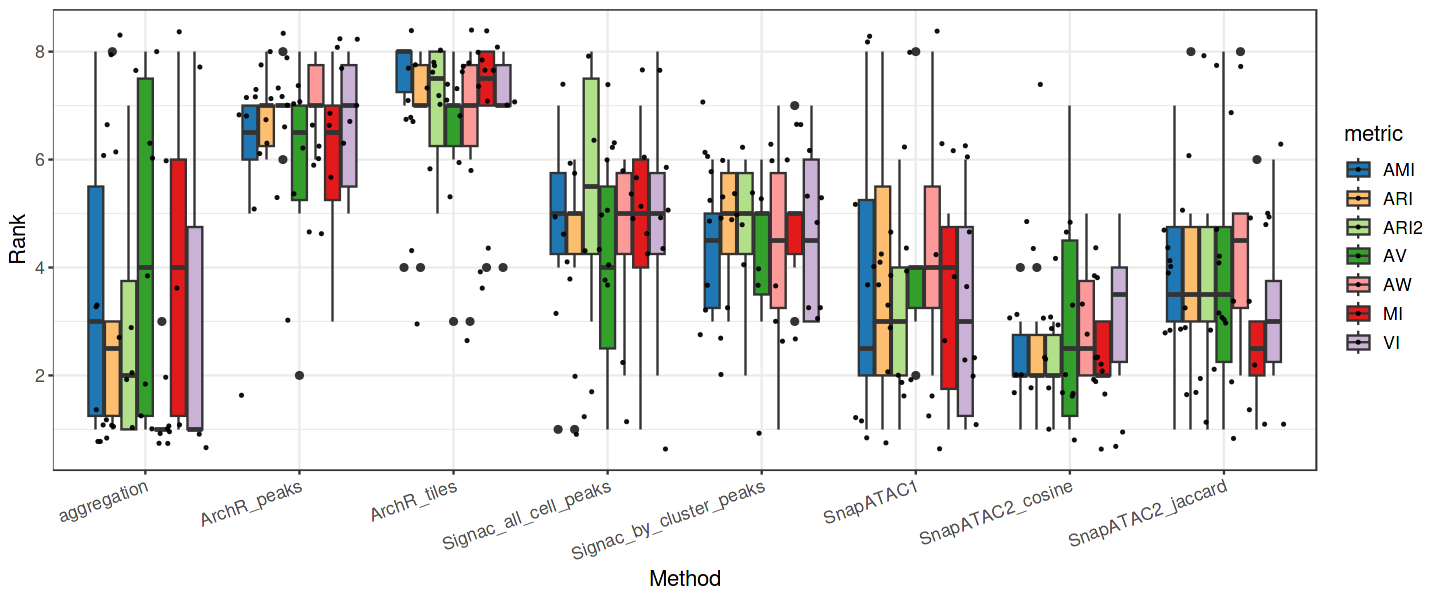

In [358]:
# grouped box plot
options(repr.plot.width=12, repr.plot.height=5)

p4 <- df_auc %>% 
        ggplot(aes(x = long_method, y = rank_auc, fill = factor(metric))) +
        geom_boxplot() +
        labs(x="Method", y="Rank", fill="metric") +
        geom_jitter(color="black", size=0.4, alpha=0.9) +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),axis.text.x = element_text(angle = 20, hjust = 1)) #+ coord_cartesian(ylim = c(1, 2))

p4

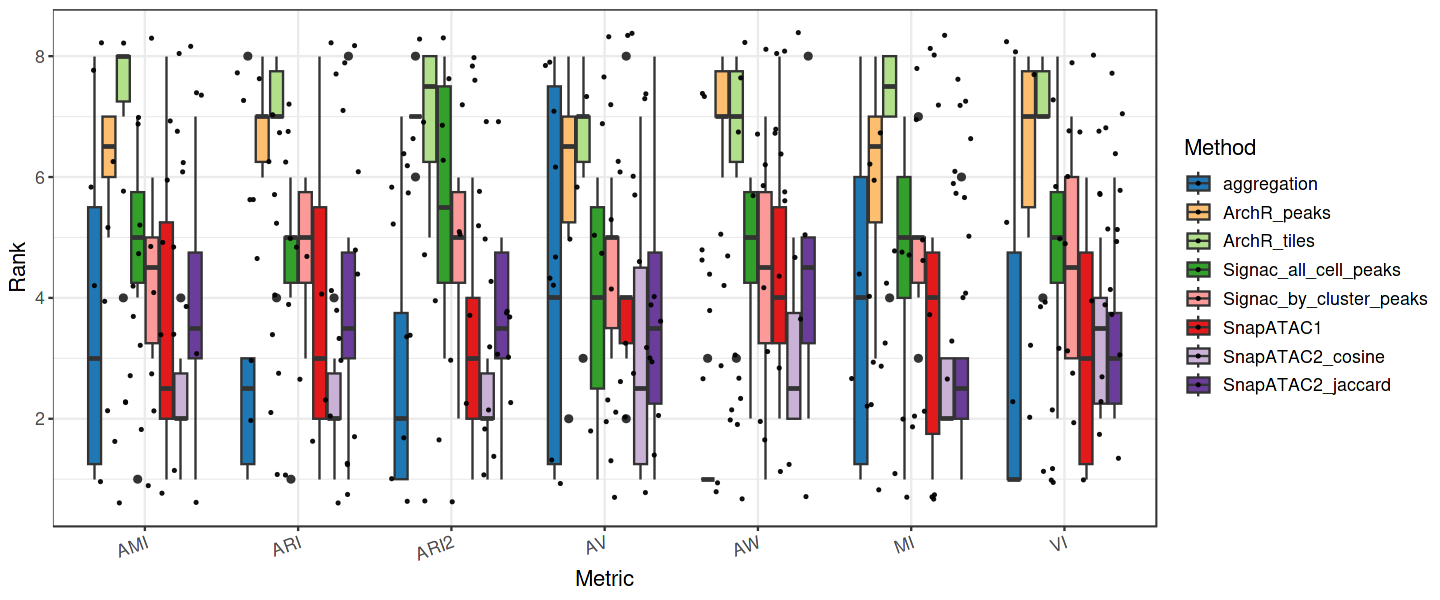

In [360]:
# grouped box plot
options(repr.plot.width=12, repr.plot.height=5)

p4 <- df_auc %>% 
        ggplot(aes(x = metric, y = rank_auc, fill = factor(long_method))) +
        geom_boxplot() +
        labs(x="Metric", y="Rank", fill="Method") +
        geom_jitter(color="black", size=0.4, alpha=0.9) +
      # ggtitle("Grouped Bar Plot") + 
        scale_fill_manual(values = my_col_m3) +
        theme_bw() +
        theme(text = element_text(size = 13),axis.text.x = element_text(angle = 20, hjust = 1)) #+ coord_cartesian(ylim = c(1, 2))

p4

# Fig 3

In [ ]:
options(repr.plot.width=11, repr.plot.height=5)

ggplot(df, aes(cell_type, method,  fill = average, label = round(weak_frac, 2))) + 
  geom_tile() +
  # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
  labs(y = "Method", x = "Cell type") +
  geom_text(color = "black", size = 4, fontface = "bold")  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  scale_fill_gradientn(colours = my_color, guide = guide_colourbar())

In [13]:
unique(df$dataset2)

[1] "Cell_line_mixing" "candidate1"       "candidate2"       "Buenrostro_2018" 
[5] "Chen_2019"        "PBMC_multiomics"

## Easy task

### Atlas1

In [5]:
j <- 2
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

In [6]:
dim(df)
dim(df_metrics)

[1] 3356   18

[1] 43628    16

#### Aggregation

In [8]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method      long_method feature_type tile_size
1 11         ARI    0.9576162 aggregation aggregation default      0        
2 12         ARI    0.9691559 aggregation aggregation default      0        
3 13         ARI    0.9930640 aggregation aggregation default      0        
4 14         ARI    0.9476121 aggregation aggregation default      0        
5 15         ARI    0.9380637 aggregation aggregation default      0        
6 16         ARI    0.8856731 aggregation aggregation default      0        
  distance ndim resolution
1 default  15   0.05      
2 default  15   0.10      
3 default  15   0.35      
4 default  15   0.50      
5 default  15   0.60      
6 default  15   1.00      
  rds_file                                                                   
1 candidate1/evaluation/aggregation/default/0/default/15/r0.05_evaluation.RDS
2 candidate1/evaluation/aggregation/default/0/default/15/r0.1_evaluation.RDS 
3 candidate1/evaluation/aggregation/default/0/default/15/r0.35_evaluation.RDS
4 candidate1/evaluation/aggregation/default/0/default/15/r0.5_evaluation.RDS 
5 candidate1/evaluation/aggregation/default/0/default/15/r0.6_evaluation.RDS 
6 candidate1/evaluation/aggregation/default/0/default/15/r1_evaluation.RDS   
  clustering_file                                                 
1 candidate1/clustering/aggregation/default/0/default/15/r0.05.tsv
2 candidate1/clustering/aggregation/default/0/default/15/r0.1.tsv 
3 candidate1/clustering/aggregation/default/0/default/15/r0.35.tsv
4 candidate1/clustering/aggregation/default/0/default/15/r0.5.tsv 
5 candidate1/clustering/aggregation/default/0/default/15/r0.6.tsv 
6 candidate1/clustering/aggregation/default/0/default/15/r1.tsv   
  snn_file                                                           
1 candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS
2 candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS
3 candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS
4 candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS
5 candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS
6 candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS
  dataset                   k_optimal dataset2  
1 human adult atlas subset1 13        candidate1
2 human adult atlas subset1 13        candidate1
3 human adult atlas subset1 13        candidate1
4 human adult atlas subset1 13        candidate1
5 human adult atlas subset1 13        candidate1
6 human adult atlas subset1 13        candidate1

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


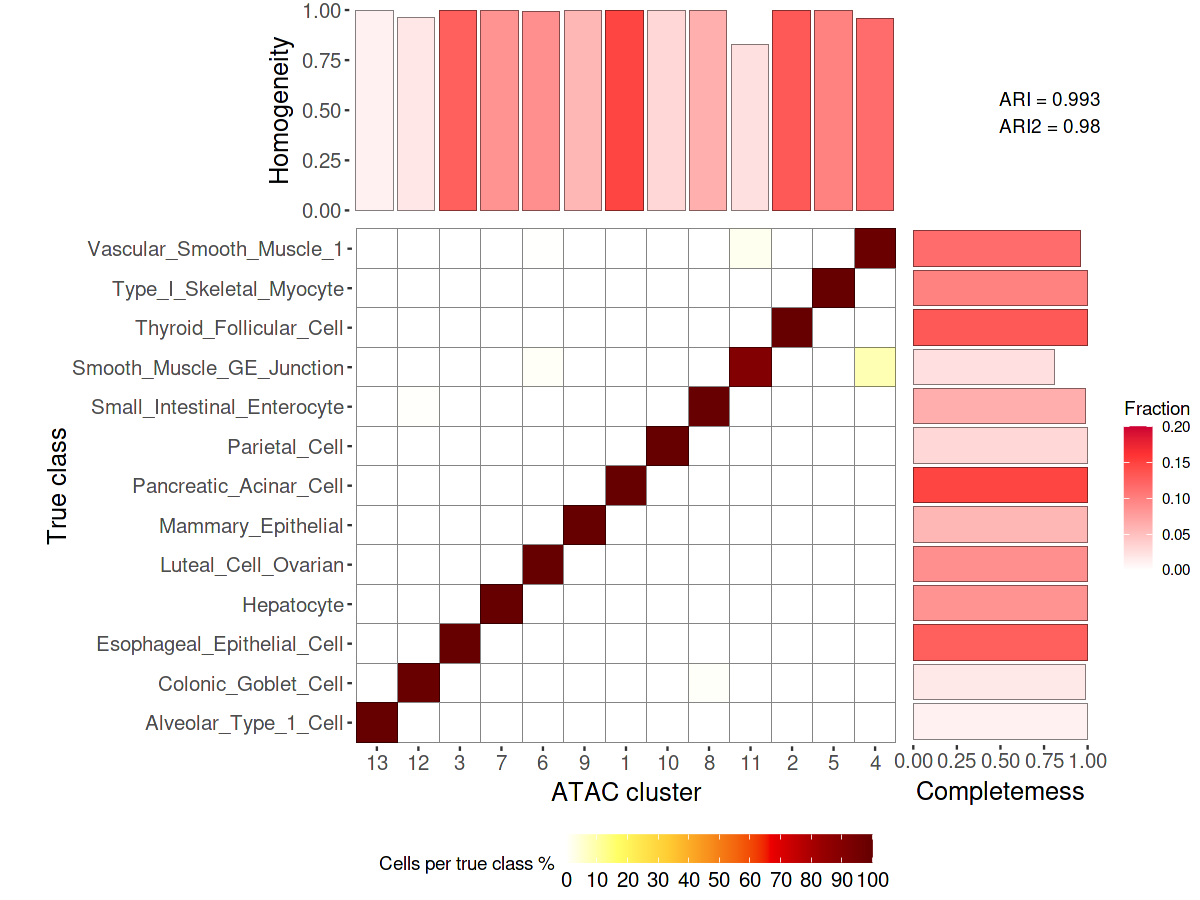

In [9]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=7.5)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.7, c=2, m=0, n=0.2)
p2

In [10]:
# SVG graphics device
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_agg_Atlas1_ndim15_crosstable_best.svg", width=10, height=8)

# Code of the plot
plot(p2)

# Close the graphics device
dev.off() 

png 
  2

#### ArchR

In [23]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "ArchR_tiles") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method long_method feature_type tile_size
1  10         ARI    0.9386315 ArchR  ArchR_tiles tiles        500      
2  11         ARI    0.9510676 ArchR  ArchR_tiles tiles        500      
3  13         ARI    0.8143376 ArchR  ArchR_tiles tiles        500      
4  14         ARI    0.7696539 ArchR  ArchR_tiles tiles        500      
5  15         ARI    0.7299782 ArchR  ArchR_tiles tiles        500      
6  19         ARI    0.6848250 ArchR  ArchR_tiles tiles        500      
7  18         ARI    0.6990774 ArchR  ArchR_tiles tiles        500      
8  20         ARI    0.6610747 ArchR  ArchR_tiles tiles        500      
9  29         ARI    0.4878942 ArchR  ArchR_tiles tiles        500      
10 17         ARI    0.7165544 ArchR  ArchR_tiles tiles        500      
11 22         ARI    0.5985834 ArchR  ArchR_tiles tiles        500      
12 26         ARI    0.5436379 ArchR  ArchR_tiles tiles        500      
13 30         ARI    0.4765777 ArchR  ArchR_tiles tiles        500      
   distance ndim resolution
1  default  15   0.05      
2  default  15   0.15      
3  default  15   0.20      
4  default  15   0.25      
5  default  15   0.30      
6  default  15   0.45      
7  default  15   0.50      
8  default  15   0.55      
9  default  15   0.90      
10 default  15   0.40      
11 default  15   0.60      
12 default  15   0.80      
13 default  15   1.00      
   rds_file                                                             
1  candidate1/evaluation/ArchR/tiles/500/default/15/r0.05_evaluation.RDS
2  candidate1/evaluation/ArchR/tiles/500/default/15/r0.15_evaluation.RDS
3  candidate1/evaluation/ArchR/tiles/500/default/15/r0.2_evaluation.RDS 
4  candidate1/evaluation/ArchR/tiles/500/default/15/r0.25_evaluation.RDS
5  candidate1/evaluation/ArchR/tiles/500/default/15/r0.3_evaluation.RDS 
6  candidate1/evaluation/ArchR/tiles/500/default/15/r0.45_evaluation.RDS
7  candidate1/evaluation/ArchR/tiles/500/default/15/r0.5_evaluation.RDS 
8  candidate1/evaluation/ArchR/tiles/500/default/15/r0.55_evaluation.RDS
9  candidate1/evaluation/ArchR/tiles/500/default/15/r0.9_evaluation.RDS 
10 candidate1/evaluation/ArchR/tiles/500/default/15/r0.4_evaluation.RDS 
11 candidate1/evaluation/ArchR/tiles/500/default/15/r0.6_evaluation.RDS 
12 candidate1/evaluation/ArchR/tiles/500/default/15/r0.8_evaluation.RDS 
13 candidate1/evaluation/ArchR/tiles/500/default/15/r1_evaluation.RDS   
   clustering_file                                           
1  candidate1/clustering/ArchR/tiles/500/default/15/r0.05.tsv
2  candidate1/clustering/ArchR/tiles/500/default/15/r0.15.tsv
3  candidate1/clustering/ArchR/tiles/500/default/15/r0.2.tsv 
4  candidate1/clustering/ArchR/tiles/500/default/15/r0.25.tsv
5  candidate1/clustering/ArchR/tiles/500/default/15/r0.3.tsv 
6  candidate1/clustering/ArchR/tiles/500/default/15/r0.45.tsv
7  candidate1/clustering/ArchR/tiles/500/default/15/r0.5.tsv 
8  candidate1/clustering/ArchR/tiles/500/default/15/r0.55.tsv
9  candidate1/clustering/ArchR/tiles/500/default/15/r0.9.tsv 
10 candidate1/clustering/ArchR/tiles/500/default/15/r0.4.tsv 
11 candidate1/clustering/ArchR/tiles/500/default/15/r0.6.tsv 
12 candidate1/clustering/ArchR/tiles/500/default/15/r0.8.tsv 
13 candidate1/clustering/ArchR/tiles/500/default/15/r1.tsv   
   snn_file                                                     
1  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
2  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
3  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
4  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
5  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
6  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
7  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
8  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
9  candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
10 candidate1/clustering/ArchR/tiles/500/default/

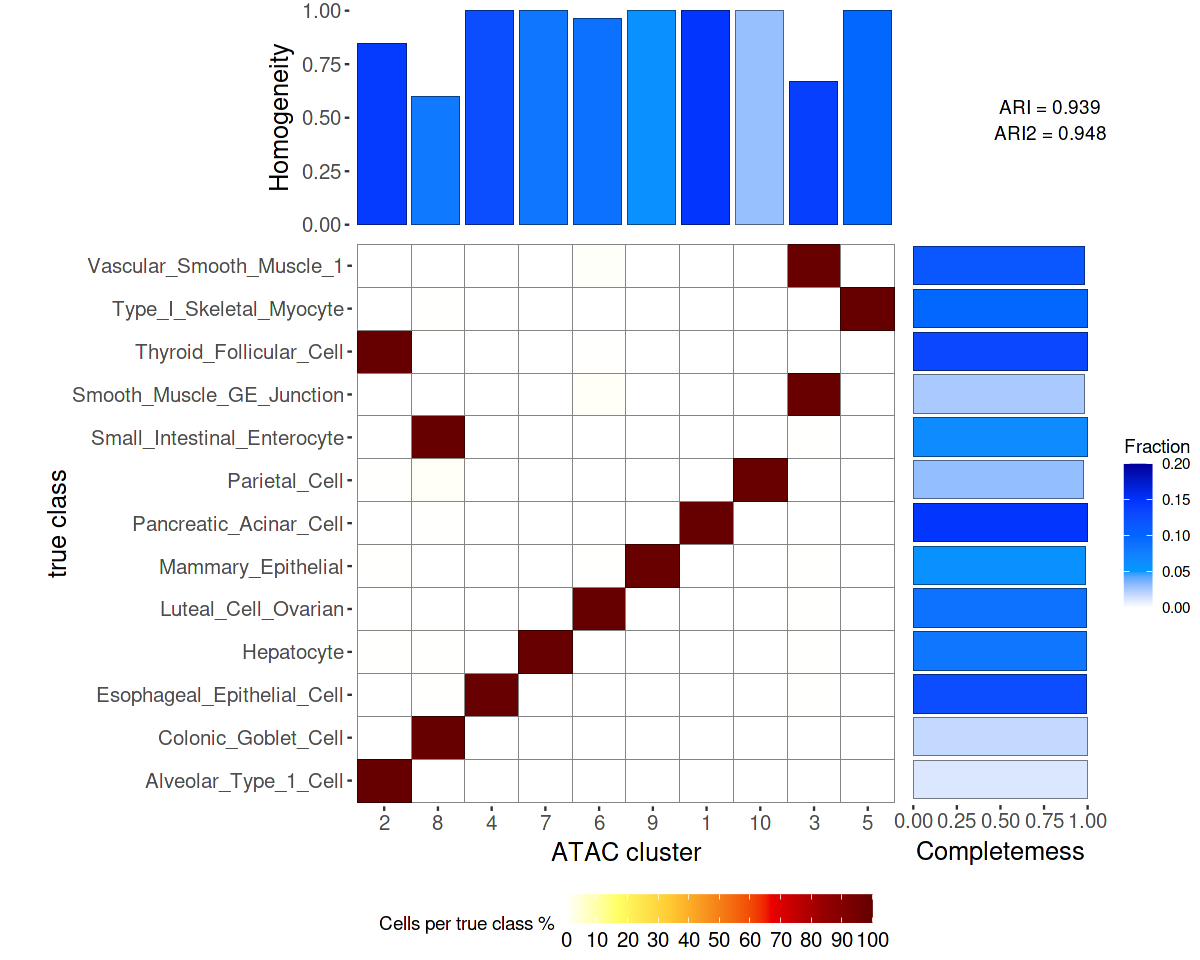

In [66]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

cross_table_plot(ground_truth, clusterings, a=1.3, b=5.7, c=2, m=0, n=0.2)

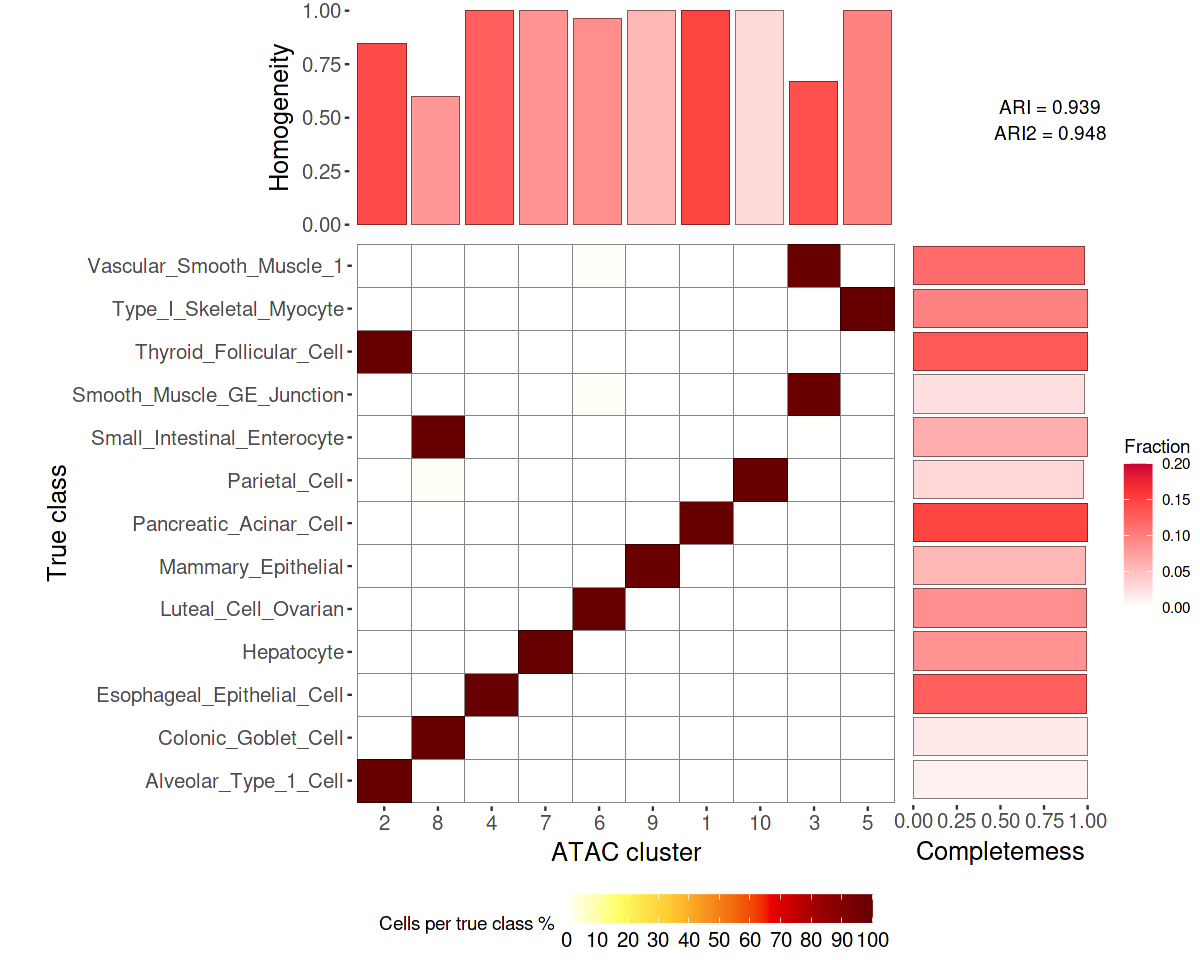

In [78]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.7, c=2, m=0, n=0.2)
p1

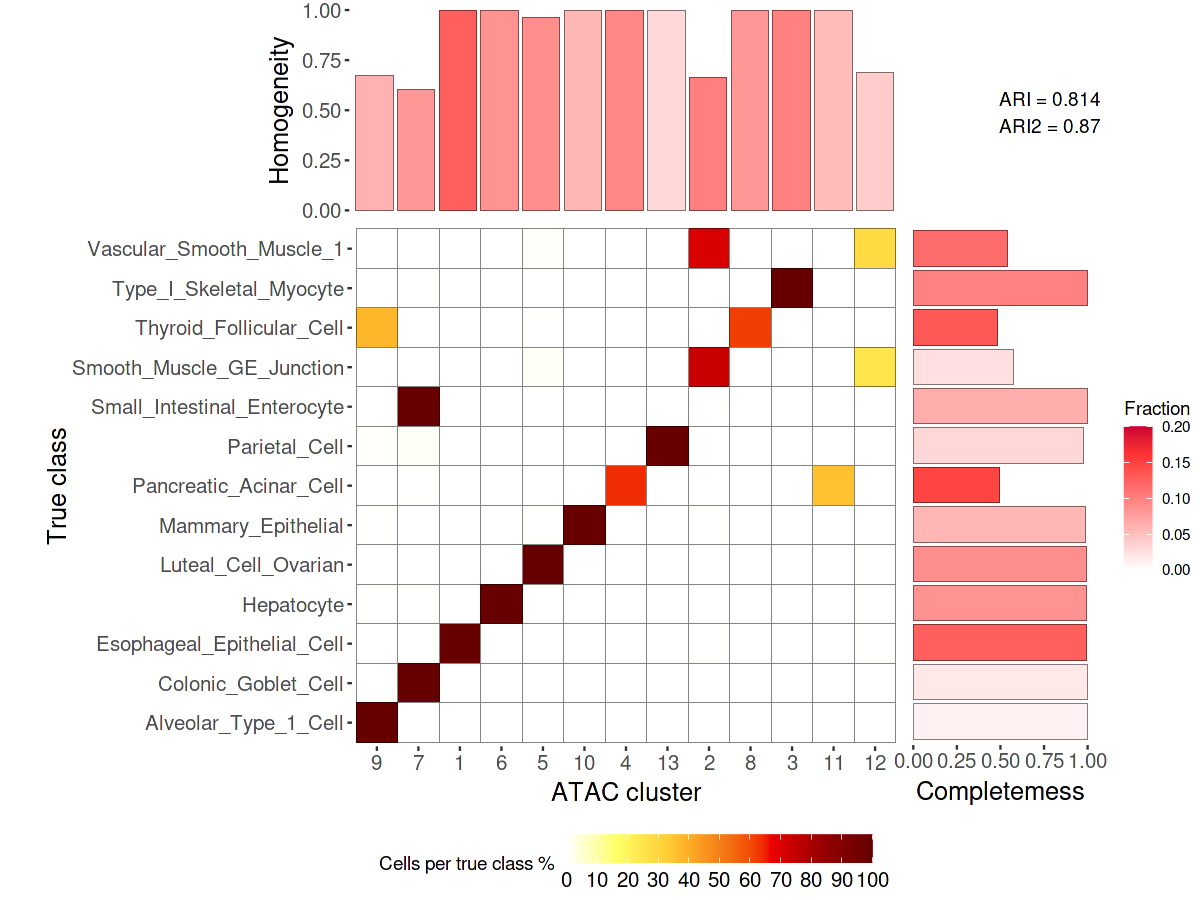

In [79]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=7.5)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.7, c=2, m=0, n=0.2)
p2

In [73]:
# SVG graphics device
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_ArchR_Atlas1_ndim15_crosstable_best.svg", width=10, height=8)

# Code of the plot
plot(p1)

# Close the graphics device
dev.off() 

png 
  2

In [80]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_ArchR_Atlas1_ndim15_crosstable_k.optimal.svg", width=10, height=7.5)
plot(p2)
dev.off() 

png 
  2

#### Signac

In [ ]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "Signac_by_cluster_peaks") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method long_method             feature_type    
1  10         ARI    0.9524732 Signac Signac_by_cluster_peaks by_cluster_peaks
2  11         ARI    0.9555852 Signac Signac_by_cluster_peaks by_cluster_peaks
3  12         ARI    0.9320496 Signac Signac_by_cluster_peaks by_cluster_peaks
4  13         ARI    0.8860260 Signac Signac_by_cluster_peaks by_cluster_peaks
5  16         ARI    0.8512176 Signac Signac_by_cluster_peaks by_cluster_peaks
6  20         ARI    0.6716671 Signac Signac_by_cluster_peaks by_cluster_peaks
7  28         ARI    0.5733243 Signac Signac_by_cluster_peaks by_cluster_peaks
8  18         ARI    0.8205317 Signac Signac_by_cluster_peaks by_cluster_peaks
9  21         ARI    0.6742353 Signac Signac_by_cluster_peaks by_cluster_peaks
10 26         ARI    0.6044327 Signac Signac_by_cluster_peaks by_cluster_peaks
11 29         ARI    0.5537944 Signac Signac_by_cluster_peaks by_cluster_peaks
   tile_size distance ndim resolution
1  0         default  15   0.05      
2  0         default  15   0.20      
3  0         default  15   0.25      
4  0         default  15   0.30      
5  0         default  15   0.35      
6  0         default  15   0.55      
7  0         default  15   0.90      
8  0         default  15   0.40      
9  0         default  15   0.60      
10 0         default  15   0.80      
11 0         default  15   1.00      
   rds_file                                                                       
1  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
2  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_evaluation.RDS 
3  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.25_evaluation.RDS
4  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.3_evaluation.RDS 
5  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.35_evaluation.RDS
6  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.55_evaluation.RDS
7  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.9_evaluation.RDS 
8  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.4_evaluation.RDS 
9  candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.6_evaluation.RDS 
10 candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.8_evaluation.RDS 
11 candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r1_evaluation.RDS   
   clustering_file                                                     
1  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
2  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.2.tsv 
3  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.25.tsv
4  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.3.tsv 
5  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.35.tsv
6  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.55.tsv
7  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.9.tsv 
8  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.4.tsv 
9  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.6.tsv 
10 candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.8.tsv 
11 candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r1.tsv   
   snn_file                                                               
1  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
2  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
3  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
4  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
5  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
6  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
7  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
8  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
9  candidate1/clustering/Signac/by_cluster_peaks/0/default/15/so

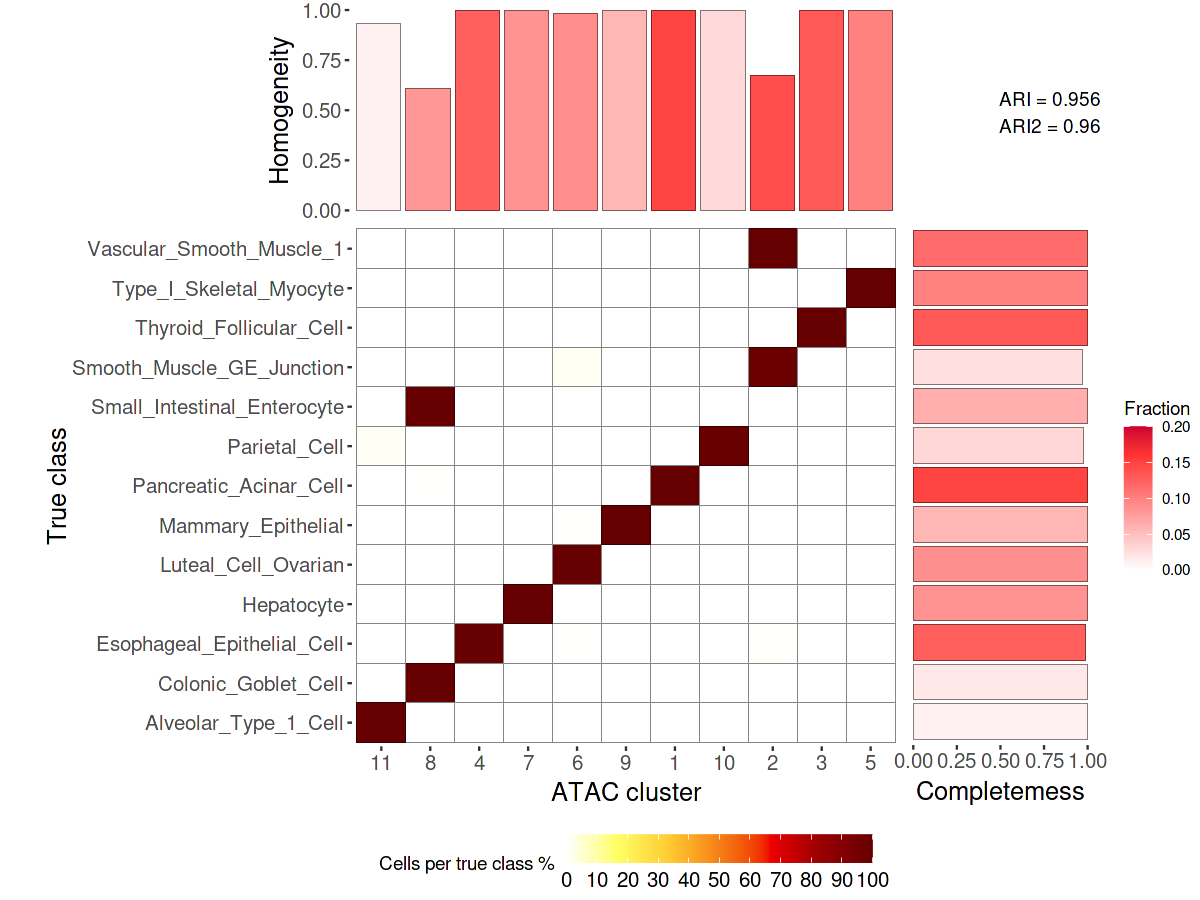

In [101]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=7.5)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p3 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.7, c=2, m=0, n=0.2)
p3

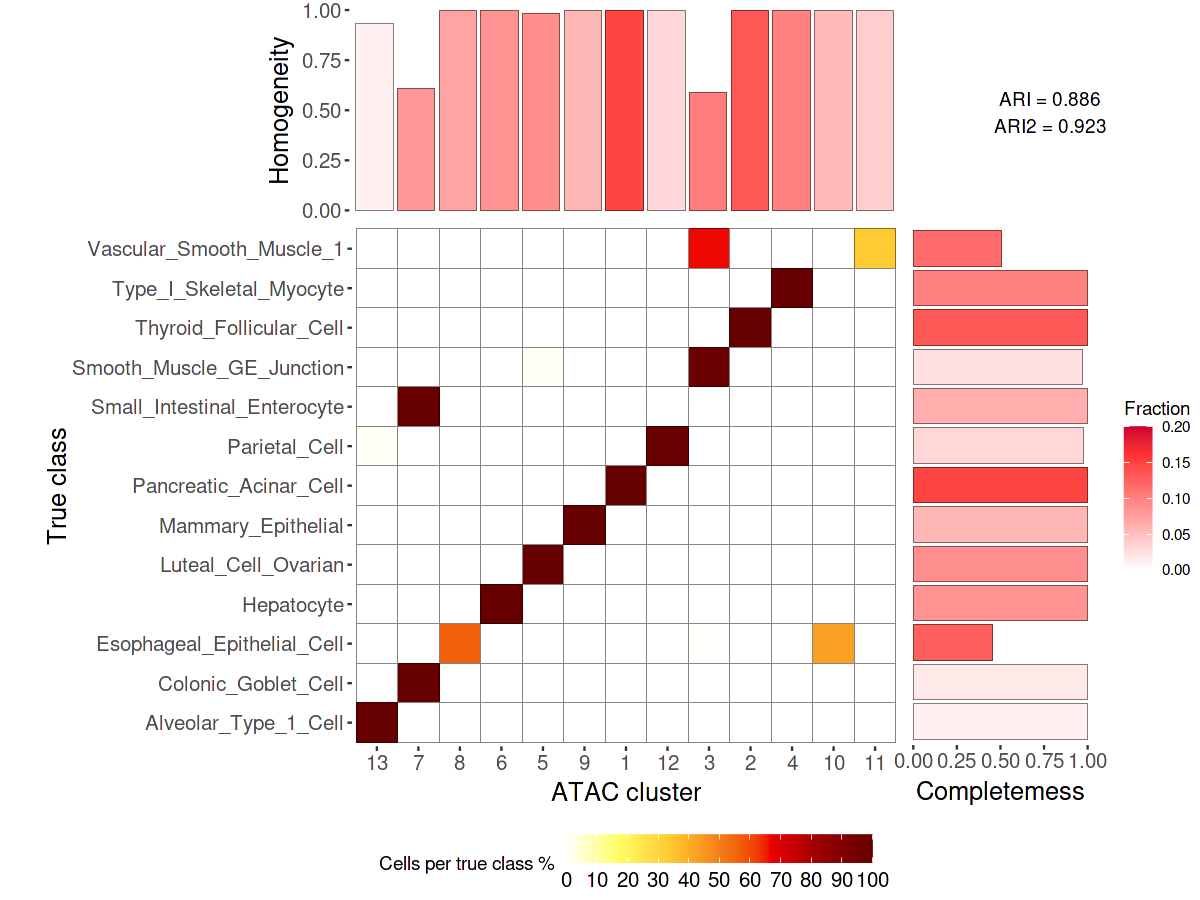

In [102]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=7.5)

i <- 4
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p4 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.7, c=2, m=0, n=0.2)
p4

In [104]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_Signac_Atlas1_ndim15_crosstable_best.svg", width=10, height=7.5)
plot(p3)
dev.off() 

svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_Signac_Atlas1_ndim15_crosstable_k.optimal.svg", width=10, height=7.5)
plot(p4)
dev.off() 

png 
  2

png 
  2

### Atlas2

In [12]:
j <- 3
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### SnapATAC2

In [14]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC2_jaccard") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method    long_method       feature_type
1 10         ARI    0.9970627 SnapATAC2 SnapATAC2_jaccard default     
2 11         ARI    0.9702873 SnapATAC2 SnapATAC2_jaccard default     
3 12         ARI    0.9180487 SnapATAC2 SnapATAC2_jaccard default     
4 13         ARI    0.8226798 SnapATAC2 SnapATAC2_jaccard default     
  tile_size distance ndim resolution
1 500       jaccard  15   0.05      
2 500       jaccard  15   0.25      
3 500       jaccard  15   0.35      
4 500       jaccard  15   0.40      
  rds_file                                                                   
1 candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.05_evaluation.RDS
2 candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.25_evaluation.RDS
3 candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.35_evaluation.RDS
4 candidate2/evaluation/SnapATAC2/default/500/jaccard/15/r0.4_evaluation.RDS 
  clustering_file                                                 
1 candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.05.tsv
2 candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.25.tsv
3 candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.35.tsv
4 candidate2/clustering/SnapATAC2/default/500/jaccard/15/r0.4.tsv 
  snn_file                                                           
1 candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
2 candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
3 candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
4 candidate2/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
  dataset                   k_optimal dataset2  
1 human adult atlas subset2 10        candidate2
2 human adult atlas subset2 10        candidate2
3 human adult atlas subset2 10        candidate2
4 human adult atlas subset2 10        candidate2

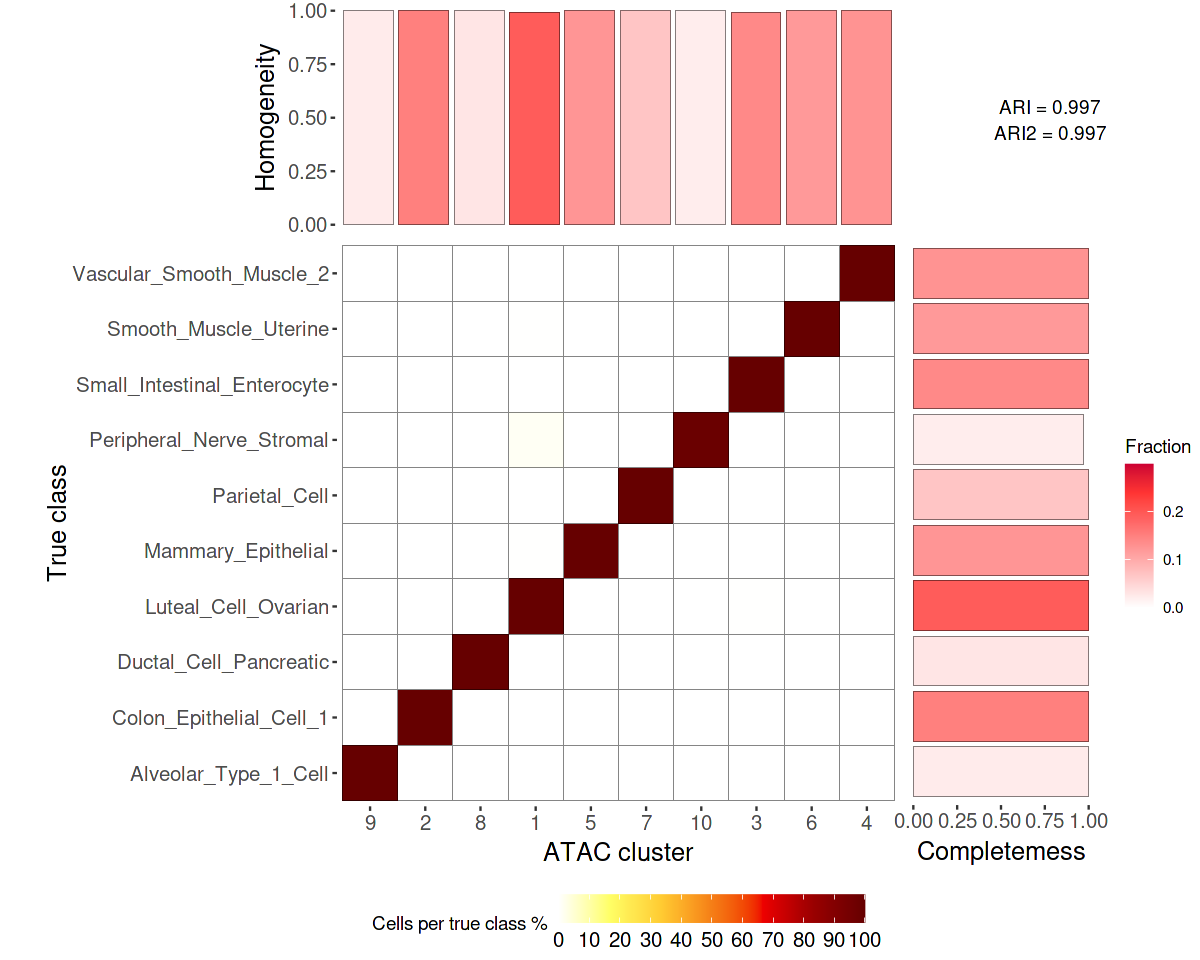

In [15]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.4, c=2, m=0, n=0.3)
p1

In [16]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_SnapATAC2_jaccard_Atlas2_ndim15_crosstable_best.svg", width=10, height=7.5)
plot(p1)
dev.off() 

png 
  2

#### ArchR

In [85]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "ArchR_tiles") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method long_method feature_type tile_size
1  7         ARI    0.7088466 ArchR  ArchR_tiles tiles        500      
2  8         ARI    0.7972060 ArchR  ArchR_tiles tiles        500      
3  9         ARI    0.9376304 ArchR  ArchR_tiles tiles        500      
4 10         ARI    0.8626431 ArchR  ArchR_tiles tiles        500      
5 12         ARI    0.7667946 ArchR  ArchR_tiles tiles        500      
6 11         ARI    0.7623701 ArchR  ArchR_tiles tiles        500      
7 14         ARI    0.6999160 ArchR  ArchR_tiles tiles        500      
8 13         ARI    0.7282432 ArchR  ArchR_tiles tiles        500      
  distance ndim resolution
1 default  15   0.050     
2 default  15   0.075     
3 default  15   0.175     
4 default  15   0.225     
5 default  15   0.275     
6 default  15   0.300     
7 default  15   0.325     
8 default  15   0.350     
  rds_file                                                              
1 candidate2/evaluation/ArchR/tiles/500/default/15/r0.05_evaluation.RDS 
2 candidate2/evaluation/ArchR/tiles/500/default/15/r0.075_evaluation.RDS
3 candidate2/evaluation/ArchR/tiles/500/default/15/r0.175_evaluation.RDS
4 candidate2/evaluation/ArchR/tiles/500/default/15/r0.225_evaluation.RDS
5 candidate2/evaluation/ArchR/tiles/500/default/15/r0.275_evaluation.RDS
6 candidate2/evaluation/ArchR/tiles/500/default/15/r0.3_evaluation.RDS  
7 candidate2/evaluation/ArchR/tiles/500/default/15/r0.325_evaluation.RDS
8 candidate2/evaluation/ArchR/tiles/500/default/15/r0.35_evaluation.RDS 
  clustering_file                                            
1 candidate2/clustering/ArchR/tiles/500/default/15/r0.05.tsv 
2 candidate2/clustering/ArchR/tiles/500/default/15/r0.075.tsv
3 candidate2/clustering/ArchR/tiles/500/default/15/r0.175.tsv
4 candidate2/clustering/ArchR/tiles/500/default/15/r0.225.tsv
5 candidate2/clustering/ArchR/tiles/500/default/15/r0.275.tsv
6 candidate2/clustering/ArchR/tiles/500/default/15/r0.3.tsv  
7 candidate2/clustering/ArchR/tiles/500/default/15/r0.325.tsv
8 candidate2/clustering/ArchR/tiles/500/default/15/r0.35.tsv 
  snn_file                                                     
1 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
2 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
3 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
4 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
5 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
6 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
7 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
8 candidate2/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
  dataset                   k_optimal dataset2  
1 human adult atlas subset2 10        candidate2
2 human adult atlas subset2 10        candidate2
3 human adult atlas subset2 10        candidate2
4 human adult atlas subset2 10        candidate2
5 human adult atlas subset2 10        candidate2
6 human adult atlas subset2 10        candidate2
7 human adult atlas subset2 10        candidate2
8 human adult atlas subset2 10        candidate2

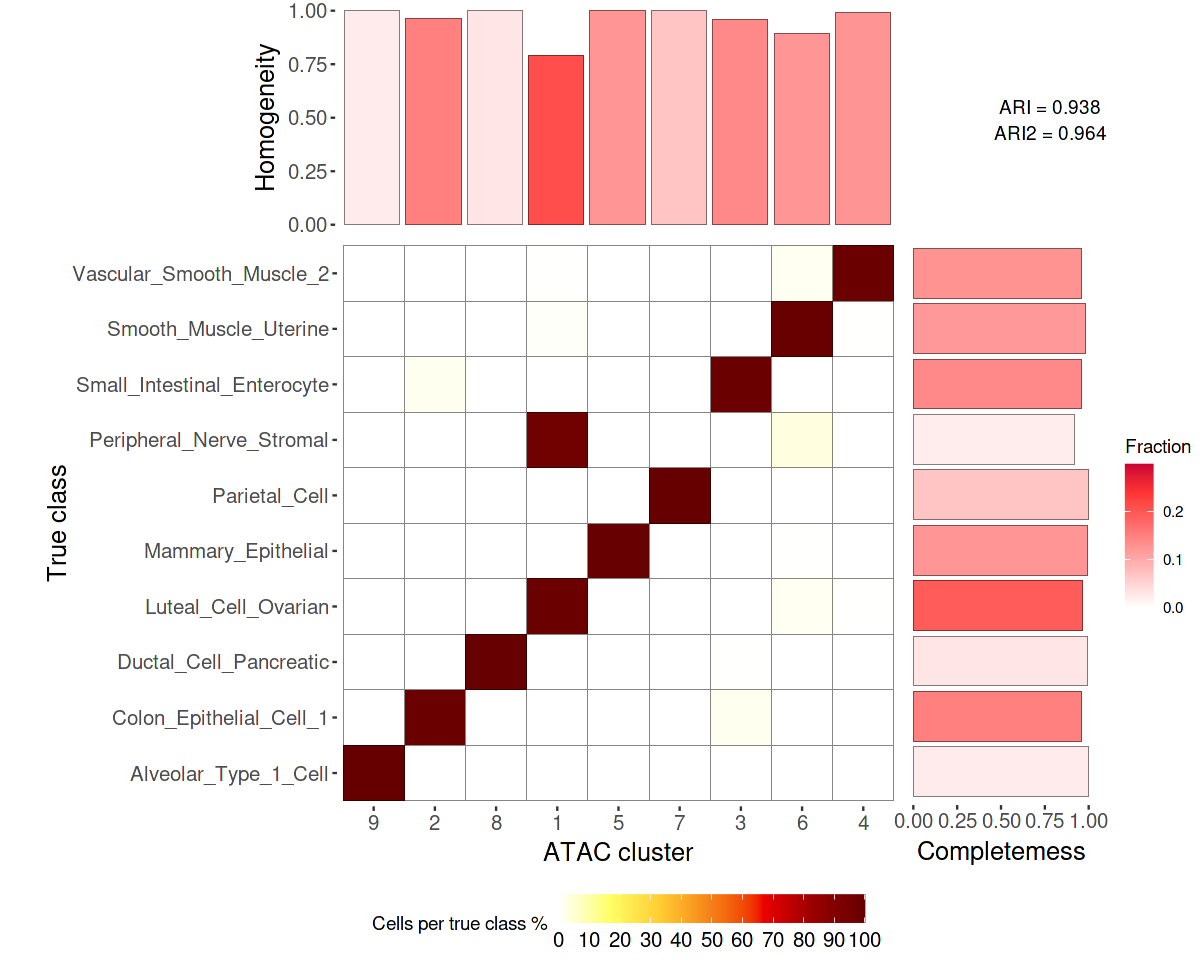

In [91]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.4, c=2, m=0, n=0.3)
p1

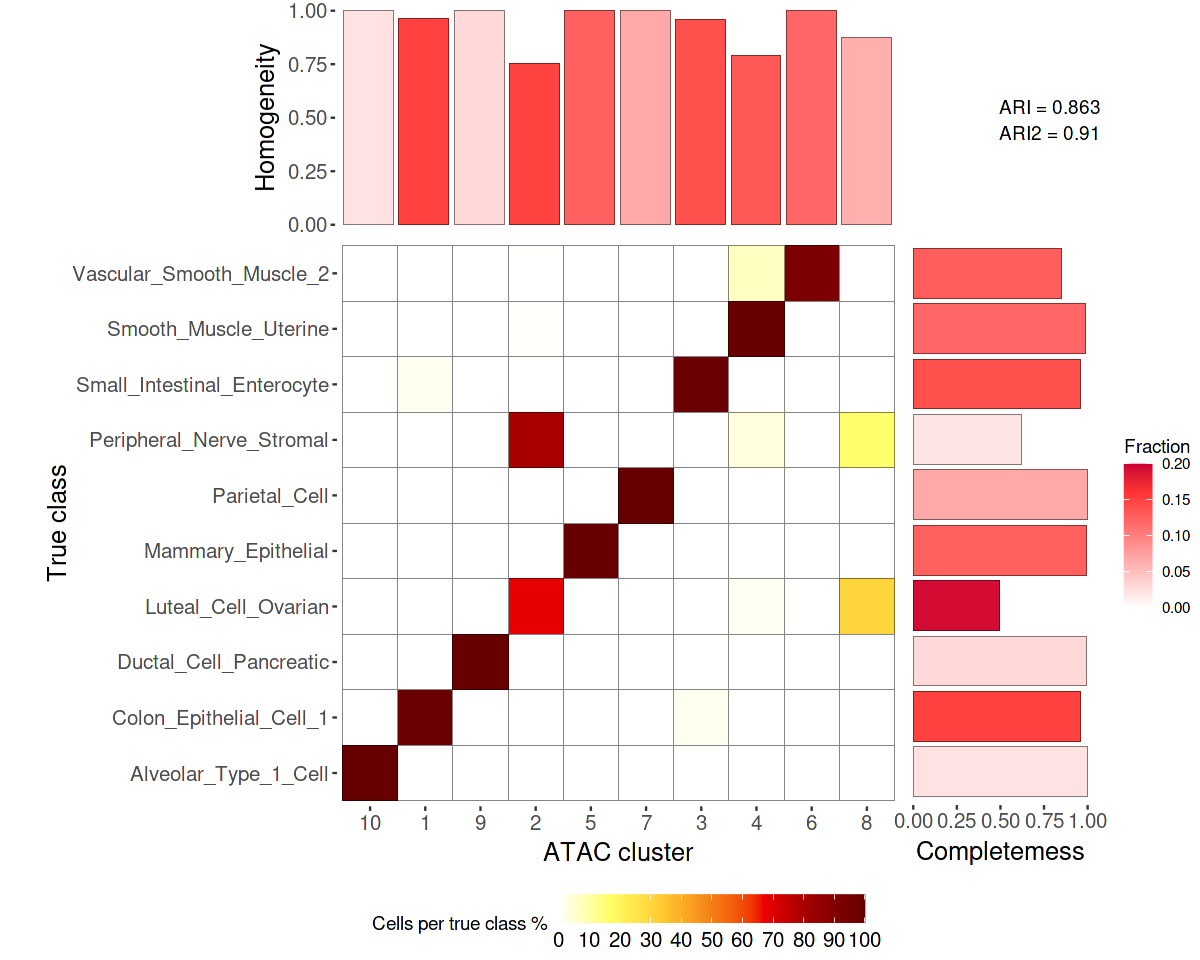

In [92]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 4
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=5.4, c=2, m=0, n=0.2)
p2

In [93]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_ArchR_Atlas2_ndim15_crosstable_best.svg", width=10, height=7.5)
plot(p1)
dev.off() 

svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_ArchR_Atlas2_ndim15_crosstable_k.optimal.svg", width=10, height=7.5)
plot(p2)
dev.off() 

png 
  2

png 
  2

### Cell line

In [363]:
j <- 1
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### SnapATAC1

In [118]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC1") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method    long_method feature_type tile_size
1 10         ARI    0.9899449 SnapATAC1 SnapATAC1   default      5000     
2 11         ARI    0.9244996 SnapATAC1 SnapATAC1   default      5000     
3 12         ARI    0.8843780 SnapATAC1 SnapATAC1   default      5000     
  distance ndim resolution
1 default  15   0.15      
2 default  15   0.25      
3 default  15   0.40      
  rds_file                                                                          
1 Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.15_evaluation.RDS
2 Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.25_evaluation.RDS
3 Cell_line_mixing/evaluation/SnapATAC1/default/5000/default/15/r0.4_evaluation.RDS 
  clustering_file                                                        
1 Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/r0.15.tsv
2 Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/r0.25.tsv
3 Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/r0.4.tsv 
  snn_file                                                                  
1 Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS
2 Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS
3 Cell_line_mixing/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS
  dataset                     k_optimal dataset2        
1 Cell line mixing experiment 10        Cell_line_mixing
2 Cell line mixing experiment 10        Cell_line_mixing
3 Cell line mixing experiment 10        Cell_line_mixing

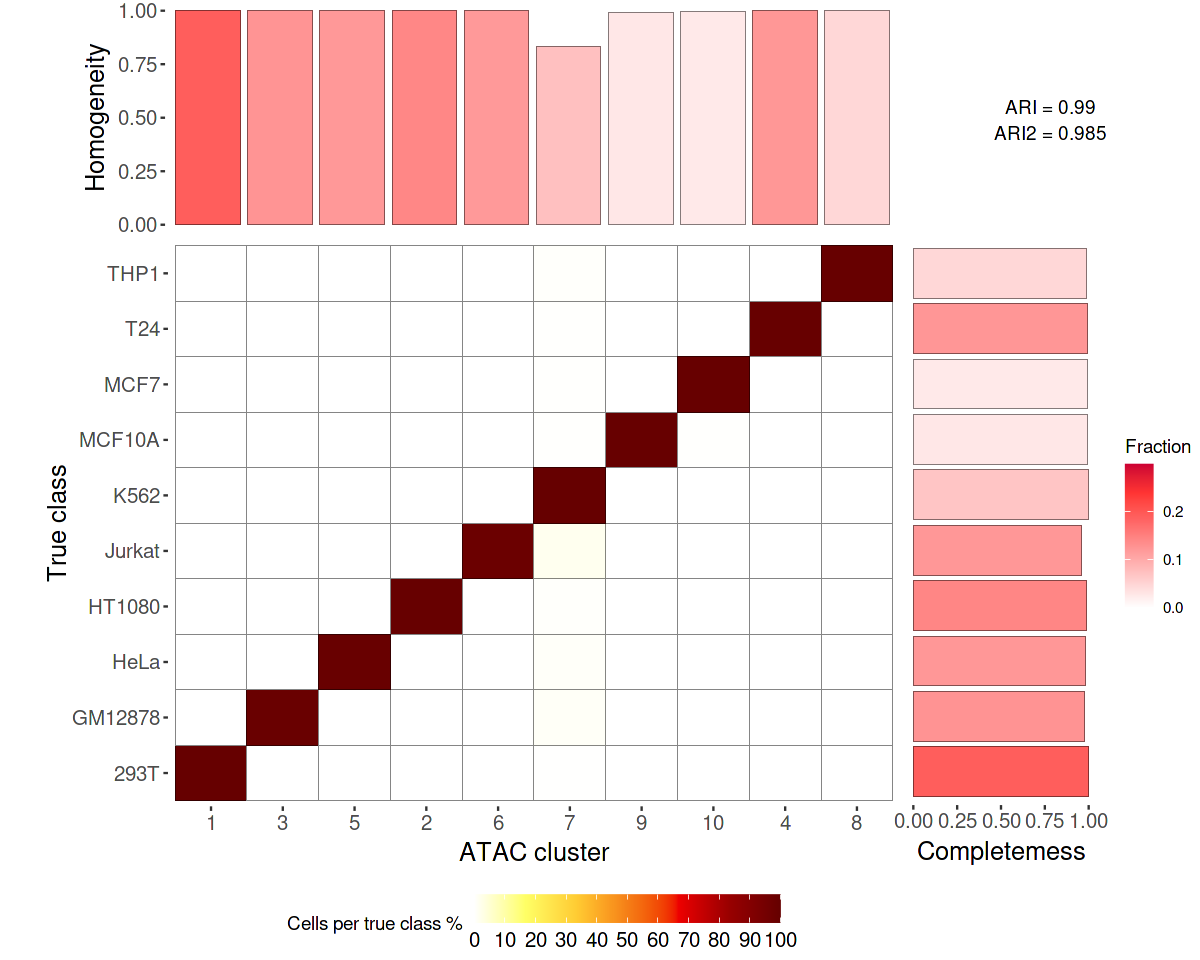

In [119]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=1.8, c=2, m=0, n=0.3)
p1

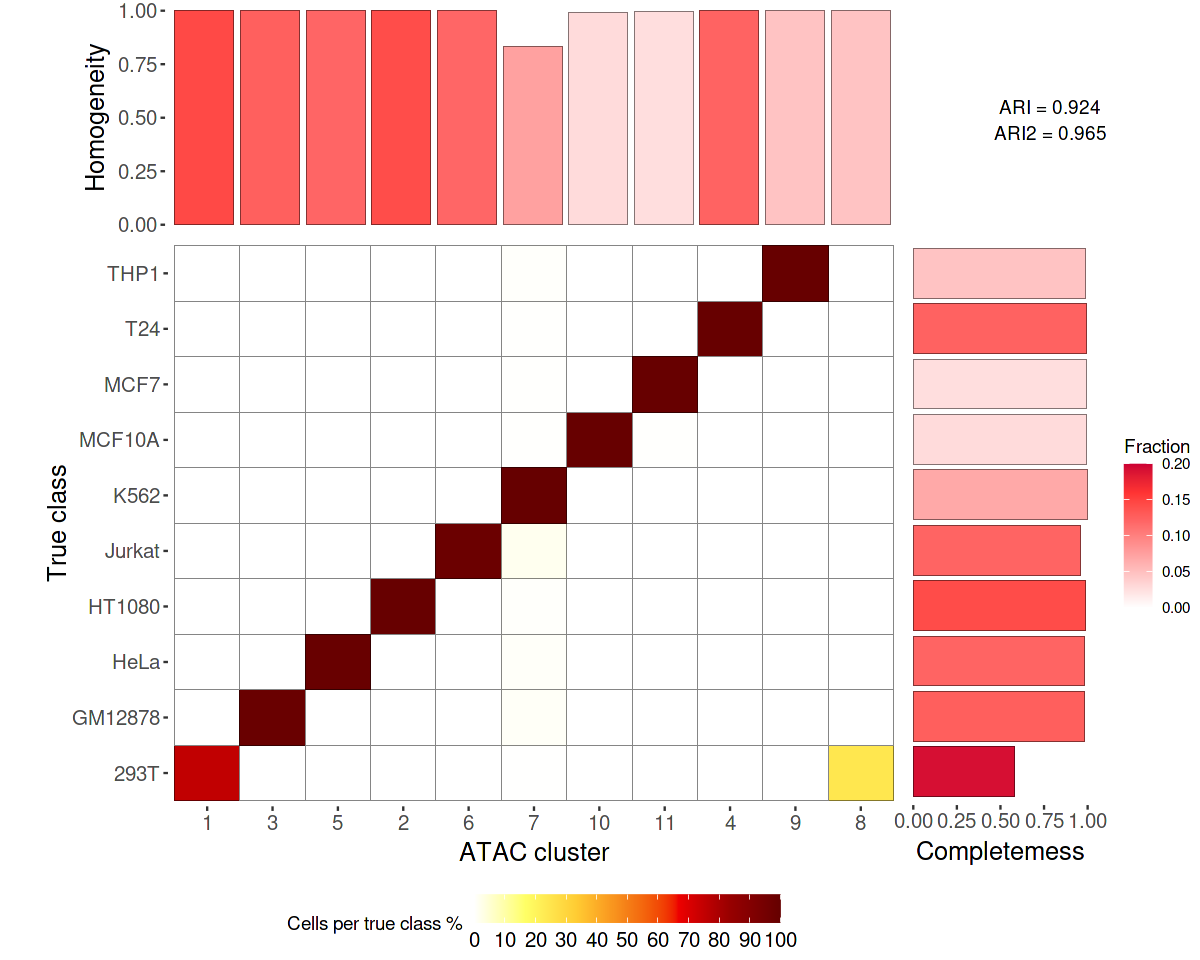

In [120]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=1.8, c=2, m=0, n=0.2)
p2

In [121]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_SnapATAC1_cellline_ndim15_crosstable_best.svg", width=10, height=8)
plot(p1)
dev.off() 

svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_SnapATAC1_cellline_ndim15_crosstable_k.optimal.svg", width=10, height=8)
plot(p2)
dev.off() 

png 
  2

png 
  2

#### SnapATAC2

In [370]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC2_jaccard") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method    long_method       feature_type
1 10         ARI    0.9944054 SnapATAC2 SnapATAC2_jaccard default     
2 11         ARI    0.9566631 SnapATAC2 SnapATAC2_jaccard default     
  tile_size distance ndim resolution
1 500       jaccard  15   0.10      
2 500       jaccard  15   0.25      
  rds_file                                                                         
1 Cell_line_mixing/evaluation/SnapATAC2/default/500/jaccard/15/r0.1_evaluation.RDS 
2 Cell_line_mixing/evaluation/SnapATAC2/default/500/jaccard/15/r0.25_evaluation.RDS
  clustering_file                                                       
1 Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/r0.1.tsv 
2 Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/r0.25.tsv
  snn_file                                                                 
1 Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
2 Cell_line_mixing/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
  dataset                     k_optimal dataset2        
1 Cell line mixing experiment 10        Cell_line_mixing
2 Cell line mixing experiment 10        Cell_line_mixing

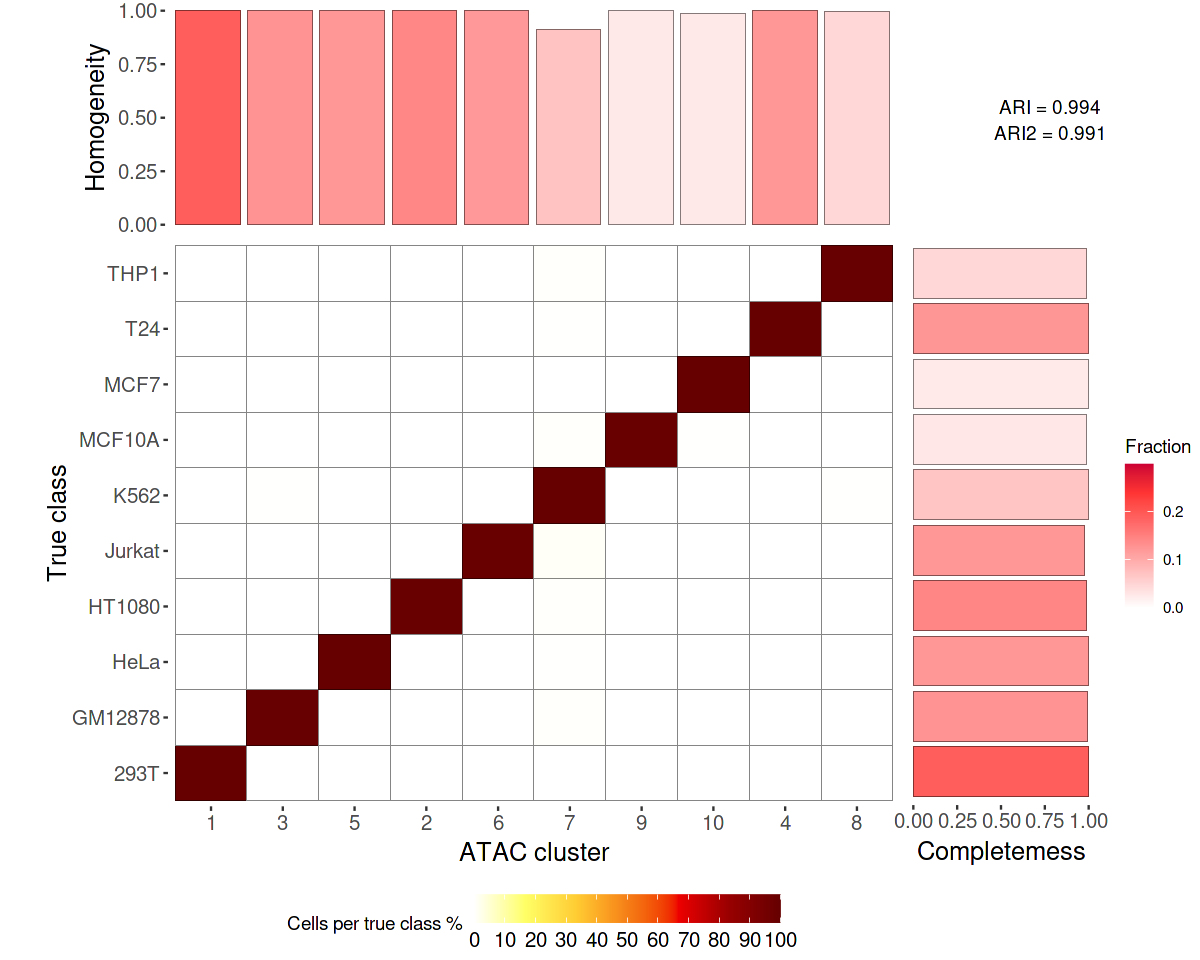

In [371]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=1.8, c=2, m=0, n=0.3)
p1

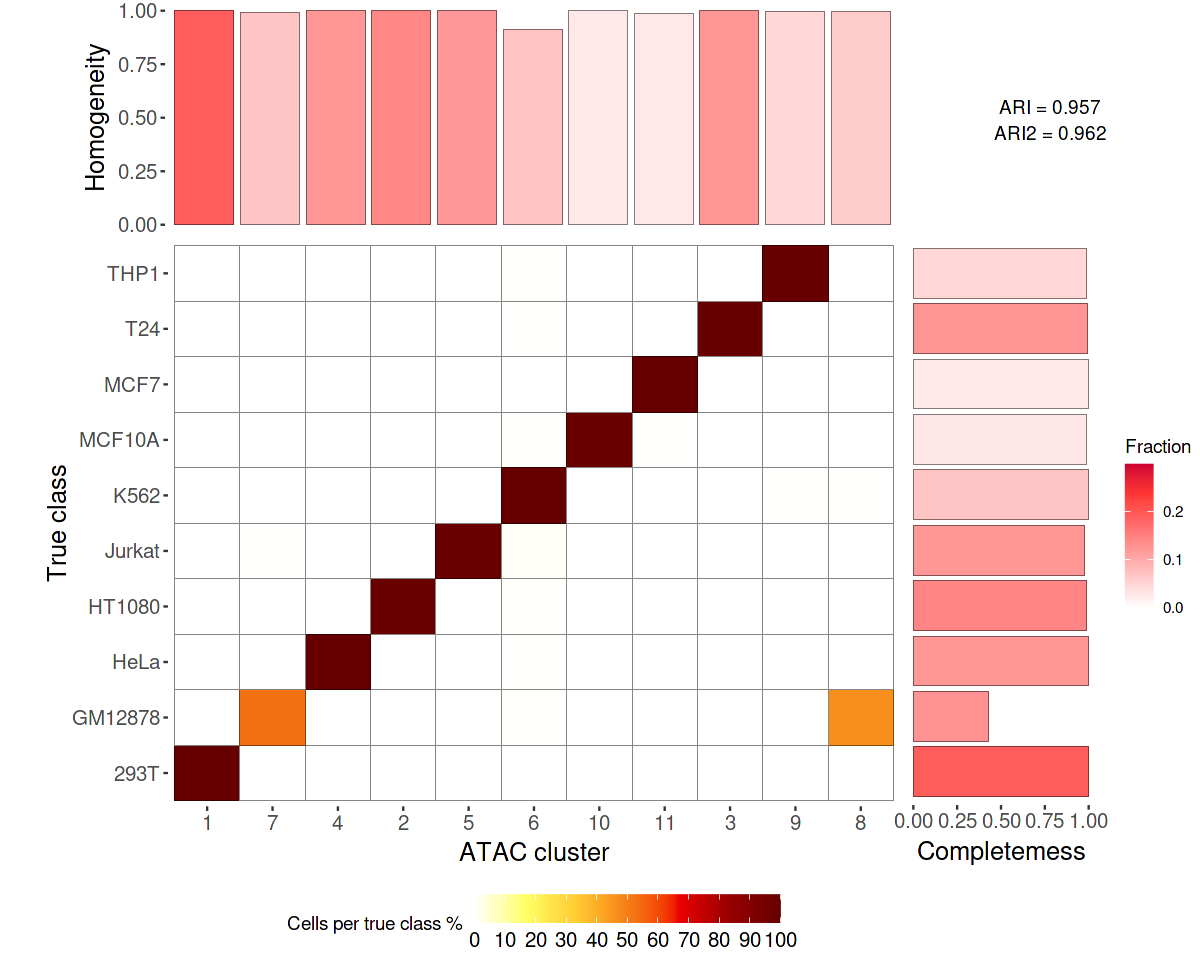

In [372]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=1.8, c=2, m=0, n=0.3)
p2

In [373]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_SnapATAC2_jaccard_cellline_ndim15_crosstable_best.svg", width=10, height=8)
plot(p1)
dev.off() 

png 
  2

In [374]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_SnapATAC2_jaccard_cellline_ndim15_crosstable.svg", width=10, height=8)
plot(p2)
dev.off() 

png 
  2

#### Signac

In [375]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "Signac_by_cluster_peaks") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method long_method             feature_type    
1 10         ARI    0.9661907 Signac Signac_by_cluster_peaks by_cluster_peaks
2 11         ARI    0.9708071 Signac Signac_by_cluster_peaks by_cluster_peaks
3 12         ARI    0.9613427 Signac Signac_by_cluster_peaks by_cluster_peaks
4 13         ARI    0.9499381 Signac Signac_by_cluster_peaks by_cluster_peaks
  tile_size distance ndim resolution
1 0         default  15   0.05      
2 0         default  15   0.10      
3 0         default  15   0.20      
4 0         default  15   0.35      
  rds_file                                                                             
1 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS
2 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.1_evaluation.RDS 
3 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.2_evaluation.RDS 
4 Cell_line_mixing/evaluation/Signac/by_cluster_peaks/0/default/15/r0.35_evaluation.RDS
  clustering_file                                                           
1 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv
2 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.1.tsv 
3 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.2.tsv 
4 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/r0.35.tsv
  snn_file                                                                     
1 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
2 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
3 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
4 Cell_line_mixing/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
  dataset                     k_optimal dataset2        
1 Cell line mixing experiment 10        Cell_line_mixing
2 Cell line mixing experiment 10        Cell_line_mixing
3 Cell line mixing experiment 10        Cell_line_mixing
4 Cell line mixing experiment 10        Cell_line_mixing

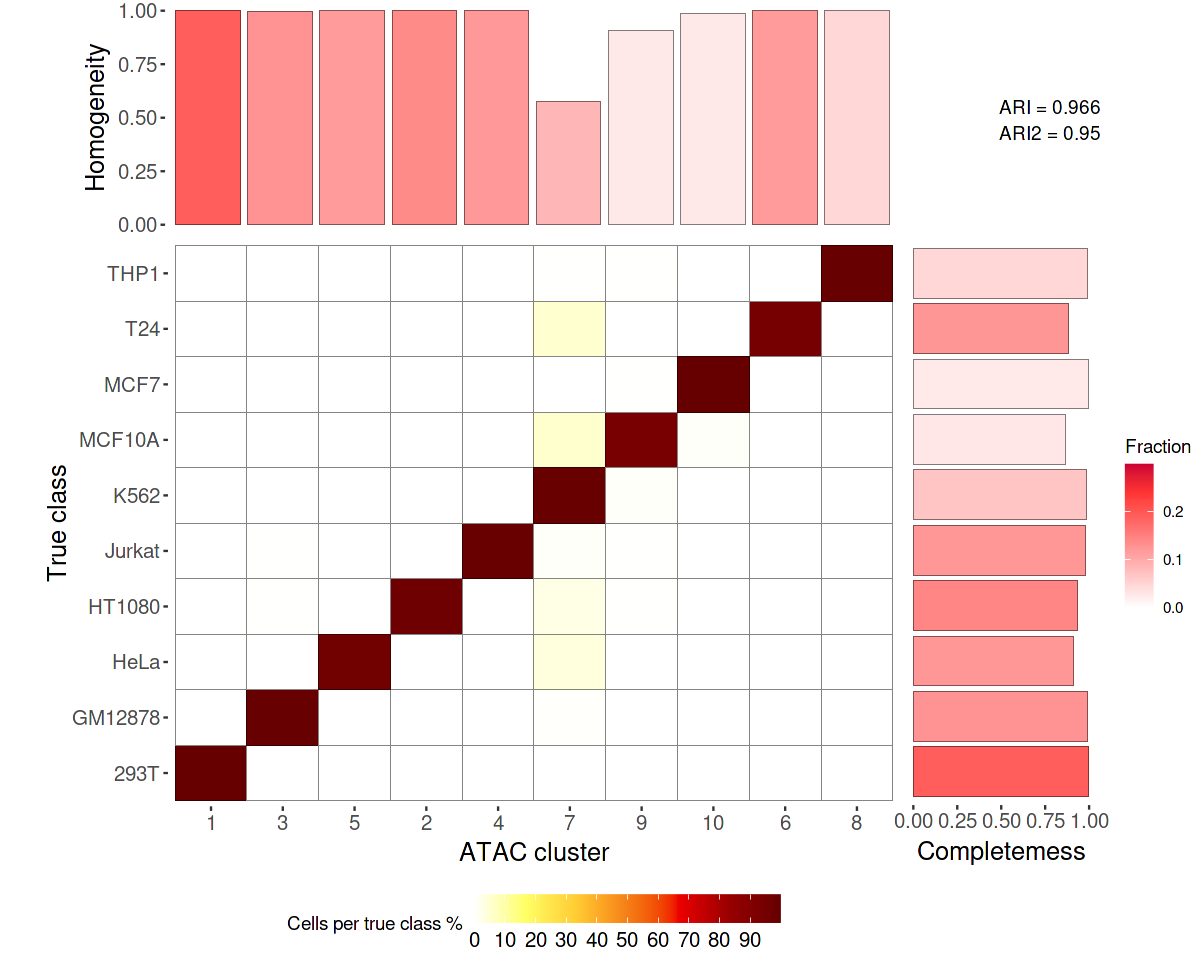

In [376]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 1
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=1.8, c=2, m=0, n=0.3)
p1

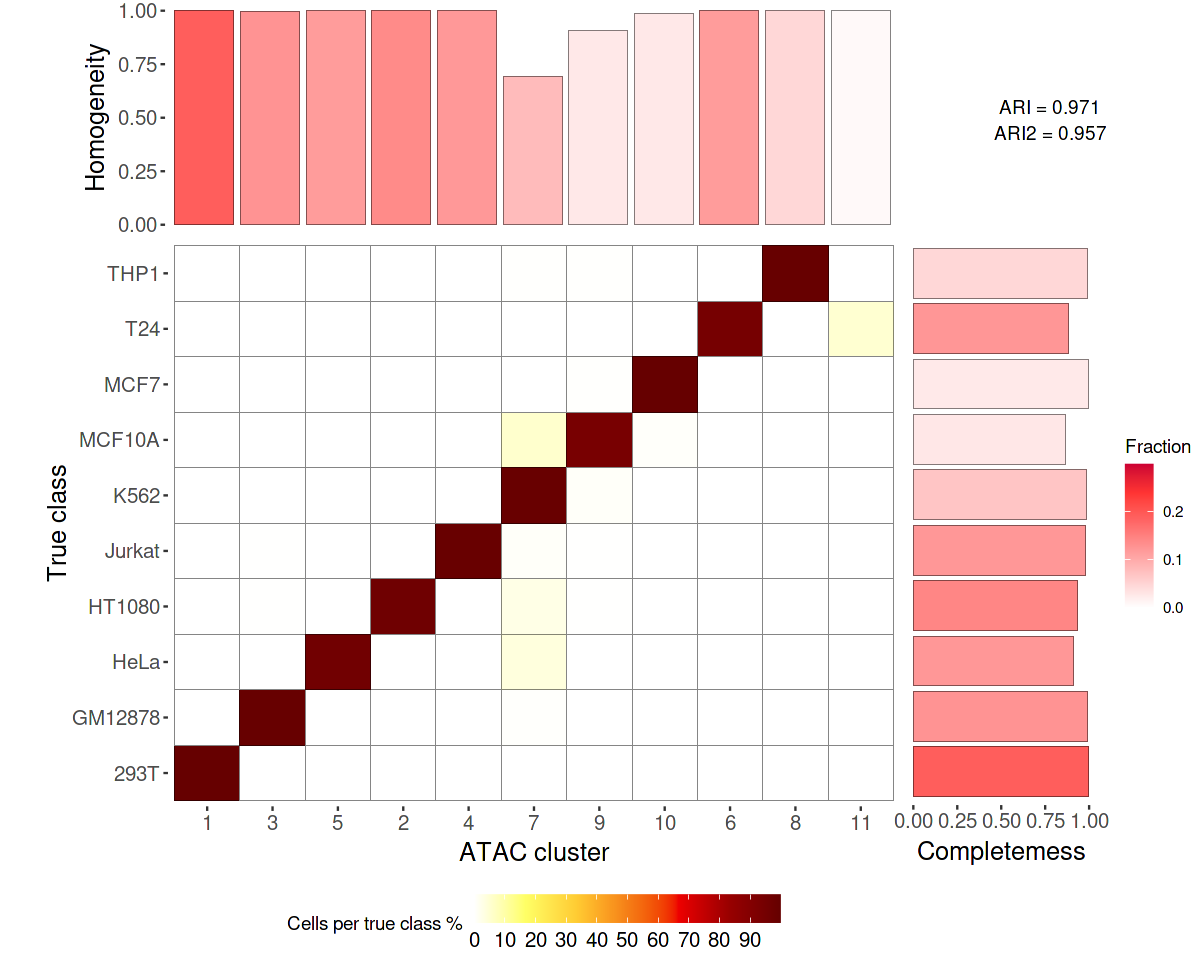

In [377]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=1.8, c=2, m=0, n=0.3)
p2

In [378]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_Signac_by_cluster_cellline_ndim15.svg", width=10, height=8)
plot(p1)
dev.off() 
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_Signac_by_cluster_cellline_ndim15.2.svg", width=10, height=8)
plot(p2)
dev.off() 

png 
  2

png 
  2

## Difficult task

### Chen_2019

In [130]:
j <- 5
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### SnapATAC1

In [131]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC1") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method    long_method feature_type tile_size
1 5          ARI    0.5400488 SnapATAC1 SnapATAC1   default      5000     
2 6          ARI    0.6875588 SnapATAC1 SnapATAC1   default      5000     
3 7          ARI    0.6930372 SnapATAC1 SnapATAC1   default      5000     
4 8          ARI    0.7461826 SnapATAC1 SnapATAC1   default      5000     
5 9          ARI    0.6517272 SnapATAC1 SnapATAC1   default      5000     
  distance ndim resolution
1 default  15   0.175     
2 default  15   0.200     
3 default  15   0.250     
4 default  15   0.450     
5 default  15   0.650     
  rds_file                                                                    
1 Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.175_evaluation.RDS
2 Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.2_evaluation.RDS  
3 Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.25_evaluation.RDS 
4 Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.45_evaluation.RDS 
5 Chen_2019/evaluation/SnapATAC1/default/5000/default/15/r0.65_evaluation.RDS 
  clustering_file                                                  
1 Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.175.tsv
2 Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.2.tsv  
3 Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.25.tsv 
4 Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.45.tsv 
5 Chen_2019/clustering/SnapATAC1/default/5000/default/15/r0.65.tsv 
  snn_file                                                            dataset 
1 Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS Chen2019
2 Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS Chen2019
3 Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS Chen2019
4 Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS Chen2019
5 Chen_2019/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS Chen2019
  k_optimal dataset2 
1 13        Chen_2019
2 13        Chen_2019
3 13        Chen_2019
4 13        Chen_2019
5 13        Chen_2019

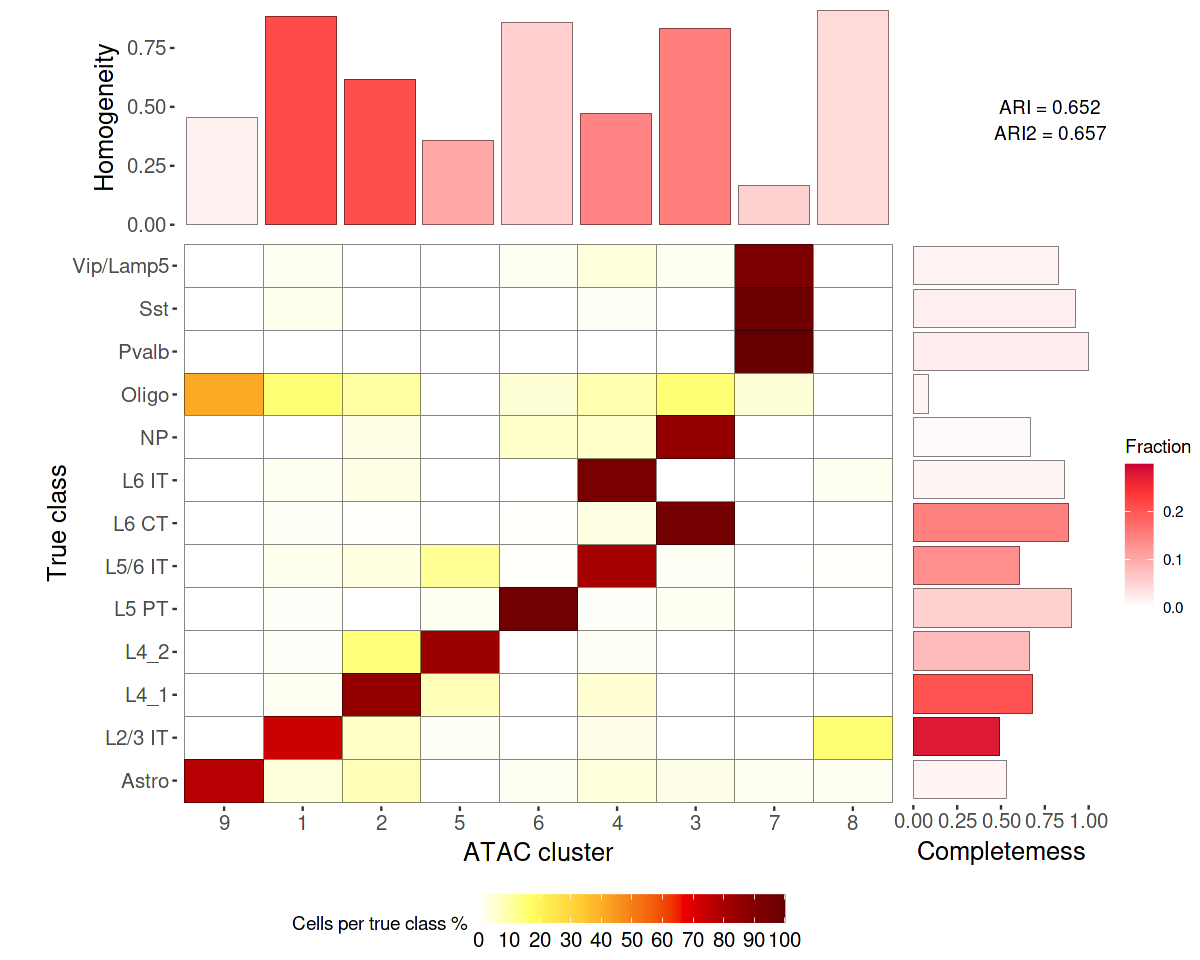

In [134]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 5
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2, c=2, m=0, n=0.3)
p1

In [135]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method      long_method feature_type tile_size
1   7         ARI    0.5646719 aggregation aggregation default      500      
2   9         ARI    0.6916607 aggregation aggregation default      500      
3  10         ARI    0.7169810 aggregation aggregation default      500      
4  11         ARI    0.6725396 aggregation aggregation default      500      
5  12         ARI    0.6089329 aggregation aggregation default      500      
6  15         ARI    0.5704210 aggregation aggregation default      500      
7  16         ARI    0.5662501 aggregation aggregation default      500      
8  18         ARI    0.4559030 aggregation aggregation default      500      
9  20         ARI    0.4536188 aggregation aggregation default      500      
10 21         ARI    0.4270672 aggregation aggregation default      500      
11 23         ARI    0.4121177 aggregation aggregation default      500      
12  4         ARI    0.1103286 aggregation aggregation default      500      
13  5         ARI    0.2517124 aggregation aggregation default      500      
14  6         ARI    0.2986907 aggregation aggregation default      500      
   distance ndim resolution
1  default  15   0.075     
2  default  15   0.100     
3  default  15   0.125     
4  default  15   0.250     
5  default  15   0.350     
6  default  15   0.400     
7  default  15   0.450     
8  default  15   0.550     
9  default  15   0.600     
10 default  15   0.750     
11 default  15   0.850     
12 default  15   0.010     
13 default  15   0.020     
14 default  15   0.040     
   rds_file                                                                     
1  Chen_2019/evaluation/aggregation/default/500/default/15/r0.075_evaluation.RDS
2  Chen_2019/evaluation/aggregation/default/500/default/15/r0.1_evaluation.RDS  
3  Chen_2019/evaluation/aggregation/default/500/default/15/r0.125_evaluation.RDS
4  Chen_2019/evaluation/aggregation/default/500/default/15/r0.25_evaluation.RDS 
5  Chen_2019/evaluation/aggregation/default/500/default/15/r0.35_evaluation.RDS 
6  Chen_2019/evaluation/aggregation/default/500/default/15/r0.4_evaluation.RDS  
7  Chen_2019/evaluation/aggregation/default/500/default/15/r0.45_evaluation.RDS 
8  Chen_2019/evaluation/aggregation/default/500/default/15/r0.55_evaluation.RDS 
9  Chen_2019/evaluation/aggregation/default/500/default/15/r0.6_evaluation.RDS  
10 Chen_2019/evaluation/aggregation/default/500/default/15/r0.75_evaluation.RDS 
11 Chen_2019/evaluation/aggregation/default/500/default/15/r0.85_evaluation.RDS 
12 Chen_2019/evaluation/aggregation/default/500/default/15/r0.01_evaluation.RDS 
13 Chen_2019/evaluation/aggregation/default/500/default/15/r0.02_evaluation.RDS 
14 Chen_2019/evaluation/aggregation/default/500/default/15/r0.04_evaluation.RDS 
   clustering_file                                                   
1  Chen_2019/clustering/aggregation/default/500/default/15/r0.075.tsv
2  Chen_2019/clustering/aggregation/default/500/default/15/r0.1.tsv  
3  Chen_2019/clustering/aggregation/default/500/default/15/r0.125.tsv
4  Chen_2019/clustering/aggregation/default/500/default/15/r0.25.tsv 
5  Chen_2019/clustering/aggregation/default/500/default/15/r0.35.tsv 
6  Chen_2019/clustering/aggregation/default/500/default/15/r0.4.tsv  
7  Chen_2019/clustering/aggregation/default/500/default/15/r0.45.tsv 
8  Chen_2019/clustering/aggregation/default/500/default/15/r0.55.tsv 
9  Chen_2019/clustering/aggregation/default/500/default/15/r0.6.tsv  
10 Chen_2019/clustering/aggregation/default/500/default/15/r0.75.tsv 
11 Chen_2019/clustering/aggregation/default/500/default/15/r0.85.tsv 
12 Chen_2019/clustering/aggregation/default/500/default/15/r0.01.tsv 
13 Chen_2019/clustering/aggregation/default/500/default/15/r0.02.tsv 
14 Chen_2019/clustering/aggregation/default/500/default/15/r0.04.tsv 
   snn_file                                                            
1  Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
2  C

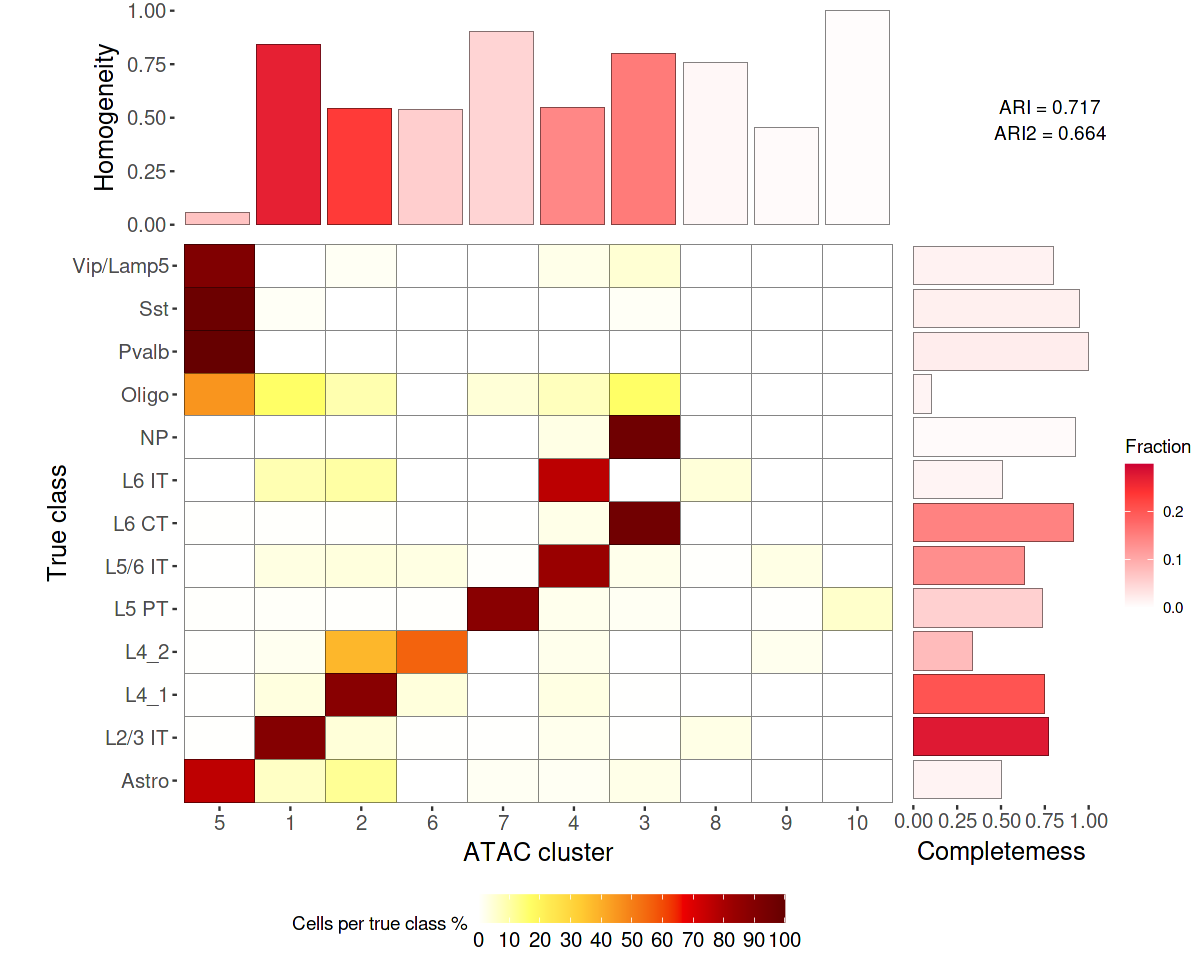

In [137]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2, c=2, m=0, n=0.3)
p2

In [138]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_SnapATAC1_Chen2019_ndim15_crosstable.svg", width=10, height=8)
plot(p1)
dev.off() 

svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_aggregation_Chen2019_ndim15_crosstable.svg", width=10, height=8)
plot(p2)
dev.off() 

png 
  2

png 
  2

#### Aggregation

In [139]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method      long_method feature_type tile_size
1   7         ARI    0.5646719 aggregation aggregation default      500      
2   9         ARI    0.6916607 aggregation aggregation default      500      
3  10         ARI    0.7169810 aggregation aggregation default      500      
4  11         ARI    0.6725396 aggregation aggregation default      500      
5  12         ARI    0.6089329 aggregation aggregation default      500      
6  15         ARI    0.5704210 aggregation aggregation default      500      
7  16         ARI    0.5662501 aggregation aggregation default      500      
8  18         ARI    0.4559030 aggregation aggregation default      500      
9  20         ARI    0.4536188 aggregation aggregation default      500      
10 21         ARI    0.4270672 aggregation aggregation default      500      
11 23         ARI    0.4121177 aggregation aggregation default      500      
12  4         ARI    0.1103286 aggregation aggregation default      500      
13  5         ARI    0.2517124 aggregation aggregation default      500      
14  6         ARI    0.2986907 aggregation aggregation default      500      
   distance ndim resolution
1  default  15   0.075     
2  default  15   0.100     
3  default  15   0.125     
4  default  15   0.250     
5  default  15   0.350     
6  default  15   0.400     
7  default  15   0.450     
8  default  15   0.550     
9  default  15   0.600     
10 default  15   0.750     
11 default  15   0.850     
12 default  15   0.010     
13 default  15   0.020     
14 default  15   0.040     
   rds_file                                                                     
1  Chen_2019/evaluation/aggregation/default/500/default/15/r0.075_evaluation.RDS
2  Chen_2019/evaluation/aggregation/default/500/default/15/r0.1_evaluation.RDS  
3  Chen_2019/evaluation/aggregation/default/500/default/15/r0.125_evaluation.RDS
4  Chen_2019/evaluation/aggregation/default/500/default/15/r0.25_evaluation.RDS 
5  Chen_2019/evaluation/aggregation/default/500/default/15/r0.35_evaluation.RDS 
6  Chen_2019/evaluation/aggregation/default/500/default/15/r0.4_evaluation.RDS  
7  Chen_2019/evaluation/aggregation/default/500/default/15/r0.45_evaluation.RDS 
8  Chen_2019/evaluation/aggregation/default/500/default/15/r0.55_evaluation.RDS 
9  Chen_2019/evaluation/aggregation/default/500/default/15/r0.6_evaluation.RDS  
10 Chen_2019/evaluation/aggregation/default/500/default/15/r0.75_evaluation.RDS 
11 Chen_2019/evaluation/aggregation/default/500/default/15/r0.85_evaluation.RDS 
12 Chen_2019/evaluation/aggregation/default/500/default/15/r0.01_evaluation.RDS 
13 Chen_2019/evaluation/aggregation/default/500/default/15/r0.02_evaluation.RDS 
14 Chen_2019/evaluation/aggregation/default/500/default/15/r0.04_evaluation.RDS 
   clustering_file                                                   
1  Chen_2019/clustering/aggregation/default/500/default/15/r0.075.tsv
2  Chen_2019/clustering/aggregation/default/500/default/15/r0.1.tsv  
3  Chen_2019/clustering/aggregation/default/500/default/15/r0.125.tsv
4  Chen_2019/clustering/aggregation/default/500/default/15/r0.25.tsv 
5  Chen_2019/clustering/aggregation/default/500/default/15/r0.35.tsv 
6  Chen_2019/clustering/aggregation/default/500/default/15/r0.4.tsv  
7  Chen_2019/clustering/aggregation/default/500/default/15/r0.45.tsv 
8  Chen_2019/clustering/aggregation/default/500/default/15/r0.55.tsv 
9  Chen_2019/clustering/aggregation/default/500/default/15/r0.6.tsv  
10 Chen_2019/clustering/aggregation/default/500/default/15/r0.75.tsv 
11 Chen_2019/clustering/aggregation/default/500/default/15/r0.85.tsv 
12 Chen_2019/clustering/aggregation/default/500/default/15/r0.01.tsv 
13 Chen_2019/clustering/aggregation/default/500/default/15/r0.02.tsv 
14 Chen_2019/clustering/aggregation/default/500/default/15/r0.04.tsv 
   snn_file                                                            
1  Chen_2019/clustering/aggregation/default/500/default/15/sobj_SNN.RDS
2  C

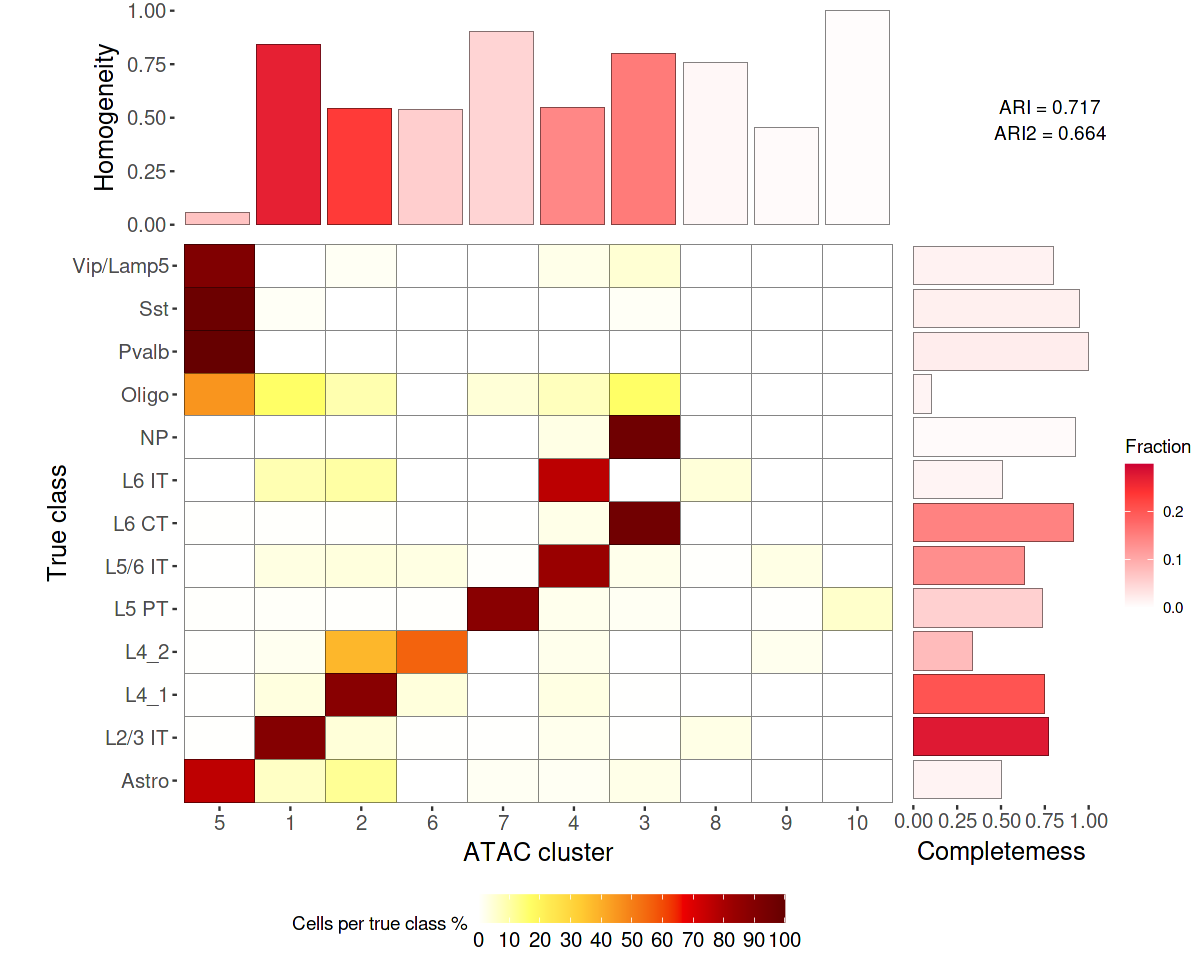

In [140]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2, c=2, m=0, n=0.3)
p1

In [141]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_agg_Chen2019_ndim15_crosstable.svg", width=10, height=8)
plot(p1)
dev.off() 

png 
  2

### PBMC

In [379]:
j <- 6
n <- 15

d <- dataset_ls[j]
k <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", d))
df_sub <- df %>% filter(dataset2 == d) %>% filter(ndim == n)
df_metrics_sub <- df_metrics %>% filter(dataset2 == d) %>% filter(ndim == n)

#### SnapATAC2

In [156]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "SnapATAC2_cosine") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method    long_method      feature_type
1   6         ARI    0.6424648 SnapATAC2 SnapATAC2_cosine default     
2   8         ARI    0.7187719 SnapATAC2 SnapATAC2_cosine default     
3  11         ARI    0.8514935 SnapATAC2 SnapATAC2_cosine default     
4  12         ARI    0.7716238 SnapATAC2 SnapATAC2_cosine default     
5  13         ARI    0.7056204 SnapATAC2 SnapATAC2_cosine default     
6  15         ARI    0.6127192 SnapATAC2 SnapATAC2_cosine default     
7  16         ARI    0.5625610 SnapATAC2 SnapATAC2_cosine default     
8  17         ARI    0.5166864 SnapATAC2 SnapATAC2_cosine default     
9  18         ARI    0.5137564 SnapATAC2 SnapATAC2_cosine default     
10 19         ARI    0.5125069 SnapATAC2 SnapATAC2_cosine default     
11 20         ARI    0.4801754 SnapATAC2 SnapATAC2_cosine default     
12 22         ARI    0.4440963 SnapATAC2 SnapATAC2_cosine default     
13 21         ARI    0.4420794 SnapATAC2 SnapATAC2_cosine default     
14 24         ARI    0.4133861 SnapATAC2 SnapATAC2_cosine default     
15 25         ARI    0.3867108 SnapATAC2 SnapATAC2_cosine default     
16 27         ARI    0.3704854 SnapATAC2 SnapATAC2_cosine default     
17 28         ARI    0.3362507 SnapATAC2 SnapATAC2_cosine default     
   tile_size distance ndim resolution
1  500       cosine   15   0.05      
2  500       cosine   15   0.10      
3  500       cosine   15   0.15      
4  500       cosine   15   0.25      
5  500       cosine   15   0.30      
6  500       cosine   15   0.35      
7  500       cosine   15   0.45      
8  500       cosine   15   0.55      
9  500       cosine   15   0.65      
10 500       cosine   15   0.70      
11 500       cosine   15   0.80      
12 500       cosine   15   1.10      
13 500       cosine   15   1.20      
14 500       cosine   15   1.30      
15 500       cosine   15   1.40      
16 500       cosine   15   1.50      
17 500       cosine   15   1.60      
   rds_file                                                                       
1  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.05_evaluation.RDS
2  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.1_evaluation.RDS 
3  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.15_evaluation.RDS
4  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.25_evaluation.RDS
5  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.3_evaluation.RDS 
6  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.35_evaluation.RDS
7  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.45_evaluation.RDS
8  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.55_evaluation.RDS
9  PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.65_evaluation.RDS
10 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.7_evaluation.RDS 
11 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r0.8_evaluation.RDS 
12 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r1.1_evaluation.RDS 
13 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r1.2_evaluation.RDS 
14 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r1.3_evaluation.RDS 
15 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r1.4_evaluation.RDS 
16 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r1.5_evaluation.RDS 
17 PBMC_multiomics/evaluation/SnapATAC2/default/500/cosine/15/r1.6_evaluation.RDS 
   clustering_file                                                     
1  PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.05.tsv
2  PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.1.tsv 
3  PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.15.tsv
4  PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.25.tsv
5  PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.3.tsv 
6  PBMC_multiomics/clustering/SnapATAC2/default/500/cosine/15/r0.35.tsv
7  PBMC_multiomics/clustering/SnapATAC2/def

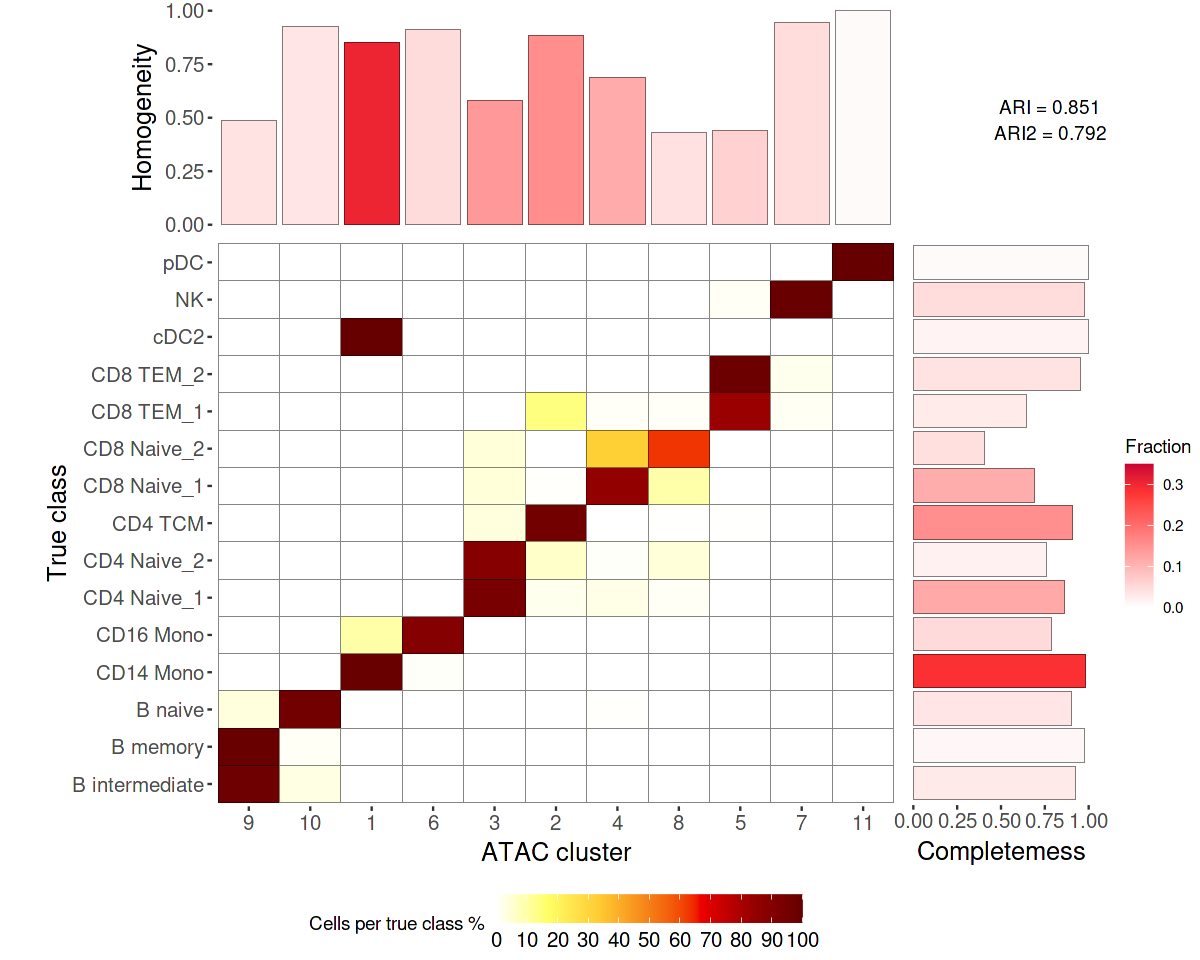

In [157]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2.8, c=2, m=0, n=0.35)
p1

#### Aggregation

In [158]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "aggregation") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method      long_method feature_type tile_size
1   7         ARI    0.6544769 aggregation aggregation default      500      
2   9         ARI    0.7243036 aggregation aggregation default      500      
3  10         ARI    0.6786102 aggregation aggregation default      500      
4  11         ARI    0.6873782 aggregation aggregation default      500      
5  13         ARI    0.7798700 aggregation aggregation default      500      
6  14         ARI    0.6357575 aggregation aggregation default      500      
7  15         ARI    0.5668242 aggregation aggregation default      500      
8  16         ARI    0.5115219 aggregation aggregation default      500      
9  17         ARI    0.5038365 aggregation aggregation default      500      
10 18         ARI    0.5363209 aggregation aggregation default      500      
11 19         ARI    0.4283508 aggregation aggregation default      500      
12 21         ARI    0.3906130 aggregation aggregation default      500      
13 22         ARI    0.3890287 aggregation aggregation default      500      
14 24         ARI    0.3798128 aggregation aggregation default      500      
   distance ndim resolution
1  default  15   0.05      
2  default  15   0.10      
3  default  15   0.15      
4  default  15   0.25      
5  default  15   0.35      
6  default  15   0.40      
7  default  15   0.60      
8  default  15   0.70      
9  default  15   0.80      
10 default  15   0.90      
11 default  15   1.20      
12 default  15   1.40      
13 default  15   1.50      
14 default  15   1.60      
   rds_file                                                                          
1  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.05_evaluation.RDS
2  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.1_evaluation.RDS 
3  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.15_evaluation.RDS
4  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.25_evaluation.RDS
5  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.35_evaluation.RDS
6  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.4_evaluation.RDS 
7  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.6_evaluation.RDS 
8  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.7_evaluation.RDS 
9  PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.8_evaluation.RDS 
10 PBMC_multiomics/evaluation/aggregation/default/500/default/15/r0.9_evaluation.RDS 
11 PBMC_multiomics/evaluation/aggregation/default/500/default/15/r1.2_evaluation.RDS 
12 PBMC_multiomics/evaluation/aggregation/default/500/default/15/r1.4_evaluation.RDS 
13 PBMC_multiomics/evaluation/aggregation/default/500/default/15/r1.5_evaluation.RDS 
14 PBMC_multiomics/evaluation/aggregation/default/500/default/15/r1.6_evaluation.RDS 
   clustering_file                                                        
1  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.05.tsv
2  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.1.tsv 
3  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.15.tsv
4  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.25.tsv
5  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.35.tsv
6  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.4.tsv 
7  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.6.tsv 
8  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.7.tsv 
9  PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.8.tsv 
10 PBMC_multiomics/clustering/aggregation/default/500/default/15/r0.9.tsv 
11 PBMC_multiomics/clustering/aggregation/default/500/default/15/r1.2.tsv 
12 PBMC_multiomics/clustering/aggregation/default/500/default/15/r1.4.tsv 
13 PBMC_multiomics/clustering/aggregation/default/500/default/15/r1.5.tsv 
14 PBMC_multiomics/clustering/aggregation/default/500/default/15/r1.6.tsv

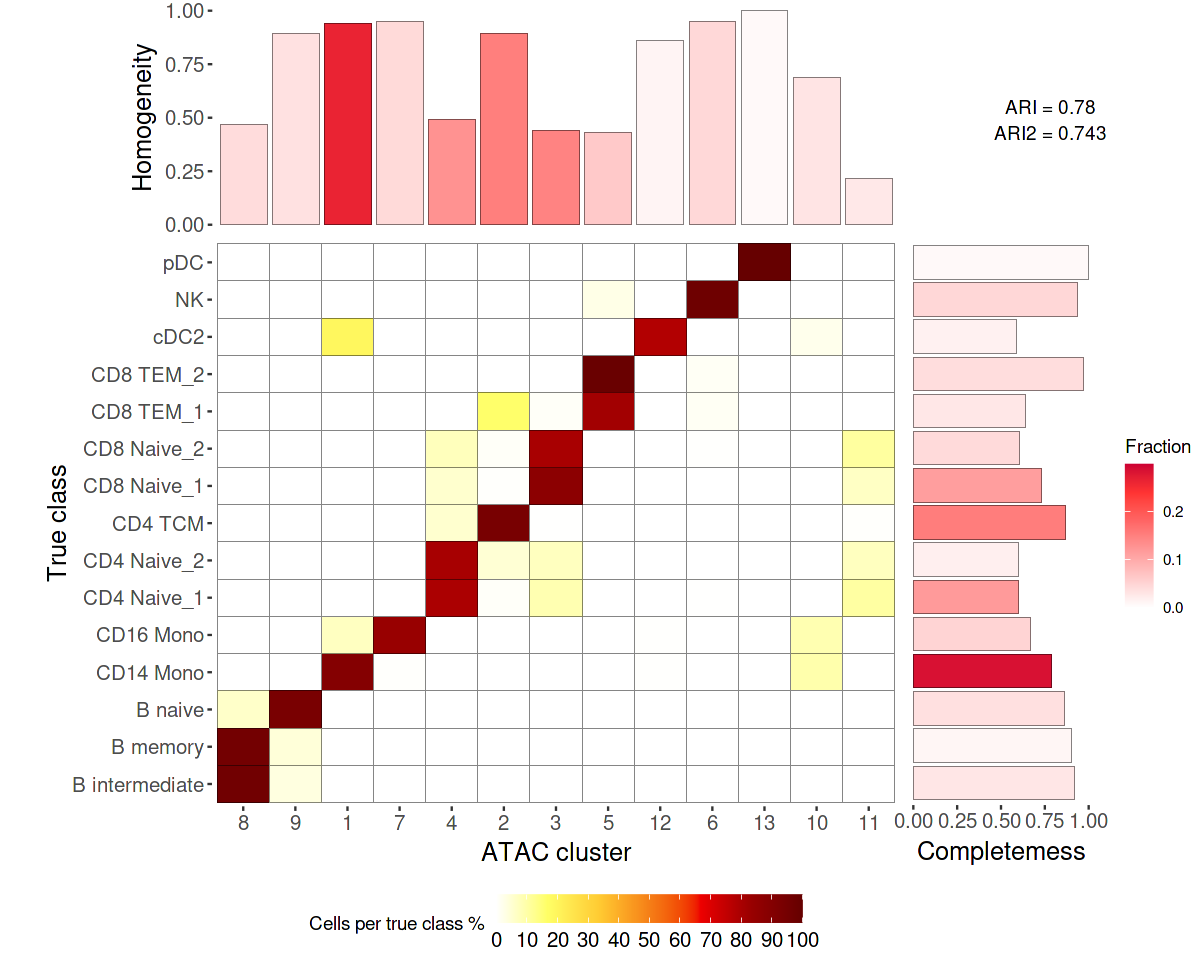

In [159]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 5
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p2 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2.8, c=2, m=0, n=0.3)
p2

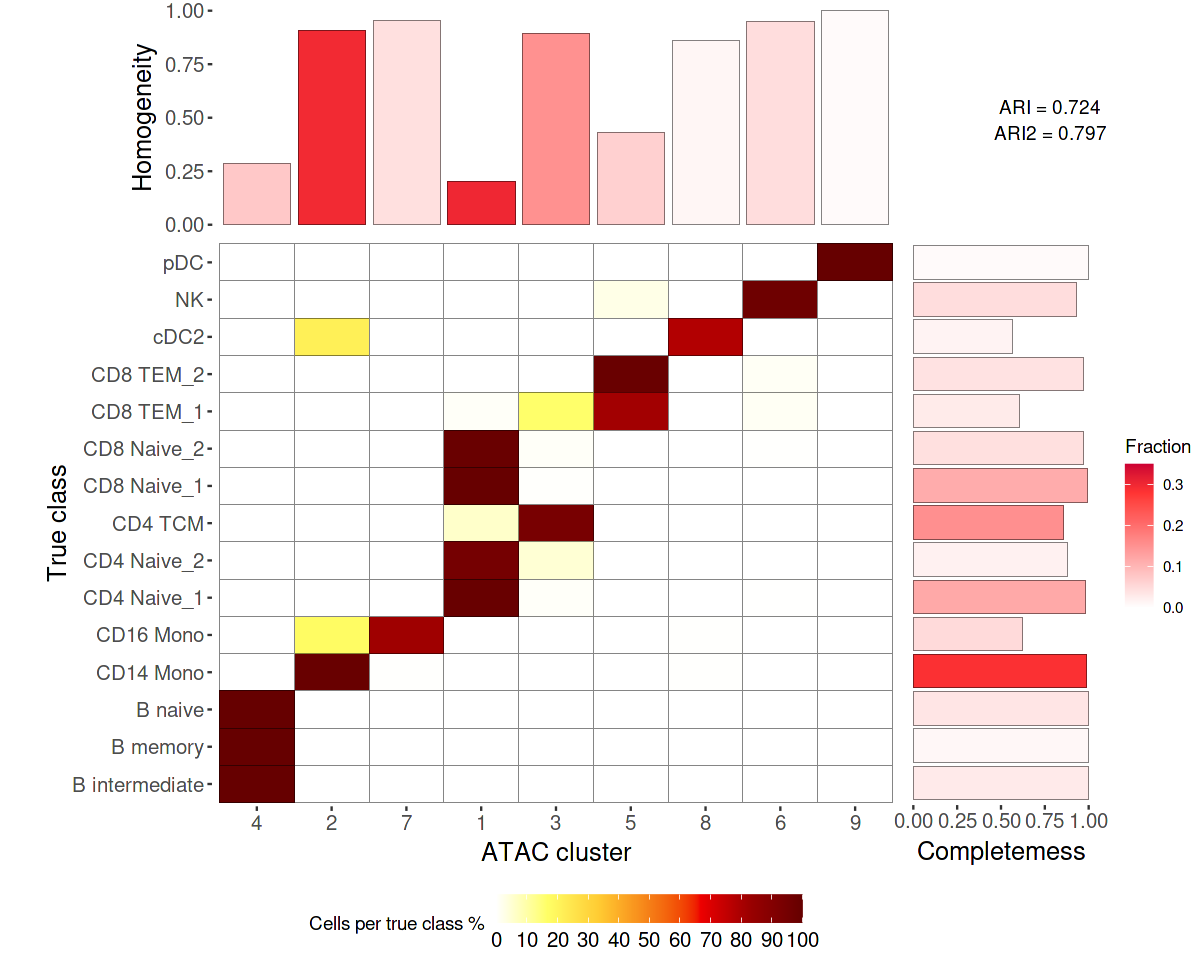

In [160]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 2
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p3 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2.8, c=2, m=0, n=0.35)
p3

In [161]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_SnapATAC2_PBMC_ndim15_crosstable_highest.svg", width=10, height=8)
plot(p1)
dev.off() 

svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_aggregation_PBMC_ndim15_crosstable_highestARI.svg", width=10, height=8)
plot(p2)
dev.off() 

svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_aggregation_PBMC_ndim15_crosstable_highestARI2.svg", width=10, height=8)
plot(p3)
dev.off() 

png 
  2

png 
  2

png 
  2

#### ArchR

In [162]:
df_method <- df_metrics_sub[df_metrics_sub$metric=="ARI",]  %>% filter(long_method == "ArchR_peaks") %>%
  group_by(n_clusters) %>%
  filter(value == max(value)) %>%
  ungroup()

df_method <- df_method[!duplicated(df_method[, c("n_clusters")]), ]

df_method

n_clusters metric value     method long_method feature_type tile_size
1   5         ARI    0.6259209 ArchR  ArchR_peaks peaks        500      
2   6         ARI    0.6340222 ArchR  ArchR_peaks peaks        500      
3  11         ARI    0.7665906 ArchR  ArchR_peaks peaks        500      
4  12         ARI    0.7222654 ArchR  ArchR_peaks peaks        500      
5  14         ARI    0.7110583 ArchR  ArchR_peaks peaks        500      
6  15         ARI    0.5796537 ArchR  ArchR_peaks peaks        500      
7  16         ARI    0.5360024 ArchR  ArchR_peaks peaks        500      
8  18         ARI    0.5599262 ArchR  ArchR_peaks peaks        500      
9  17         ARI    0.5284123 ArchR  ArchR_peaks peaks        500      
10 19         ARI    0.5223846 ArchR  ArchR_peaks peaks        500      
11 21         ARI    0.4827508 ArchR  ArchR_peaks peaks        500      
12 22         ARI    0.4651809 ArchR  ArchR_peaks peaks        500      
13 24         ARI    0.4436213 ArchR  ArchR_peaks peaks        500      
14 25         ARI    0.4081240 ArchR  ArchR_peaks peaks        500      
15 26         ARI    0.4014331 ArchR  ArchR_peaks peaks        500      
16 29         ARI    0.3559111 ArchR  ArchR_peaks peaks        500      
17 30         ARI    0.3115641 ArchR  ArchR_peaks peaks        500      
   distance ndim resolution
1  default  15   0.05      
2  default  15   0.10      
3  default  15   0.15      
4  default  15   0.20      
5  default  15   0.25      
6  default  15   0.40      
7  default  15   0.55      
8  default  15   0.60      
9  default  15   0.65      
10 default  15   0.75      
11 default  15   0.80      
12 default  15   0.85      
13 default  15   1.00      
14 default  15   1.20      
15 default  15   1.30      
16 default  15   1.50      
17 default  15   1.60      
   rds_file                                                                  
1  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.05_evaluation.RDS
2  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.1_evaluation.RDS 
3  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.15_evaluation.RDS
4  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.2_evaluation.RDS 
5  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.25_evaluation.RDS
6  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.4_evaluation.RDS 
7  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.55_evaluation.RDS
8  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.6_evaluation.RDS 
9  PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.65_evaluation.RDS
10 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.75_evaluation.RDS
11 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.8_evaluation.RDS 
12 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r0.85_evaluation.RDS
13 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r1_evaluation.RDS   
14 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r1.2_evaluation.RDS 
15 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r1.3_evaluation.RDS 
16 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r1.5_evaluation.RDS 
17 PBMC_multiomics/evaluation/ArchR/peaks/500/default/15/r1.6_evaluation.RDS 
   clustering_file                                                
1  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.05.tsv
2  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.1.tsv 
3  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.15.tsv
4  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.2.tsv 
5  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.25.tsv
6  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.4.tsv 
7  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.55.tsv
8  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.6.tsv 
9  PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.65.tsv
10 PBMC_multiomics/clustering/ArchR/peaks/500/default/15/r0.75.tsv
11 PBMC_multiomics/clustering/ArchR/peaks/50

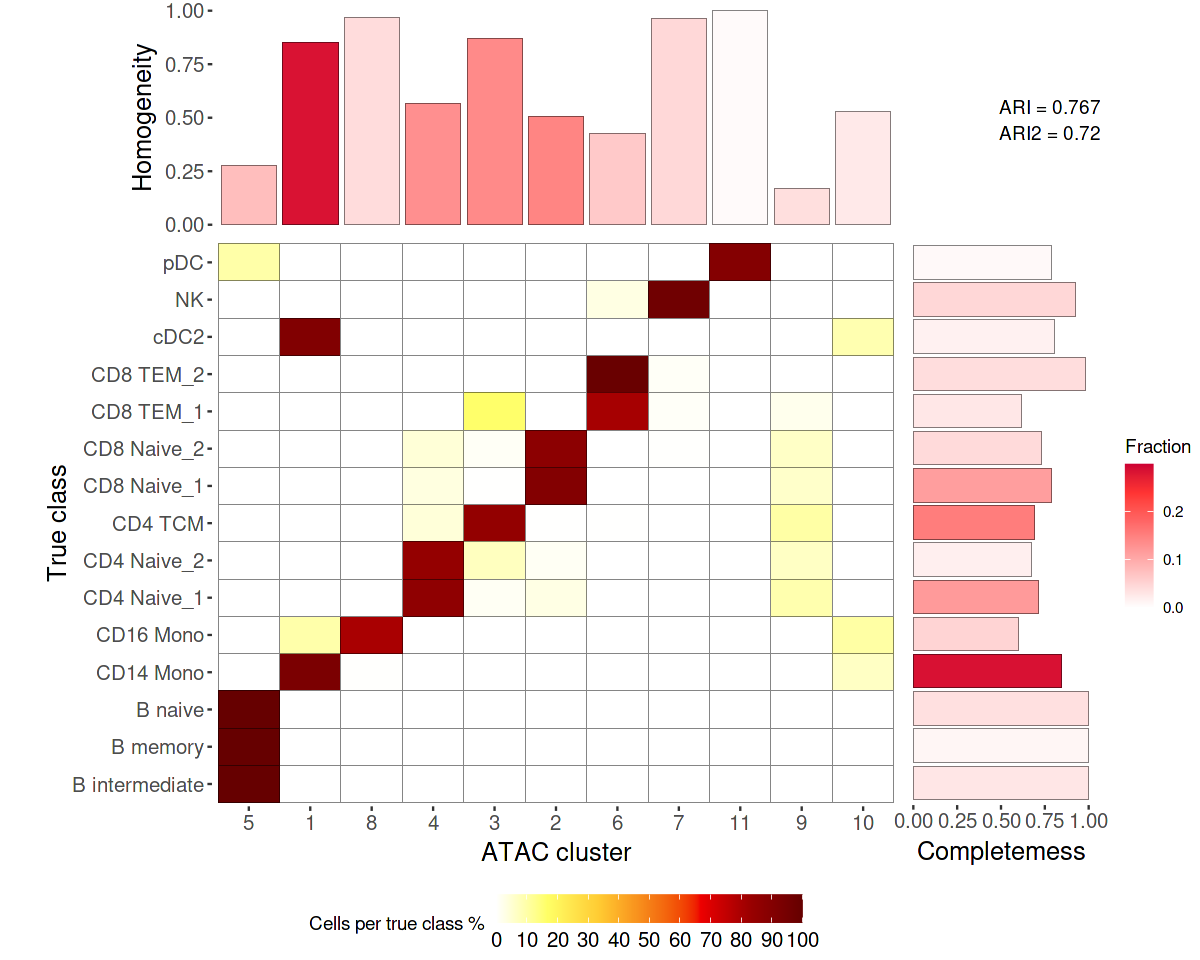

In [163]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

i <- 3
method <- df_method$method[i]
feature_type <- df_method$feature_type[i]
tile_size <- df_method$tile_size[i]
distance <- df_method$distance[i]
long_method <- df_method$long_method[i]

sobj_file <- df_method$snn_file[i]
clustering_file <- df_method$clustering_file[i]

sobj1 <- readRDS(sobj_file)
sobj2 <- add_labels(sobj1, clustering_file, "barcode", "clusterings")

ground_truth <- sobj1$ground_truth
clusterings <- sobj2$ground_truth

p1 <- cross_table_plot(ground_truth, clusterings, a=1.3, b=2.8, c=2, m=0, n=0.3)
p1

In [164]:
svg("/home/siluo/public/SiyuanLuo/projects/benchmark/scripts/analysis/visualization/Fig3_ArchR_PBMC_ndim15_crosstable.svg", width=10, height=8)
plot(p1)
dev.off() 

png 
  2